<a href="https://colab.research.google.com/github/nataliacampiglia/obligatorio-taller-ia/blob/main/Obligatorio_2025_Letra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Obligatorio - Taller Agentes Inteligentes 2025

En este trabajo obligatorio aplicaremos los conceptos vistos en el curso para diseñar, implementar y evaluar agentes capaces de aprender a jugar al clásico **Breakout** de Atari, utilizando el entorno provisto por Farama Gymnasium ([https://ale.farama.org/environments/breakout/](https://ale.farama.org/environments/breakout/)).

<p align="center">
  <img src="https://media.tenor.com/oMxHgRrISJsAAAAM/atari-deep-learning.gif" alt="Atari Deep Learning"/>
</p>


El ejercicio se enmarca en un contexto de aprendizaje práctico, donde trabajaremos con las interfaces estándar de Gymnasium para:

1. **Profundizar en algoritmos de valor**: implementaremos y compararemos dos variantes de Q-Learning basadas en redes neuronales profundas:
   * **Deep Q Learning (DQN)**
   * **Double Deep Q Learning (DDQN)**
2. **Evaluar rendimiento y estabilidad**: registraremos las recompensas obtenidas durante el entrenamiento de cada agente y analizaremos su comportamiento mediante gráficas comparativas.
3. **Demostrar resultados de forma visual**: capturaremos vídeos que muestren a cada agente “resolviendo” el entorno, entendido como la habilidad de romper al menos cinco bloques en una partida.

Debido a las limitaciones de tiempo y cómputo propias de un entorno de curso, no se espera entrenar modelos durante más de diez horas por agente. Por ello, será fundamental:

* Integrar puntos de **checkpoint** para guardar periódicamente los pesos de la red.
* Seguir en los puntos 2 y 3 la arquitectura y técnicas originales propuestas en los papers seminales de DQN y DDQN, dejando la experimentación adicional para el punto extra.
* Flexibilizar la notebook de guía: pueden reorganizarla o dividirla en múltiples archivos según su conveniencia.


## Objetivos y tareas

1. **Completar la implementación**
   * Rellenar el código faltante en la notebook y en los módulos auxiliares para que los agentes puedan interactuar con el entorno de Breakout.
2. **Entrenar agentes**
   * Ajustar y entrenar un **DQN** que alcance la condición de “resolver” (romper ≥ 10 bloques).
   * Ajustar y entrenar un **DDQN** con la misma meta de desempeño.
3. **Visualizar y analizar resultados**
   * Generar **gráficas comparativas** de las recompensas obtenidas por ambos agentes en el mismo entorno (una gráfica por ambiente). Además se sugiere gráficas que muestren el valor de la función de valor Q para cada agente.
   * Extraer **al menos dos conclusiones** por gráfica, comentando diferencias en convergencia, estabilidad y comportamiento exploratorio.
4. **Registro de demostraciones**
   * Grabar y entregar un **video demostrativo** de cada agente resolviendo el entorno.
5. **Experimentación**
   * Probar otras arquitecturas, técnicas de mejora o módulos de procesamiento de entradas más avanzados, documentando brevemente su impacto/

## Criterios de evaluación

| Criterio                                  | Descripción                                                  | Peso |
| ----------------------------------------- | ------------------------------------------------------------ | ---- |
| **Implementación y rendimiento**          | DQN y DDQN completados; cada agente rompe ≥ 10 bloques       | 40%  |
| **Estructura y narrativa de la notebook** | Secciones claras, explicación de decisiones, “historia”      | 20%  |
| **Análisis de resultados**                | Gráficas comparativas; ≥ 2 conclusiones por gráfico          | 20%  |
| **Presentación visual**                   | Vídeos demostrativos de cada agente                          | 10%  |
| **Experimentación**                       | Experimentación adicional documentada y analizada brevemente | 10%  |

## Bibliografía

* **Mnih, V.**, Kavukcuoglu, K., Silver, D., Rusu, A. A., Veness, J., Bellemare, M. G., … Hassabis, D. (2013). *Playing Atari with Deep Reinforcement Learning*. [arXiv:1312.5602](https://arxiv.org/abs/1312.5602)
* **van Hasselt, H.**, Guez, A., & Silver, D. (2015). *Deep Reinforcement Learning with Double Q-learning*. [arXiv:1509.06461](https://arxiv.org/abs/1509.06461)
* **Sutton, R. S.**, & Barto, A. G. (2018). *Reinforcement Learning: An Introduction* (2nd ed.), capítulo 16.5: “Human-level Video Game Play”. MIT Press.

# Import from github

!! Important: explicar el flujo para clonar repositorios

In [ ]:
# Definir la variable de entorno para evitar fragmentación de memoria CUDA
# %env PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True


env: PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True


In [ ]:
# !git clone https://github.com/nataliacampiglia/obligatorio-taller-ia.git
# %cd obligatorio-taller-ia
# !git pull
# !git checkout main

Cloning into 'obligatorio-taller-ia'...
remote: Enumerating objects: 858, done.
remote: Counting objects: 100% (239/239), done.
remote: Compressing objects: 100% (195/195), done.
remote: Total 858 (delta 55), reused 125 (delta 28), pack-reused 619 (from 2)
Receiving objects: 100% (858/858), 147.40 MiB | 37.26 MiB/s, done.
Resolving deltas: 100% (405/405), done.
/content/obligatorio-taller-ia
Already up to date.
Already on 'main'
Your branch is up to date with 'origin/main'.


## Setup

In [ ]:
# %cd obligatorio-taller-ia

/content/obligatorio-taller-ia


In [22]:
# !git pull


remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 22 (delta 9), reused 17 (delta 7), pack-reused 0 (from 0)
Unpacking objects: 100% (22/22), 7.88 MiB | 5.62 MiB/s, done.
From https://github.com/nataliacampiglia/obligatorio-taller-ia
   e7e83e1..2df4ce2  main          -> origin/main
   f84bea0..4fb0aa7  ddqn_run_copy -> origin/ddqn_run_copy
Updating e7e83e1..2df4ce2
Fast-forward
 Obligatorio_2025_Letra.ipynb                  | 301 ++++++++++++++++++++++----
 metrics/dqn/metrics_phase_3_2.npz             | Bin 0 -> 215904 bytes
 net_history/dqn/GenericDQNAgent-phase_3_2.dat | Bin 0 -> 2712216 bytes
 q_values/dqn/phase_3_2.npz                    | Bin 0 -> 1870 bytes
 4 files changed, 256 insertions(+), 45 deletions(-)
 create mode 100644 metrics/dqn/metrics_phase_3_2.npz
 create mode 100644 net_history/dqn/GenericDQNAgent-phase_3_2.dat
 create mode 100644 q_values/dqn/phase_3_2.npz


In [ ]:
# !ls

obligatorio-taller-ia  sample_data


Nat necesita esto para correr en colab

In [ ]:
# !pip install torchinfo

## **Imports**

In [3]:
%load_ext autoreload
%autoreload 2
import os
import torch
import numpy as np
import random
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
from torchinfo import summary
import gymnasium
import ale_py
from utils import make_env, evaluate_training_phase_results,graph_metrics, graph_metrics_accumulated, compare_metrics
from IPython.display import Video
from load_and_evaluate import create_env, process_state, create_reference_states, execute_dqn_training_phase, execute_agent_play, execute_ddqn_training_phase, getVideoPath
from dqn_cnn_model import DQN_CNN_Model
from constants import (DQN_TYPE, DOUBLE_DQN_TYPE, getMetricFilePath, getGenericDataFilePath, getMetricFilePathList)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Device: mps


ALE (Atari Learning Environment) es un entorno de aprendizaje para videojuegos de Atari. En este caso, utilizaremos el entorno de Breakout. Es necesario entender que se separa el entorno de los roms de Atari, que son los juegos en sí. El entorno de ALE permite interactuar con los juegos de Atari a través de una API estándar, facilitando la implementación de algoritmos de aprendizaje por refuerzo.

Debemos instalar los roms por separado, para ello primero tenemos que saber donde están los roms de Atari.

In [4]:
gymnasium.register_envs(ale_py) # registramos todos los entornos de ale_py
ruta_init = ale_py.roms.__file__ # debemos saber donde se encuentra la carpeta roms
ALE_ROMS_PATH = os.path.dirname(ruta_init)
print(ALE_ROMS_PATH)

/opt/anaconda3/envs/obl_taller_ia/lib/python3.12/site-packages/ale_py/roms


Podemos usar los siguientes comando para instalar los roms y colocalos en la carpeta correcta.

In [ ]:
# !pip install "autorom[accept-rom-license]"
# !AutoROM --accept-license --install-dir {ALE_ROMS_PATH}

AutoROM will download the Atari 2600 ROMs.
They will be installed to:
	/usr/local/lib/python3.11/dist-packages/ale_py/roms

Existing ROMs will be overwritten.


Fijamos la semilla para que los resultados sean reproducibles

In [5]:
SEED = 23

torch.manual_seed(SEED)
torch.backends.cudnn.deterministic=True # https://discuss.pytorch.org/t/what-is-the-differenc-between-cudnn-deterministic-and-cudnn-benchmark/38054
torch.backends.cudnn.benchmark=True # https://discuss.pytorch.org/t/what-does-torch-backends-cudnn-benchmark-do/5936/4
np.random.seed(SEED)
random.seed(SEED)

Vemos que dispositivo tenemos, si es GPU, MPS o CPU. **El uso de GPU es altamente recomendable** para acelerar el entrenamiento de los modelos.

In [6]:
# Algunas constantes

# definimos el dispositivo que vamos a usar
DEVICE = "cpu"  # por defecto, usamos la CPU
if torch.cuda.is_available():
    DEVICE = "cuda"  # si hay GPU, usamos la GPU
elif torch.backends.mps.is_available():
    DEVICE = "mps"  # si no hay GPU, pero hay MPS, usamos MPS

print(f"Device: {DEVICE}")

Device: mps


## Preprocesando Atari

Para reproducir fielmente el enfoque de Mnih et al. (2013) y reducir la carga computacional al trabajar con imágenes de Atari (210 × 160 píxeles, 128 colores), aplicamos el siguiente preprocesado φ a las últimas **4** frames del entorno:

1. **Conversión a escala de grises**
   Eliminamos la información de color (GRAYSCALE = True), pues la luminosidad es suficiente para capturar la dinámica de juego y reduce drásticamente la dimensionalidad de la entrada.

2. **Down-sampling y recorte**
   * Redimensionamos la imagen original a 110 × 84 píxeles, manteniendo la proporción horizontal.
   * Recortamos un área central de 84 × 84 píxeles que contiene la “zona de juego”, descartando bordes innecesarios.
     Este paso (SCREEN_SIZE = 84) no solo concentra la atención del modelo en la región relevante, sino que también garantiza un tamaño cuadrado compatible con las implementaciones de convoluciones en GPU.

3. **Saltos temporales (frame skipping)**
   Procesamos cada 4 frames (SKIP_FRAMES = 4), repitiendo la misma acción durante esos pasos. Esto reduce la redundancia temporal, acelera el entrenamiento y mantiene la coherencia del movimiento de la paleta y la bola.

4. **Apilamiento de frames**
   Finalmente, acumulamos las últimas 4 imágenes preprocesadas (NUM_STACKED_FRAMES = 4) en un único tensor de entrada. Así el agente puede inferir la velocidad y dirección de los elementos móviles a partir de la diferencia entre frames.

Este esquema de preprocesado es fundamental para disminuir el espacio de entrada, acelerar las convoluciones y proporcionar al Q-net una representación compacta y rica en información dinámica, tal como se describe en el algoritmo 1 del paper original .

> Se recomienda ver el método `make_env` en el archivo `utils.py` para entender cómo se implementa este preprocesado.

In [7]:
GRAY_SCALE = True # si True, convertimos la imagen a escala de grises
SCREEN_SIZE = 84 # redimensionamos a SCREEN_SIZExSCREEN_SIZE
NUM_STACKED_FRAMES = 4 # apilamos NUM_STACKED_FRAMES frames
SKIP_FRAMES = 4 # saltamos SKIP_FRAMES frames (haciendo la misma acción)
ENV_NAME = "ALE/Breakout-v5" # https://ale.farama.org/environments/breakout/

# Exploración del entorno

In [ ]:
env = create_env(video_folder='./videos/env_exploration')
print("Actions shape:",env.action_space)
print("Observation shape:",env.observation_space.shape)
env.reset()
next_state, reward, terminated, truncated, info = env.step(action=0)

print(f"{next_state.shape},\n {reward},\n {terminated},\n {info}")

Actions shape: Discrete(4)
Observation shape: (4, 84, 84)
(4, 84, 84),
 0,
 False,
 {'lives': 5, 'episode_frame_number': 5, 'frame_number': 5}


/usr/local/lib/python3.11/dist-packages/gymnasium/wrappers/rendering.py:296: UserWarning: WARN: Overwriting existing videos at /content/obligatorio-taller-ia/videos/env_exploration folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


### Acciones

En el entorno **Breakout** de la Arcade Learning Environment (ALE), el agente dispone de un conjunto discreto de **cuatro acciones** para controlar la paleta:
	1.	NOOP (0): no realizar ninguna acción, dejando la paleta en su posición actual.
	2.	FIRE (1): iniciar el juego o volver a lanzar la pelota después de perderla.
	3.	RIGHT (2): mover la paleta hacia la derecha.
	4.	LEFT (3): mover la paleta hacia la izquierda.

Estas acciones permiten al agente manejar la posición de la paleta con precisión para interceptar la pelota, mantenerla en juego el mayor tiempo posible y así destruir más bloques, lo que se traduce en recompensas más altas.

### Observaciones

El entorno entrega observaciones en forma de imágenes: fotogramas en escala de grises de 210x160 píxeles con un canal (1), que representan el estado actual del juego. Estas imágenes contienen toda la información necesaria para que el agente identifique la posición de la paleta, la pelota y los bloques restantes.

Sin embargo, dado que un solo fotograma no proporciona información sobre el movimiento de la pelota, es común en la práctica apilar varios fotogramas consecutivos y re-escalar las imágenes (por ejemplo, a 84x84 píxeles). Este preprocesamiento ayuda al agente a capturar la dinámica temporal del entorno y a desarrollar políticas que dependan de la velocidad y dirección de la pelota.

# Deep Q Learning

Deep Q Learning extiende el algoritmo clásico de Q-learning al emplear una **red neuronal profunda** como aproximador de la función de valor $Q(s,a)$. Inspirado en Mnih et al. (2013), este método utiliza una **red convolucional** para procesar directamente las imágenes del entorno Atari, un **replay buffer** para romper la correlación temporal de las muestras. La política sigue un esquema **ε-greedy**, balanceando exploración y explotación, y se entrena minimizando el error de la ecuación de Bellman sobre lotes de transiciones muestreadas de manera aleatoria.

<p align="center">
  <img src="https://www.researchgate.net/profile/Faris-Mismar/publication/327045314/figure/fig4/AS:819677282455553@1572437701142/Structure-of-the-neural-network-used-for-the-Deep-Q-learning-Network-implementation-with.png" alt="DQN"/>
</p>

Fuente: [arXiv:1312.5602](https://arxiv.org/abs/1312.5602)

## Memoria

El algoritmo de Deep Q Learning presentado en el paper utiliza una memoria (llamada Replay Memory) para almacenar transiciones pasadas. Tuplas que contienen un estado base, la accion tomada, la recompensa obtenida, una bandera que indica si el siguiente estado es final o no; y el estado siguiente.

Esta memoria es circular, es decir, tiene un límite maximo de elementos y una vez esté llena comienza a reemplazar los elementos más viejos.

Vamos a necesitar crear una función **sample** que obtiene una mustra aleatoria de elementos de la memoria.  Esto puede ser una lista de Transiciones o listas separadas (pero alineadas) de los elementos que las componen.


> Para implementar esta funcionalidad se debe modificar el archivo **replay_memory.py**

In [ ]:
from replay_memory import ReplayMemory, Transition

# Creamos la memoria de repetición
replay_memory = ReplayMemory(3, DEVICE)

# Añadimos transiciones a la memoria (solo las 3 últimas se guardan)
replay_memory.add(0, 'action1', 'reward1', 'done1', 'next_state1' )
replay_memory.add(1, 'action2', 'reward2', 'done2', 'next_state2')
replay_memory.add(2, 'action3', 'reward3', 'done3', 'next_state3')
replay_memory.add(3, 'action4', 'reward4', 'done4', 'next_state4')

# Mostramos el tamaño de la memoria
print(f"Memory size: {len(replay_memory)}\n")

# Mostramos un sample de la memoria
sampled = replay_memory.sample(2)
print(f"Memory sample:")
for i, sample in enumerate(sampled):
    print(f"Sample {i}: {sample}")


Memory size: 3

Memory sample:
Sample 0: Transition(state=1, action='action2', reward='reward2', done='done2', next_state='next_state2')
Sample 1: Transition(state=3, action='action4', reward='reward4', done='done4', next_state='next_state4')


## Modelo

Vamos a usar un mismo modelo FeedForward para estos dos problemas (entrenado en cada problema particular). Recomendamos simplicidad en la creación del mismo, pero tienen total libertad al momento de implementarlo.

> Para implementar esta funcionalidad se debe modificar el archivo **dqn_cnn_model.py**. Se recomienda empezar por una arquitectura simple como la que se muestra en el paper de Mnih et al. (2013) y luego experimentar con arquitecturas más complejas.

La red esta definida para que reciba un tensor de 4 dimensiones (batch_size, num_frames, height, width) y devuelve un tensor de 2 dimensiones (batch_size, num_actions). La función `forward` es la encargada de definir el flujo de datos a través de la red. En este caso, se utiliza una red convolucional seguida de capas totalmente conectadas

EXPLICAR QUE FUNCIONES NUEVAS DEFINIMOS Y CUAL ES SU USO (YA LO HZO NAT) 

## Phi

La función para procesar los estados (phi en el paper) que es necesaria para poder usar el modelo de Pytorch con las representaciones de gym. Esta función pasa una observación de gym a un tensor de Pytorch y la normaliza.

> Técnicamente la función phi tiene más responsabilidades, como la de apilar los frames y el downsampling. En nuestro caso se lo delegamos a los wrappers de gymnasium.

## Reference states

EXPLICAR QUE SON LOS REFERENCE STATE

In [10]:
reference_states = create_reference_states()

A.L.E: Arcade Learning Environment (version 0.10.2+unknown)
[Powered by Stella]
Game console created:
  ROM file:  /opt/anaconda3/envs/obl_taller_ia/lib/python3.12/site-packages/ale_py/roms/breakout.bin
  Cart Name: Breakout - Breakaway IV (1978) (Atari)
  Cart MD5:  f34f08e5eb96e500e851a80be3277a56
  Display Format:  AUTO-DETECT ==> NTSC
  ROM Size:        2048
  Bankswitch Type: AUTO-DETECT ==> 2K

Running ROM file...
Random seed is 1831985968
/opt/anaconda3/envs/obl_taller_ia/lib/python3.12/site-packages/gymnasium/wrappers/rendering.py:283: UserWarning: WARN: Overwriting existing videos at /Users/reichelort/Desktop/Taller_AI/Obligatorio final/obligatorio-taller-ia/videos/reference_states folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


## Agente

Vamos a definir una clase agente (abstracto), encargado de interactuar con el ambiente y entrenar los modelos. Los métdos definidos deben funcionar para ambos problemas simplemente cambiando el modelo a utilizar para cada ambiente.

Abajo dejamos un esqueleto del mismo y las funciones a completar. Recomendamos no alterar la estructura del mismo, pero pueden definir las funciones auxiliares que consideren necesarias.

> Para implementar esta funcionalidad se debe modificar los archivos **abstract_agent.py** y **dqn_agent.py**.

Funciones a completar:


1. **init**: que inicializa los parametros del agente.

2. **compute_epsilon**: que computa el valor actual de epsilon en base al número de pasos actuales y si esta entrenando o no.

3. **select_action**: Seleccionando acciones "epsilongreedy-mente" si estamos entranando y completamente greedy en otro caso.

4. **train**: que entrena el agente por un número dado de episodios de largo determinado.

5. **record_test_episode**: para grabar un episodio con el agente siempre seleccionando la mejor accion conocida.

# Fases

EXPLICAR EL POR QUE Y COMO ELEGIMOS DIVIDIR LAS FASES DE ENTRENAMIENTO

In [8]:
PHASE_INITIAL_ID = 'initial_run'
PHASE_2_ID = 'phase_2'
PHASE_3_ID = 'phase_3'
PHASE_4_1_ID = 'phase_4_1'
PHASE_4_2_ID = 'phase_4_2'
PHASE_4_3_ID = 'phase_4_3'
PHASE_3_2_ID = 'phase_3_2'

PHASE_INITIAL = {
    "id": PHASE_INITIAL_ID,
    "total_steps": 100_000,
    "episodes": 10_000,
    "epsilon_ini": 1,
    "epsilon_min": 0.3,
    "epsilon_anneal_steps": 80_000
}

# fase full exploration
PHASE_2 = {
    "id": PHASE_2_ID,
    "total_steps": 2_000_000,
    "episodes": 10_000,
    "epsilon_ini": 1,
    "epsilon_min": 0.1,
    "epsilon_anneal_steps": 1_500_000
}

# chequeamos como se comporta luego de explotar
PHASE_3 = {
    "id": PHASE_3_ID,
    "total_steps": 2_000_000,
    "episodes": 10_000,
    "epsilon_ini": 0.1,
    "epsilon_min": 0.01,
    "epsilon_anneal_steps": 1_000_000
}

# Volvemos a explorar
PHASE_3_2 = {
    "id": PHASE_3_2_ID,
    "total_steps": 2_000_000,
    "episodes": 10_000,
    "epsilon_ini": 0.5,
    "epsilon_min": 0.01,
    "epsilon_anneal_steps": 1_000_000
}

# explotacion
PHASE_4_1 = {
    "id":  PHASE_4_1_ID,
    "total_steps": 2_000_000,
    "episodes": 10_000,
    "epsilon_ini": 0.05,
    "epsilon_min": 0.01,
    "epsilon_anneal_steps": 1_000_000
}

PHASE_4_2 = {
    "id": PHASE_4_2_ID,
    "total_steps": 2_000_000,
    "episodes": 10_000,
    "epsilon_ini": 0.01,
    "epsilon_min": 0.01,
    "epsilon_anneal_steps": 2_000_000
}

PHASE_4_3 = {
    "id": PHASE_4_3_ID,
    "total_steps": 2_000_000,
    "episodes": 10_000,
    "epsilon_ini": 0.01,
    "epsilon_min": 0.01,
    "epsilon_anneal_steps": 2_000_000
}

In [9]:
def get_phase_attributes(phase):
    id, total_steps, episodes, epsilon_ini, epsilon_min, epsilon_anneal_steps = (
        phase[k] for k in [
            "id", "total_steps", "episodes", "epsilon_ini", "epsilon_min", "epsilon_anneal_steps"
        ]
    )
    return id, total_steps, episodes, epsilon_ini, epsilon_min, epsilon_anneal_steps

# Entrenamiento Progresivo de un Agente DQN en Breakout

En esta sección del obligatorio implementamos un agente basado en Deep Q-Network (DQN) para resolver el entorno **Breakout** de Atari.

El objetivo es demostrar progresivamente cómo el agente mejora su rendimiento a través de fases de entrenamiento, visualización de métricas y evaluación.

## Preparación del entorno y del agente

Comenzamos creando el entorno y nuestro agente DQN, basado en una red convolucional. Definimos los hiperparámetros iniciales que guiarán su comportamiento durante el entrenamiento.

Este paso es como presentar a nuestro protagonista antes de su viaje.

### Hiperparámetros fijos durante todo el entrenamiento

EXPLICAR LOS VALORES Y CUALES SON

## 1. Primeros pasos de aprendizaje

En esta etapa inicial, el agente comienza su proceso de entrenamiento enfrentándose al entorno por primera vez. Ejecutamos un bloque limitado a **100.000 pasos**, con el objetivo principal de que el agente **explore** en lugar de tratar de maximizar recompensas desde el principio.

Para fomentar esta exploración, configuramos el parámetro `epsilon` —que controla la probabilidad de tomar acciones aleatorias— con los siguientes valores:

- `EPSILON_INI = 1.0`: al inicio, el agente toma decisiones completamente al azar.
- `EPSILON_MIN = 0.3`: al final del bloque, aún mantiene un 30% de exploración para evitar caer en políticas subóptimas demasiado pronto.

Este enfoque permite que el agente **cometa errores**, **pruebe diferentes estrategias** y **recolecte una variedad de experiencias** útiles que luego serán aprovechadas durante el entrenamiento.

En esta fase **no esperamos que el agente sea bueno todavía**. De hecho, probablemente falle con frecuencia. Sin embargo, es aquí donde empieza a identificar patrones básicos del entorno —como la relación entre sus acciones y las recompensas—, sentando las bases para mejorar en etapas posteriores.

In [ ]:
PHASE_ID, TOTAL_STEPS, EPISODES, EPSILON_INI, EPSILON_MIN, EPSILON_ANNEAL_STEPS = get_phase_attributes(PHASE_INITIAL)
print(f"PHASE_ID: {PHASE_ID}, TOTAL_STEPS: {TOTAL_STEPS}, EPISODES: {EPISODES}, EPSILON_INI: {EPSILON_INI}, EPSILON_MIN: {EPSILON_MIN}, EPSILON_ANNEAL_STEPS: {EPSILON_ANNEAL_STEPS}")

PHASE_ID: initial_run, TOTAL_STEPS: 100000, EPISODES: 10000, EPSILON_INI: 1, EPSILON_MIN: 0.3, EPSILON_ANNEAL_STEPS: 80000


In [ ]:
dqn_agent = execute_dqn_training_phase(PHASE_ID, reference_states, total_steps = TOTAL_STEPS, episodes = EPISODES, epsilon_i = EPSILON_INI, epsilon_f = EPSILON_MIN, epsilon_anneal_steps = EPSILON_ANNEAL_STEPS)

Parametros del agente:
loadPath: None
buffer_size: 50000
batch_size: 32
learning_rate: 1e-05
gamma: 0.995
epsilon_i: 1
epsilon_f: 0.3
epsilon_anneal_steps: 80000
episode_block: 100
run_name: initial_run


A.L.E: Arcade Learning Environment (version 0.10.2+unknown)
[Powered by Stella]
Game console created:
  ROM file:  /opt/miniconda3/envs/obl_taller_ia/lib/python3.12/site-packages/ale_py/roms/breakout.bin
  Cart Name: Breakout - Breakaway IV (1978) (Atari)
  Cart MD5:  f34f08e5eb96e500e851a80be3277a56
  Display Format:  AUTO-DETECT ==> NTSC
  ROM Size:        2048
  Bankswitch Type: AUTO-DETECT ==> 2K

Running ROM file...
Random seed is 1790741455
/opt/miniconda3/envs/obl_taller_ia/lib/python3.12/site-packages/gymnasium/wrappers/rendering.py:283: UserWarning: WARN: Overwriting existing videos at /Users/nataliacampigliastemphelet/master/obligatorio-taller-ia/videos/dqn/initial_run folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(
Entrenando:   0%|          | 0/10000 [00:00<?, ?episode/s]



Iniciando entrenamiento initial_run, con los siguientes hiperparametros:

gamma: 0.995, epsilon_i: 1, epsilon_f: 0.3, epsilon_anneal_steps: 80000, max_steps: 1000




/opt/miniconda3/envs/obl_taller_ia/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/miniconda3/envs/obl_taller_ia/lib/python3.12/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
Entrenando:   0%|          | 5/10000 [00:28<15:51:48,  5.71s/episode, reward=1.75, epsilon=0.991, steps=1001]


Entrenamiento detenido: se alcanzaron 1001 pasos.



/Users/nataliacampigliastemphelet/master/obligatorio-taller-ia/load_and_evaluate.py:97: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  state_tensor = torch.tensor(state, dtype=torch.float32).unsqueeze(0).to(device)


### Visualizar métricas

Datos cargados de metrics/dqn/metrics_initial_run.npz: [[47 30 31 35]
 [36 34 28 33]
 [38 49 45 42]
 ...
 [ 9 45 46 26]
 [50 31 33 19]
 [24 46 26 22]]


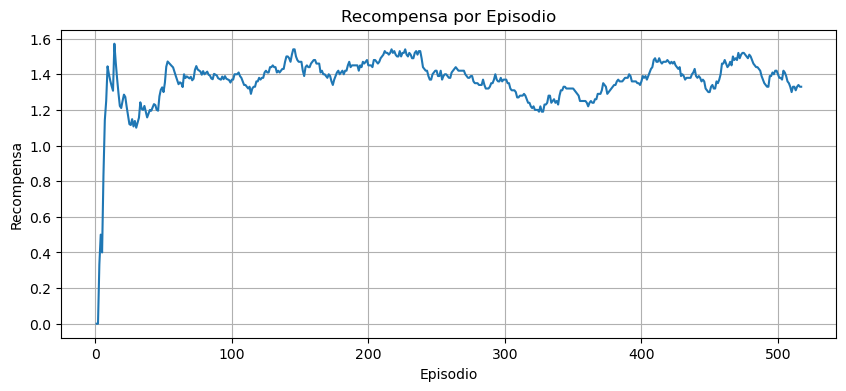

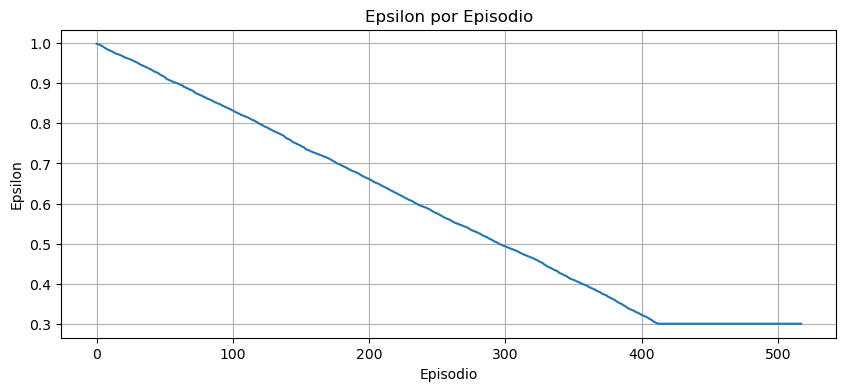

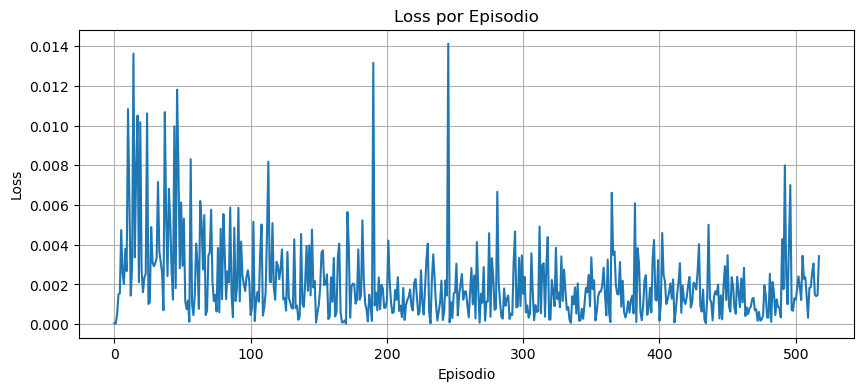

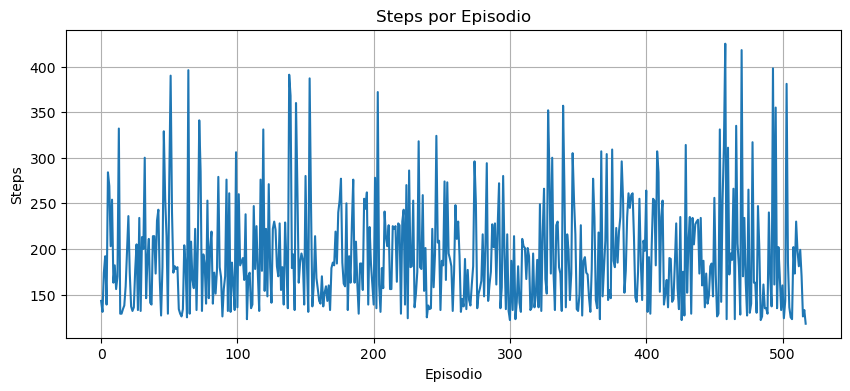

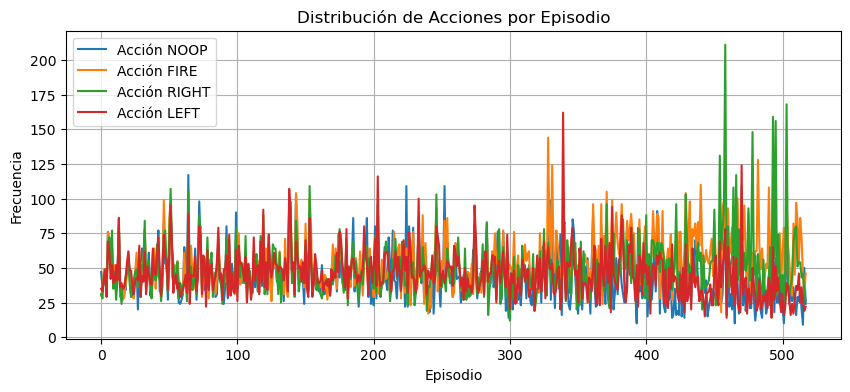

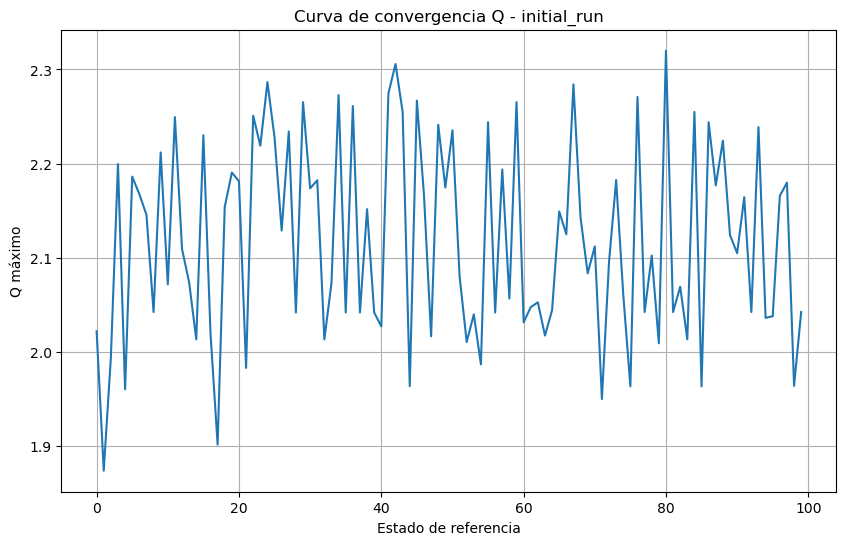

In [ ]:
METRICS_PATH = getMetricFilePath(True, PHASE_INITIAL_ID)
evaluate_training_phase_results(pathname=METRICS_PATH, phase_id=PHASE_INITIAL_ID)

BREVE CONCLUSION DE LAS GRAFICAS DE LA FASE INITIAL

EVALUAMOS COMPORTAMIENTO

Hipótesis: EL agente juega horrible

In [ ]:
video_path = execute_agent_play(dqn_agent, PHASE_INITIAL_ID)
Video(video_path, embed=True, width=600)

Ejecutando agente initial_run en fase initial_run con tipo dqn
Ruta al archivo de vídeo en tu sistema de ficheros: ./videos/dqn/validation/initial_run
<TransformReward<FrameStackObservation<AtariPreprocessing<RecordVideo<OrderEnforcing<PassiveEnvChecker<AtariEnv<ALE/Breakout-v5>>>>>>>>


A.L.E: Arcade Learning Environment (version 0.10.2+unknown)
[Powered by Stella]
Game console created:
  ROM file:  /opt/miniconda3/envs/obl_taller_ia/lib/python3.12/site-packages/ale_py/roms/breakout.bin
  Cart Name: Breakout - Breakaway IV (1978) (Atari)
  Cart MD5:  f34f08e5eb96e500e851a80be3277a56
  Display Format:  AUTO-DETECT ==> NTSC
  ROM Size:        2048
  Bankswitch Type: AUTO-DETECT ==> 2K

Running ROM file...
Random seed is -1216428046


Recompensa total del episodio 0: 0.0
Recompensa total promedio: 0.0


## Analizamos exploración con distintos gammas

Siguiendo los lineamientos teóricos de Sutton & Barto (2015), se sabe que el factor de descuento `gamma (γ)` es uno de los parámetros clave en los algoritmos de Aprendizaje por Refuerzo, ya que determina cuánto valora el agente las recompensas futuras respecto a las inmediatas. En muchos trabajos se utiliza un valor alto y constante (por ejemplo, γ = 0.99), especialmente cuando se desea que el agente aprenda políticas a largo plazo. Sin embargo, en las etapas iniciales del entrenamiento, cuando el agente todavía está explorando y no tiene una buena estimación de los valores de estado, usar un gamma tan alto puede llevar a inestabilidad o aprendizaje poco eficiente.

Algunos trabajos proponen iniciar con un gamma más bajo (por ejemplo, 0.90 o 0.95) y aumentarlo progresivamente. Esta estrategia busca que el agente se concentre primero en aprender comportamientos simples que le generen recompensas inmediatas y accesibles, sin verse afectado por la alta incertidumbre que implica valorar estados futuros que aún no ha explorado. A medida que el agente explora más y mejora su estimación de la función de valor, se puede incrementar gamma para que comience a planificar con un horizonte más largo.

François-Lavet et al. (2015) exploran esta idea en el contexto de DQN, y muestran que usar un gamma creciente durante el entrenamiento puede mejorar la estabilidad y la velocidad de convergencia del aprendizaje. De forma similar, Wang et al. (2022) presentan un enfoque adaptativo donde el valor de gamma se ajusta dinámicamente según el nivel de incertidumbre del entorno y la función de ventaja estimada.

En nuestro caso, se optó por explorar la posibilidad de usar un gamma más bajo al comienzo del entrenamiento, ya que el entorno contiene múltiples recompensas intermedias y un alto nivel de incertidumbre inicial. Esto permitiría al agente priorizar aprendizajes más simples al inicio, y luego incorporar objetivos a más largo plazo a medida que su política mejora.

Se realizaron tres entrenamientos de 800.000 pasos cada uno, enfocados en la fase de exploración, con el objetivo de comparar el efecto de distintos valores del parámetro gamma (γ) sobre el comportamiento del agente. El propósito fue identificar qué valor de gamma se adapta mejor al aprendizaje en etapas iniciales, donde la política aún no está consolidada. Los valores evaluados fueron:

1. γ = 0.995
2. γ = 0.97
3. γ = 0.95

In [ ]:
TOTAL_STEPS = 800_000
EPISODES = 10_000
EPSILON_INI = 1
EPSILON_MIN = 0.1
EPSILON_ANNEAL_STEPS = 500_000

In [ ]:
PHASE_ID_GAMMA = 'phase_gamma_0.995'
EXPLORATION_GAMMA = 0.995
execute_dqn_training_phase(PHASE_ID_GAMMA,
  reference_states,
  total_steps = TOTAL_STEPS,
  episodes = EPISODES,
  epsilon_i = EPSILON_INI,
  epsilon_f = EPSILON_MIN,
  epsilon_anneal_steps = EPSILON_ANNEAL_STEPS,
  gamma=EXPLORATION_GAMMA
)

Parametros del agente:
loadPath: None
buffer_size: 50000
batch_size: 32
learning_rate: 1e-05
gamma: 0.995
epsilon_i: 1
epsilon_f: 0.1
epsilon_anneal_steps: 500000
episode_block: 100
run_name: phase_gamma_0.995


Entrenando:   0%|          | 0/10000 [00:00<?, ?episode/s]



Iniciando entrenamiento phase_gamma_0.995, con los siguientes hiperparametros:

gamma: 0.995, epsilon_i: 1, epsilon_f: 0.1, epsilon_anneal_steps: 500000, max_steps: 800000




/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
Entrenando:   8%|▊         | 786/10000 [11:34<2:01:06,  1.27episode/s, reward=1.18, epsilon=0.73, steps=150007]


=== Recompensa actual: 1.18, Epsilon: 0.7299874, Total steps: 150007 ===


Entrenando:  16%|█▌        | 1560/10000 [23:27<2:31:54,  1.08s/episode, reward=1.9, epsilon=0.46, steps=3e+5]


=== Recompensa actual: 1.9, Epsilon: 0.4599712, Total steps: 300016 ===


Entrenando:  22%|██▏       | 2244/10000 [35:06<2:26:19,  1.13s/episode, reward=2.9, epsilon=0.19, steps=450208]


=== Recompensa actual: 2.9, Epsilon: 0.18962559999999995, Total steps: 450208 ===


Entrenando:  28%|██▊       | 2785/10000 [47:15<2:47:07,  1.39s/episode, reward=4.11, epsilon=0.1, steps=6e+5]


=== Recompensa actual: 4.11, Epsilon: 0.1, Total steps: 600068 ===


Entrenando:  33%|███▎      | 3293/10000 [59:25<2:50:49,  1.53s/episode, reward=4.5, epsilon=0.1, steps=750161]


=== Recompensa actual: 4.5, Epsilon: 0.1, Total steps: 750161 ===


Entrenando:  35%|███▍      | 3452/10000 [1:03:27<2:00:22,  1.10s/episode, reward=4.3, epsilon=0.1, steps=8e+5]
/content/obligatorio-taller-ia/load_and_evaluate.py:97: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  state_tensor = torch.tensor(state, dtype=torch.float32).unsqueeze(0).to(device)



Entrenamiento detenido: se alcanzaron 800001 pasos.


In [ ]:
PHASE_ID_GAMMA = 'phase_gamma_0.95'
EXPLORATION_GAMMA = 0.95
execute_dqn_training_phase(PHASE_ID_GAMMA, reference_states, total_steps = TOTAL_STEPS,epsilon_i=EPSILON_INI, epsilon_f=EPSILON_MIN, epsilon_anneal_steps=EPSILON_ANNEAL_STEPS, gamma=EXPLORATION_GAMMA)

Parametros del agente:
loadPath: None
buffer_size: 50000
batch_size: 32
learning_rate: 1e-05
gamma: 0.95
epsilon_i: 1
epsilon_f: 0.1
epsilon_anneal_steps: 500000
episode_block: 100
run_name: phase_gamma_0.95


Entrenando:   0%|          | 0/10000 [00:00<?, ?episode/s]



Iniciando entrenamiento phase_gamma_0.95, con los siguientes hiperparametros:

gamma: 0.95, epsilon_i: 1, epsilon_f: 0.1, epsilon_anneal_steps: 500000, max_steps: 800000




Entrenando:   8%|▊         | 765/10000 [11:20<2:30:03,  1.03episode/s, reward=1.44, epsilon=0.73, steps=150147]


=== Recompensa actual: 1.44, Epsilon: 0.7297354, Total steps: 150147 ===


Entrenando:  15%|█▍        | 1495/10000 [22:58<2:47:01,  1.18s/episode, reward=2.45, epsilon=0.459, steps=3e+5]


=== Recompensa actual: 2.45, Epsilon: 0.45949779999999996, Total steps: 300279 ===


Entrenando:  21%|██        | 2084/10000 [34:56<3:40:46,  1.67s/episode, reward=4.11, epsilon=0.189, steps=450314]


=== Recompensa actual: 4.11, Epsilon: 0.18943480000000001, Total steps: 450314 ===


Entrenando:  25%|██▌       | 2517/10000 [46:45<3:38:45,  1.75s/episode, reward=5.91, epsilon=0.1, steps=6e+5]


=== Recompensa actual: 5.91, Epsilon: 0.1, Total steps: 600126 ===


Entrenando:  29%|██▉       | 2919/10000 [58:28<4:05:23,  2.08s/episode, reward=7.2, epsilon=0.1, steps=750386]


=== Recompensa actual: 7.2, Epsilon: 0.1, Total steps: 750386 ===


Entrenando:  30%|███       | 3043/10000 [1:02:21<2:22:33,  1.23s/episode, reward=7.19, epsilon=0.1, steps=8e+5]


Entrenamiento detenido: se alcanzaron 800001 pasos.


In [ ]:
PHASE_ID_GAMMA = 'phase_gamma_0.97'
EXPLORATION_GAMMA = 0.97
agent = execute_dqn_training_phase(PHASE_ID_GAMMA,
  reference_states,
  total_steps = TOTAL_STEPS,
  episodes = EPISODES,
  epsilon_i = EPSILON_INI,
  epsilon_f = EPSILON_MIN,
  epsilon_anneal_steps = EPSILON_ANNEAL_STEPS,
  gamma=EXPLORATION_GAMMA
)

/usr/local/lib/python3.11/dist-packages/gymnasium/wrappers/rendering.py:283: UserWarning: WARN: Overwriting existing videos at /content/obligatorio-taller-ia/videos/dqn/phase_gamma_0.97 folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Parametros del agente:
loadPath: None
buffer_size: 50000
batch_size: 32
learning_rate: 1e-05
gamma: 0.97
epsilon_i: 1
epsilon_f: 0.1
epsilon_anneal_steps: 500000
episode_block: 100
run_name: phase_gamma_0.97


Entrenando:   0%|          | 0/10000 [00:00<?, ?episode/s]



Iniciando entrenamiento phase_gamma_0.97, con los siguientes hiperparametros:

gamma: 0.97, epsilon_i: 1, epsilon_f: 0.1, epsilon_anneal_steps: 500000, max_steps: 800000




/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
Entrenando:   8%|▊         | 792/10000 [12:21<2:22:09,  1.08episode/s, reward=1.26, epsilon=0.73, steps=150007]


=== Recompensa actual: 1.26, Epsilon: 0.7299874, Total steps: 150007 ===


Entrenando:  16%|█▌        | 1578/10000 [25:08<2:29:37,  1.07s/episode, reward=1.54, epsilon=0.46, steps=3e+5]


=== Recompensa actual: 1.54, Epsilon: 0.4598812, Total steps: 300066 ===


Entrenando:  22%|██▏       | 2203/10000 [38:02<3:34:42,  1.65s/episode, reward=3.89, epsilon=0.19, steps=450151]


=== Recompensa actual: 3.89, Epsilon: 0.1897281999999999, Total steps: 450151 ===


Entrenando:  26%|██▋       | 2629/10000 [51:25<4:40:42,  2.29s/episode, reward=7, epsilon=0.1, steps=6e+5]


=== Recompensa actual: 7.0, Epsilon: 0.1, Total steps: 600202 ===


Entrenando:  30%|██▉       | 2993/10000 [1:04:36<5:01:50,  2.58s/episode, reward=7.59, epsilon=0.1, steps=750425]


=== Recompensa actual: 7.59, Epsilon: 0.1, Total steps: 750425 ===


Entrenando:  31%|███       | 3106/10000 [1:09:03<2:33:17,  1.33s/episode, reward=8.36, epsilon=0.1, steps=8e+5]


Entrenamiento detenido: se alcanzaron 800001 pasos.



/content/obligatorio-taller-ia/load_and_evaluate.py:97: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  state_tensor = torch.tensor(state, dtype=torch.float32).unsqueeze(0).to(device)


## Gamma Conclusión
A partir de los experimentos realizados con diferentes valores de gamma durante la fase de exploración, se obtuvieron los siguientes resultados en términos de recompensa promedio:

* γ = 0.995 → recompensa promedio: 4.98
* γ = 0.95 → recompensa promedio: 6.00
* γ = 0.97 → recompensa promedio: 7.56

Estos resultados sugieren que un valor intermedio de `γ = 0.97` proporciona un mejor equilibrio entre priorizar recompensas inmediatas y mantener cierta sensibilidad al largo plazo. Por lo tanto, se concluye que, dentro del contexto de la fase de exploración, γ = 0.97 resulta ser la opción más adecuada para optimizar el aprendizaje inicial del agente.

## 2. Fase 2 de entrenamiento: Exploración

En esta etapa el agente ya tuvo un primer contacto con el entorno y comenzó a identificar algunas asociaciones básicas entre acciones y recompensas. A partir de esto, se extiende el entrenamiento a 2.000.000 de pasos, con el objetivo de reforzar la exploración y permitir que el agente acumule más experiencia antes de consolidar una política.

Dado que en la fase anterior las recompensas fueron bajas, se mantiene una exploración fuerte mediante el esquema de epsilon-decay:
- `ε_ini = 1.0:` exploración completamente aleatoria al inicio.
- `ε_min = 0.1:` se conserva cierto grado de exploración al final.
- `ε_anneal_steps = 1.500.000:` el descenso de epsilon es gradual durante casi toda la fase.

Este enfoque busca evitar que el agente se estanque prematuramente en políticas sub-óptimas. Como señalan Sutton y Barto (2018), una exploración sostenida es clave cuando el entorno es complejo o tiene recompensas poco frecuentes.

Para esta fase, se aplica también lo concluido en el análisis de gamma, utilizando un exploration gamma de 0.97, valor que en pruebas previas mostró un mejor equilibrio entre aprendizaje inmediato y planificación a mediano plazo.

Durante esta fase se espera una mejora progresiva en el rendimiento, evidenciada por mayores recompensas, episodios más largos y una menor pérdida en la estimación de valores Q.

In [ ]:
# gamma 0.97
EXPLORATION_GAMMA = 0.97
print(f"net a cargar con PHASE_ID: {PHASE_INITIAL_ID}")
LOAD_NET_PATH = getGenericDataFilePath(True, PHASE_INITIAL_ID)

PHASE_ID, TOTAL_STEPS, EPISODES, EPSILON_INI, EPSILON_MIN, EPSILON_ANNEAL_STEPS = get_phase_attributes(PHASE_2)
print(f"PHASE_ID: {PHASE_ID}, TOTAL_STEPS: {TOTAL_STEPS}, EPISODES: {EPISODES}, EPSILON_INI: {EPSILON_INI}, EPSILON_MIN: {EPSILON_MIN}, EPSILON_ANNEAL_STEPS: {EPSILON_ANNEAL_STEPS}, LOAD_NET_PATH: {LOAD_NET_PATH}")

net a cargar con PHASE_ID: initial_run
PHASE_ID: phase_2, TOTAL_STEPS: 2000000, EPISODES: 10000, EPSILON_INI: 1, EPSILON_MIN: 0.1, EPSILON_ANNEAL_STEPS: 1500000, LOAD_NET_PATH: net_history/dqn/GenericDQNAgent-initial_run.dat


In [ ]:
dqn_agent = execute_dqn_training_phase(
  PHASE_ID,
  reference_states,
  loadPath=LOAD_NET_PATH,
  total_steps = TOTAL_STEPS,
  episodes = EPISODES,
  epsilon_i = EPSILON_INI,
  epsilon_f = EPSILON_MIN,
  epsilon_anneal_steps = EPSILON_ANNEAL_STEPS,
  gamma=EXPLORATION_GAMMA
)

Parametros del agente:
loadPath: net_history/dqn/GenericDQNAgent-initial_run.dat
buffer_size: 50000
batch_size: 32
learning_rate: 1e-05
gamma: 0.97
epsilon_i: 1
epsilon_f: 0.1
epsilon_anneal_steps: 1500000
episode_block: 100
run_name: phase_2


Entrenando:   0%|          | 0/10000 [00:00<?, ?episode/s]



Iniciando entrenamiento phase_2, con los siguientes hiperparametros:

gamma: 0.97, epsilon_i: 1, epsilon_f: 0.1, epsilon_anneal_steps: 1500000, max_steps: 2000000




/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
Entrenando:   8%|▊         | 786/10000 [11:34<2:46:40,  1.09s/episode, reward=1.32, epsilon=0.91, steps=150115]


=== Recompensa actual: 1.32, Epsilon: 0.909931, Total steps: 150115 ===


Entrenando:  16%|█▌        | 1572/10000 [23:17<2:10:17,  1.08episode/s, reward=1.56, epsilon=0.82, steps=3e+5]


=== Recompensa actual: 1.56, Epsilon: 0.8199796, Total steps: 300034 ===


Entrenando:  23%|██▎       | 2258/10000 [35:05<2:20:37,  1.09s/episode, reward=2.68, epsilon=0.73, steps=450046]


=== Recompensa actual: 2.68, Epsilon: 0.7299724, Total steps: 450046 ===


Entrenando:  29%|██▊       | 2853/10000 [46:46<2:13:18,  1.12s/episode, reward=3.37, epsilon=0.64, steps=6e+5]


=== Recompensa actual: 3.37, Epsilon: 0.6398524, Total steps: 600246 ===


Entrenando:  34%|███▎      | 3374/10000 [58:32<2:35:14,  1.41s/episode, reward=4.34, epsilon=0.55, steps=750146]


=== Recompensa actual: 4.34, Epsilon: 0.5499124, Total steps: 750146 ===


Entrenando:  38%|███▊      | 3834/10000 [1:10:24<2:19:19,  1.36s/episode, reward=5.61, epsilon=0.46, steps=9e+5]


=== Recompensa actual: 5.61, Epsilon: 0.45994899999999994, Total steps: 900085 ===


Entrenando:  42%|████▏     | 4223/10000 [1:22:08<3:14:07,  2.02s/episode, reward=7.15, epsilon=0.37, steps=1050367]


=== Recompensa actual: 7.15, Epsilon: 0.3697798, Total steps: 1050367 ===


Entrenando:  46%|████▌     | 4579/10000 [1:33:43<3:19:18,  2.21s/episode, reward=8.19, epsilon=0.28, steps=1.2e+6]


=== Recompensa actual: 8.19, Epsilon: 0.27978879999999995, Total steps: 1200352 ===


Entrenando:  49%|████▉     | 4894/10000 [1:45:27<4:01:03,  2.83s/episode, reward=9.81, epsilon=0.19, steps=1350252]


=== Recompensa actual: 9.81, Epsilon: 0.18984880000000004, Total steps: 1350252 ===


Entrenando:  52%|█████▏    | 5187/10000 [1:57:21<3:12:47,  2.40s/episode, reward=10.6, epsilon=0.1, steps=1.5e+6]


=== Recompensa actual: 10.56, Epsilon: 0.1, Total steps: 1500215 ===


Entrenando:  55%|█████▍    | 5455/10000 [2:09:38<3:14:07,  2.56s/episode, reward=10.8, epsilon=0.1, steps=1650252]


=== Recompensa actual: 10.78, Epsilon: 0.1, Total steps: 1650252 ===


Entrenando:  57%|█████▋    | 5719/10000 [2:22:02<3:32:54,  2.98s/episode, reward=11.9, epsilon=0.1, steps=1.8e+6]


=== Recompensa actual: 11.94, Epsilon: 0.1, Total steps: 1800424 ===


Entrenando:  60%|█████▉    | 5977/10000 [2:34:19<2:56:14,  2.63s/episode, reward=12.4, epsilon=0.1, steps=1950419]


=== Recompensa actual: 12.41, Epsilon: 0.1, Total steps: 1950419 ===


Entrenando:  61%|██████    | 6062/10000 [2:38:21<1:42:52,  1.57s/episode, reward=12.5, epsilon=0.1, steps=2e+6]


Entrenamiento detenido: se alcanzaron 2000001 pasos.



/content/obligatorio-taller-ia/load_and_evaluate.py:97: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  state_tensor = torch.tensor(state, dtype=torch.float32).unsqueeze(0).to(device)


### Visualizar métricas

Datos cargados de metrics/dqn/metrics_phase_2.npz: [[ 97  98  81  88]
 [ 41  41  37  46]
 [ 52  51  62  51]
 ...
 [ 96 161 187 165]
 [ 28  75  39  71]
 [ 23  48  43  60]]


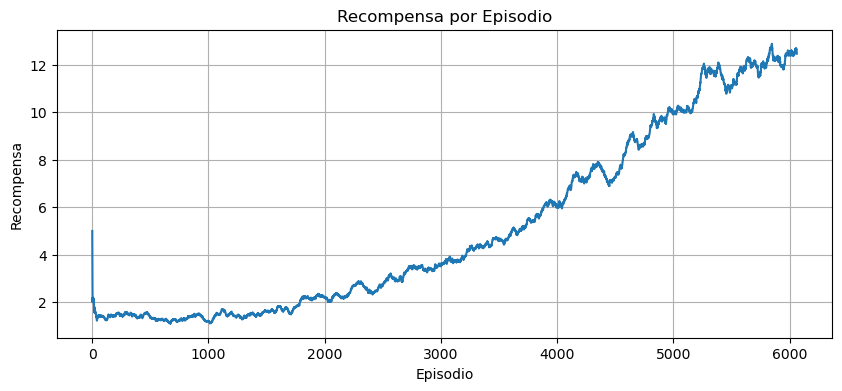

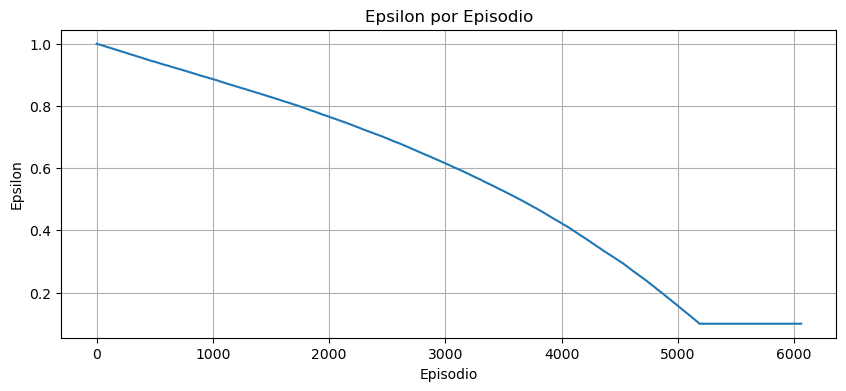

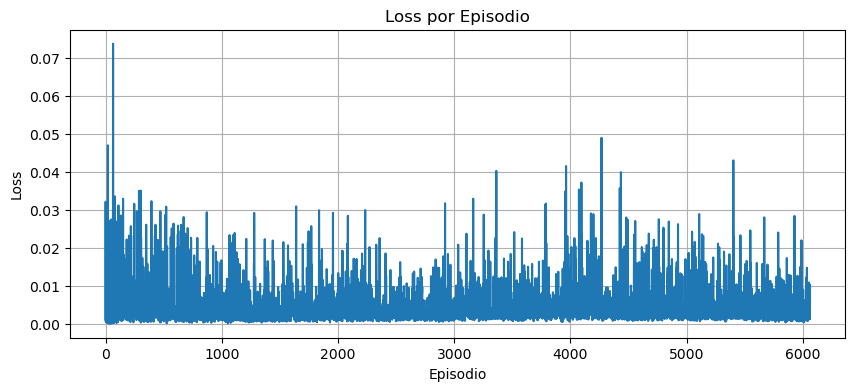

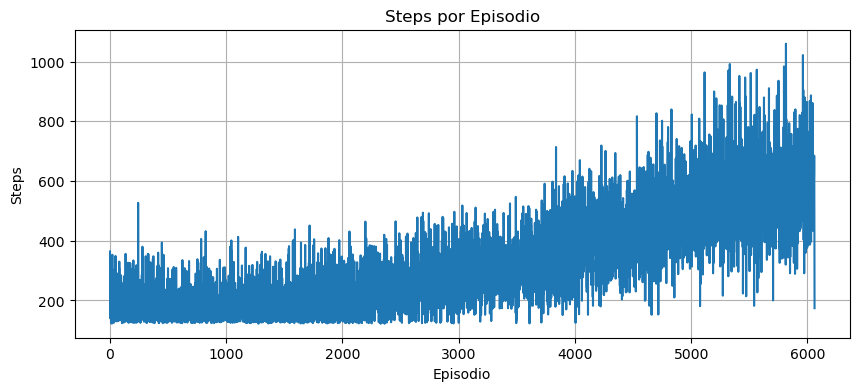

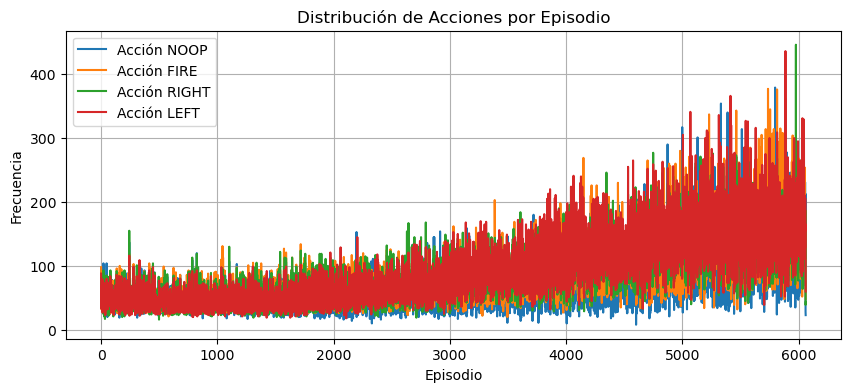

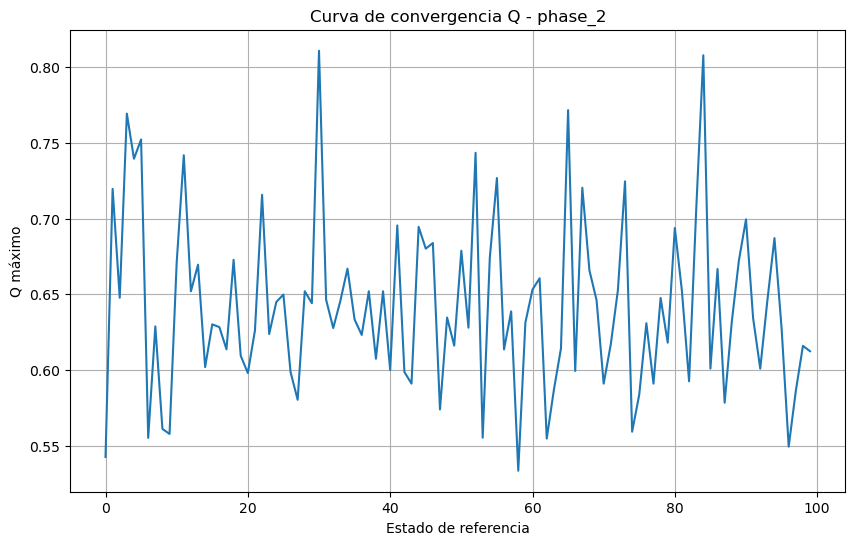

In [ ]:
METRICS_PATH = getMetricFilePath(True, PHASE_2_ID)
evaluate_training_phase_results(pathname=METRICS_PATH, phase_id=PHASE_2_ID)

CONCLUSION DE FASE 2 y SUBTITULO DEL AGENTE JUGANDO

In [ ]:
video_path = execute_agent_play(dqn_agent, PHASE_ID)
Video(video_path, embed=True, width=600)

Recompensa total del episodio 0: 12.0
Recompensa total promedio: 12.0


## 3. Fase 3 de entrenamiento: Ajuste de la política - exploración vs explotación

Luego de una etapa de exploración intensiva, en esta tercera fase el objetivo es observar cómo se comporta el agente al **reducir significativamente la exploración** y comenzar a `explotar` con mayor frecuencia el conocimiento adquirido. Se mantienen **2.000.000 de pasos**, pero con un nuevo esquema de epsilon enfocado en la explotación:
- `ε_ini = 0.1:` el agente comienza con un nivel de exploración reducido.
- `ε_min = 0.01:` se permite una exploración mínima al final, para evitar sobre-ajuste.
- `ε_anneal_steps = 1.000.000:` el descenso es más corto que en fases anteriores, promoviendo una transición más rápida hacia políticas más deterministas.

Esta fase busca consolidar lo aprendido y medir el desempeño del agente en condiciones más cercanas a las que enfrentaría en producción o durante evaluación, donde se espera que priorice acciones con alto valor esperado.

In [ ]:
LOAD_NET_PATH = getGenericDataFilePath(True, PHASE_2_ID)
print(f"net a cargar con PHASE_ID: {PHASE_2_ID}")
PHASE_ID, TOTAL_STEPS, EPISODES, EPSILON_INI, EPSILON_MIN, EPSILON_ANNEAL_STEPS = get_phase_attributes(PHASE_3)
print(f"PHASE_ID: {PHASE_ID}, TOTAL_STEPS: {TOTAL_STEPS}, EPISODES: {EPISODES}, EPSILON_INI: {EPSILON_INI}, EPSILON_MIN: {EPSILON_MIN}, EPSILON_ANNEAL_STEPS: {EPSILON_ANNEAL_STEPS}, LOAD_NET_PATH: {LOAD_NET_PATH}")

net a cargar con PHASE_ID: phase_2
PHASE_ID: phase_3, TOTAL_STEPS: 2000000, EPISODES: 10000, EPSILON_INI: 0.1, EPSILON_MIN: 0.01, EPSILON_ANNEAL_STEPS: 1000000, LOAD_NET_PATH: net_history/dqn/GenericDQNAgent-phase_2.dat


In [ ]:
# Creamos, cargamos pesos anteriores y entrenemos el agente
dqn_agent = execute_dqn_training_phase(PHASE_ID, reference_states, loadPath=LOAD_NET_PATH, total_steps = TOTAL_STEPS, episodes = EPISODES, epsilon_i = EPSILON_INI, epsilon_f = EPSILON_MIN, epsilon_anneal_steps = EPSILON_ANNEAL_STEPS)

Parametros del agente:
loadPath: net_history/dqn/GenericDQNAgent-phase_2.dat
buffer_size: 50000
batch_size: 32
learning_rate: 1e-05
gamma: 0.995
epsilon_i: 0.1
epsilon_f: 0.01
epsilon_anneal_steps: 1000000
episode_block: 100
run_name: phase_3
Use prioritized memory: False


Entrenando:   0%|          | 0/10000 [00:00<?, ?episode/s]



Iniciando entrenamiento phase_3, con los siguientes hiperparametros:

gamma: 0.995, epsilon_i: 0.1, epsilon_f: 0.01, epsilon_anneal_steps: 1000000, max_steps: 2000000




/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
Entrenando:   3%|▎         | 334/10000 [12:07<6:28:29,  2.41s/episode, reward=10.6, epsilon=0.0865, steps=150496]


=== Recompensa actual: 10.61, Epsilon: 0.08645536000000001, Total steps: 150496 ===


Entrenando:   6%|▌         | 606/10000 [24:13<7:16:34,  2.79s/episode, reward=12.3, epsilon=0.073, steps=3e+5]


=== Recompensa actual: 12.28, Epsilon: 0.07297435, Total steps: 300285 ===


Entrenando:   9%|▊         | 851/10000 [36:11<9:03:28,  3.56s/episode, reward=14.2, epsilon=0.0594, steps=450584]


=== Recompensa actual: 14.2, Epsilon: 0.059447440000000004, Total steps: 450584 ===


Entrenando:  11%|█         | 1091/10000 [48:09<7:31:15,  3.04s/episode, reward=13.8, epsilon=0.046, steps=6e+5]


=== Recompensa actual: 13.77, Epsilon: 0.045996220000000004, Total steps: 600042 ===


Entrenando:  13%|█▎        | 1315/10000 [1:00:10<8:55:03,  3.70s/episode, reward=15.3, epsilon=0.0324, steps=750784]


=== Recompensa actual: 15.26, Epsilon: 0.032429440000000004, Total steps: 750784 ===


Entrenando:  15%|█▌        | 1537/10000 [1:12:00<8:25:16,  3.58s/episode, reward=15.8, epsilon=0.0189, steps=900657]


=== Recompensa actual: 15.82, Epsilon: 0.01894087, Total steps: 900657 ===


Entrenando:  18%|█▊        | 1754/10000 [1:23:50<7:16:45,  3.18s/episode, reward=15.7, epsilon=0.01, steps=1050423]


=== Recompensa actual: 15.7, Epsilon: 0.01, Total steps: 1050423 ===


Entrenando:  20%|█▉        | 1968/10000 [1:35:35<6:44:51,  3.02s/episode, reward=16.3, epsilon=0.01, steps=1.2e+6]


=== Recompensa actual: 16.31, Epsilon: 0.01, Total steps: 1200082 ===


Entrenando:  22%|██▏       | 2166/10000 [1:47:35<7:46:43,  3.57s/episode, reward=18.9, epsilon=0.01, steps=1350271]


=== Recompensa actual: 18.86, Epsilon: 0.01, Total steps: 1350271 ===


Entrenando:  24%|██▎       | 2362/10000 [1:59:21<9:57:50,  4.70s/episode, reward=18.4, epsilon=0.01, steps=1.5e+6]


=== Recompensa actual: 18.36, Epsilon: 0.01, Total steps: 1500015 ===


Entrenando:  26%|██▌       | 2567/10000 [2:11:15<6:16:26,  3.04s/episode, reward=17.1, epsilon=0.01, steps=1650285]


=== Recompensa actual: 17.05, Epsilon: 0.01, Total steps: 1650285 ===


Entrenando:  28%|██▊       | 2770/10000 [2:23:02<6:21:38,  3.17s/episode, reward=17.2, epsilon=0.01, steps=1.8e+6]


=== Recompensa actual: 17.24, Epsilon: 0.01, Total steps: 1800129 ===


Entrenando:  30%|██▉       | 2975/10000 [2:35:00<6:28:57,  3.32s/episode, reward=17.5, epsilon=0.01, steps=1950351]


=== Recompensa actual: 17.48, Epsilon: 0.01, Total steps: 1950351 ===


Entrenando:  30%|███       | 3039/10000 [2:39:05<6:04:23,  3.14s/episode, reward=18.1, epsilon=0.01, steps=2e+6]


Entrenamiento detenido: se alcanzaron 2000001 pasos.



/content/obligatorio-taller-ia/load_and_evaluate.py:98: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  state_tensor = torch.tensor(state, dtype=torch.float32).unsqueeze(0).to(device)


### Visualizar métricas

Datos cargados de metrics/dqn/metrics_phase_3.npz: [[107  74  47 179]
 [ 41  13  85 251]
 [ 50  64  84  96]
 ...
 [322 150  92 124]
 [330 230 121 150]
 [370 205 121 166]]


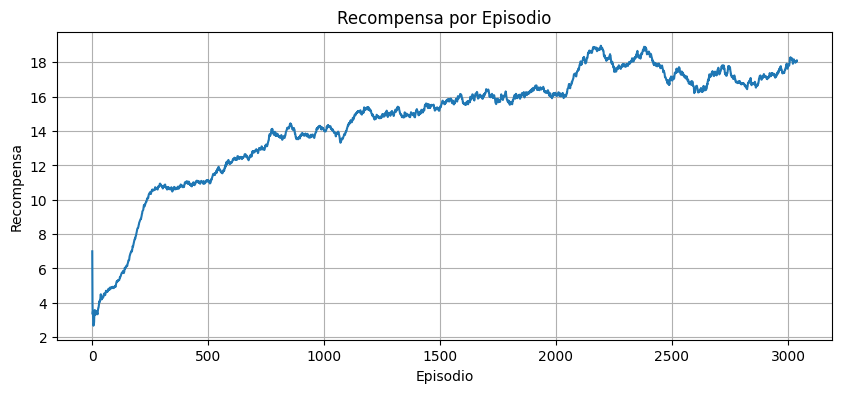

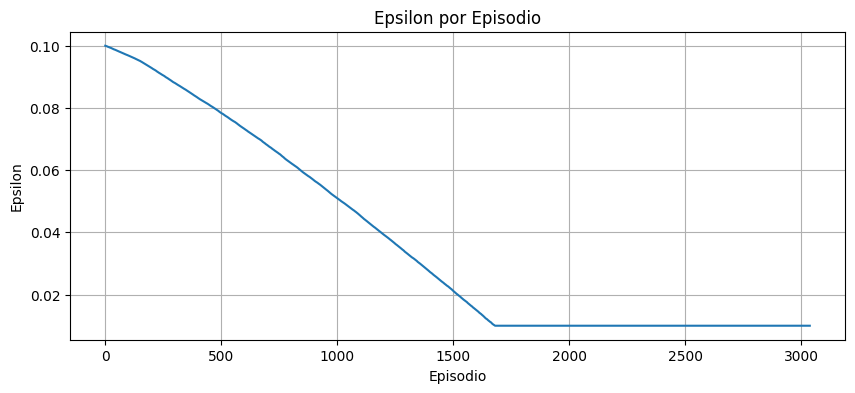

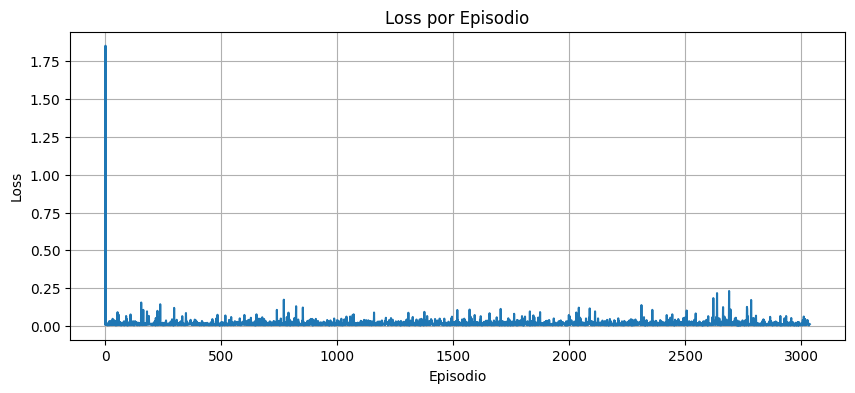

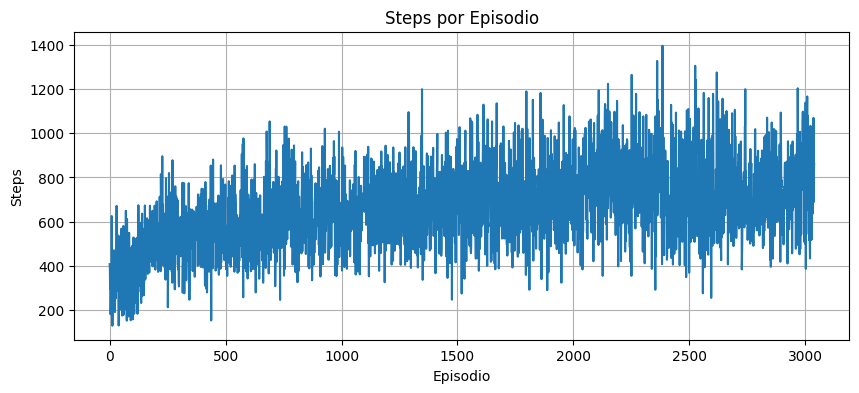

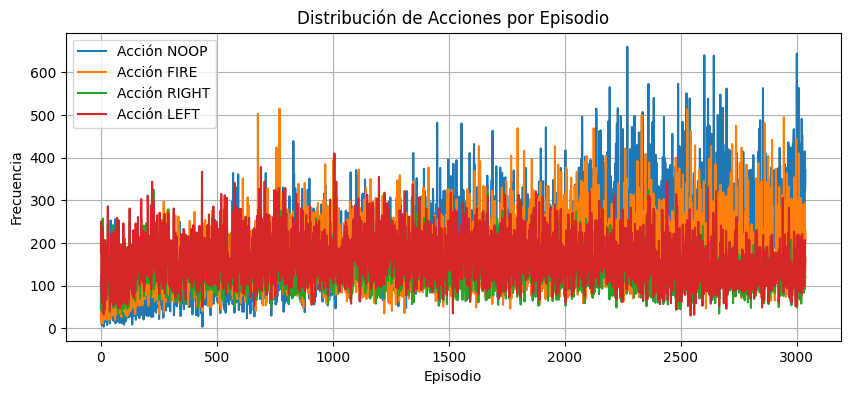

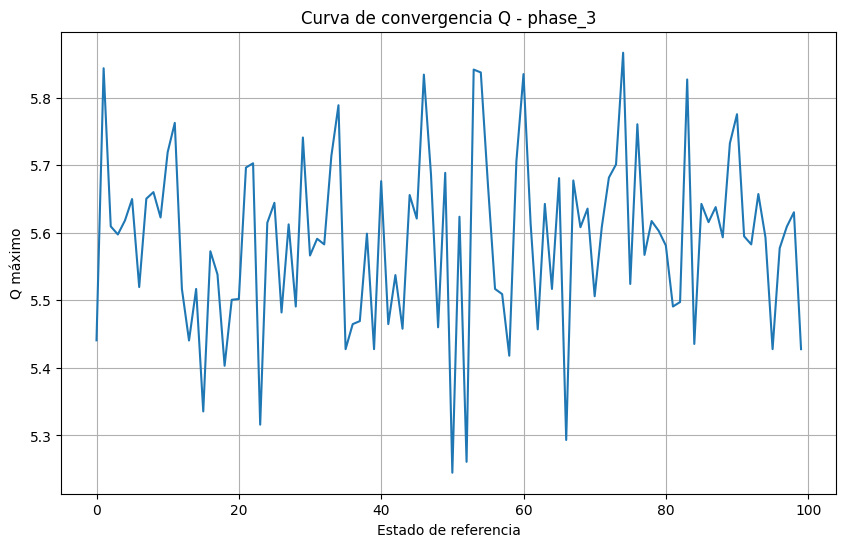

In [ ]:
METRICS_PATH = getMetricFilePath(True, PHASE_3_ID)
evaluate_training_phase_results(pathname=METRICS_PATH, phase_id=PHASE_3_ID)

CONCLUSION FASE 3 

## Observaciones phase 3

Aunque el agente aprendio una politica que mejora al agente de la fase dos, podemos ver que luego del episodio 2000 el agente comienza a estancarse, esto puede deberse a una exploracion insuficiente, vemos que se empieza a estancar con epsilon = 0.01, o sea que casi no explora. Pero tambien puede deberse a que el agente experimenta un sobreajuste a una política subóptima, es decir, aprende una estrategia que ofrece un rendimiento aceptable pero no óptimo, y termina atrapado en ella sin explorar alternativas que podrían generar mejores resultados. Para descartal la primer hipotesis vamos a hacer otro entrenamiento con mas exploracion, para ver si mejora.

### Evaluar el juego del ambiente Phase 3

In [ ]:
video_path = execute_agent_play(dqn_agent, PHASE_3_ID)
Video(video_path, embed=True, width=600)

Recompensa total del episodio 0: 21.0
Recompensa total promedio: 21.0


### Exploracion en fase 3

AÑADIR DESCRIPCION DE FASE COMO SE HACE CON LAS ANTERIORES

In [ ]:
LOAD_NET_PATH = getGenericDataFilePath(True, PHASE_3_ID)
print(f"net a cargar con PHASE_ID: {PHASE_3_ID}")
PHASE_ID, TOTAL_STEPS, EPISODES, EPSILON_INI, EPSILON_MIN, EPSILON_ANNEAL_STEPS = get_phase_attributes(PHASE_3_2)
print(f"PHASE_ID: {PHASE_ID}, TOTAL_STEPS: {TOTAL_STEPS}, EPISODES: {EPISODES}, EPSILON_INI: {EPSILON_INI}, EPSILON_MIN: {EPSILON_MIN}, EPSILON_ANNEAL_STEPS: {EPSILON_ANNEAL_STEPS}, LOAD_NET_PATH: {LOAD_NET_PATH}")

net a cargar con PHASE_ID: phase_3
PHASE_ID: phase_3_2, TOTAL_STEPS: 2000000, EPISODES: 10000, EPSILON_INI: 0.5, EPSILON_MIN: 0.01, EPSILON_ANNEAL_STEPS: 1000000, LOAD_NET_PATH: net_history/dqn/GenericDQNAgent-phase_3.dat


In [ ]:
# Creamos, cargamos pesos anteriores y entrenemos el agente
dqn_agent = execute_dqn_training_phase(PHASE_ID, reference_states, loadPath=LOAD_NET_PATH, total_steps = TOTAL_STEPS, episodes = EPISODES, epsilon_i = EPSILON_INI, epsilon_f = EPSILON_MIN, epsilon_anneal_steps = EPSILON_ANNEAL_STEPS)

Parametros del agente:
loadPath: net_history/dqn/GenericDQNAgent-phase_3.dat
buffer_size: 50000
batch_size: 32
learning_rate: 1e-05
gamma: 0.995
epsilon_i: 0.5
epsilon_f: 0.01
epsilon_anneal_steps: 1000000
episode_block: 100
run_name: phase_3_2
Use prioritized memory: False


Entrenando:   0%|          | 0/10000 [00:00<?, ?episode/s]



Iniciando entrenamiento phase_3_2, con los siguientes hiperparametros:

gamma: 0.995, epsilon_i: 0.5, epsilon_f: 0.01, epsilon_anneal_steps: 1000000, max_steps: 2000000




/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
Entrenando:   4%|▍         | 391/10000 [11:02<5:52:38,  2.20s/episode, reward=7.87, epsilon=0.426, steps=150016]


=== Recompensa actual: 7.87, Epsilon: 0.42649216, Total steps: 150016 ===


Entrenando:   7%|▋         | 728/10000 [22:10<6:25:14,  2.49s/episode, reward=8.74, epsilon=0.353, steps=3e+5]


=== Recompensa actual: 8.74, Epsilon: 0.35278244000000003, Total steps: 300444 ===


Entrenando:  10%|█         | 1040/10000 [33:18<5:00:28,  2.01s/episode, reward=9.35, epsilon=0.279, steps=450117]


=== Recompensa actual: 9.35, Epsilon: 0.27944267, Total steps: 450117 ===


Entrenando:  13%|█▎        | 1318/10000 [44:32<6:08:24,  2.55s/episode, reward=11.5, epsilon=0.206, steps=6e+5]


=== Recompensa actual: 11.47, Epsilon: 0.20582310999999998, Total steps: 600361 ===


Entrenando:  16%|█▌        | 1572/10000 [55:53<6:40:13,  2.85s/episode, reward=13.1, epsilon=0.132, steps=750383]


=== Recompensa actual: 13.13, Epsilon: 0.13231232999999998, Total steps: 750383 ===


Entrenando:  18%|█▊        | 1815/10000 [1:07:17<6:26:54,  2.84s/episode, reward=14.4, epsilon=0.0587, steps=900568]


=== Recompensa actual: 14.44, Epsilon: 0.05872168, Total steps: 900568 ===


Entrenando:  20%|██        | 2036/10000 [1:18:38<8:33:31,  3.87s/episode, reward=14.9, epsilon=0.01, steps=1050418]


=== Recompensa actual: 14.95, Epsilon: 0.01, Total steps: 1050418 ===


Entrenando:  22%|██▏       | 2243/10000 [1:30:05<6:57:38,  3.23s/episode, reward=16.2, epsilon=0.01, steps=1.2e+6]


=== Recompensa actual: 16.22, Epsilon: 0.01, Total steps: 1200120 ===


Entrenando:  25%|██▍       | 2451/10000 [1:41:29<6:34:46,  3.14s/episode, reward=17.6, epsilon=0.01, steps=1350011]


=== Recompensa actual: 17.56, Epsilon: 0.01, Total steps: 1350011 ===


Entrenando:  27%|██▋       | 2655/10000 [1:52:59<7:22:00,  3.61s/episode, reward=18.9, epsilon=0.01, steps=1.5e+6]


=== Recompensa actual: 18.94, Epsilon: 0.01, Total steps: 1500605 ===


Entrenando:  29%|██▊       | 2855/10000 [2:04:18<6:37:26,  3.34s/episode, reward=17.8, epsilon=0.01, steps=1650604]


=== Recompensa actual: 17.81, Epsilon: 0.01, Total steps: 1650604 ===


Entrenando:  31%|███       | 3056/10000 [2:15:43<6:40:17,  3.46s/episode, reward=17.3, epsilon=0.01, steps=1.8e+6]


=== Recompensa actual: 17.28, Epsilon: 0.01, Total steps: 1800005 ===


Entrenando:  33%|███▎      | 3258/10000 [2:27:04<5:49:52,  3.11s/episode, reward=17.3, epsilon=0.01, steps=1950042]


=== Recompensa actual: 17.29, Epsilon: 0.01, Total steps: 1950042 ===


Entrenando:  33%|███▎      | 3324/10000 [2:30:51<5:03:00,  2.72s/episode, reward=17.8, epsilon=0.01, steps=2e+6]
/content/obligatorio-taller-ia/load_and_evaluate.py:98: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  state_tensor = torch.tensor(state, dtype=torch.float32).unsqueeze(0).to(device)



Entrenamiento detenido: se alcanzaron 2000001 pasos.


Datos cargados de metrics/dqn/metrics_phase_3_2.npz: [[ 91  91  79  85]
 [ 30  88  30  34]
 [ 83 109 123 121]
 ...
 [332  80 132 129]
 [399 128 102 176]
 [ 16   7   3   6]]


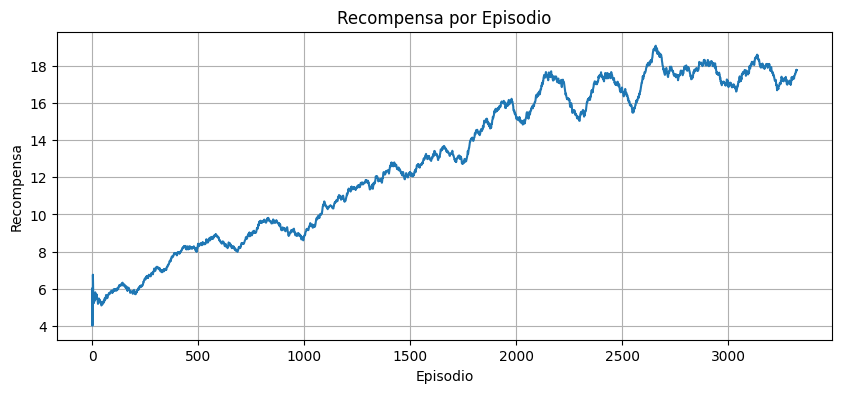

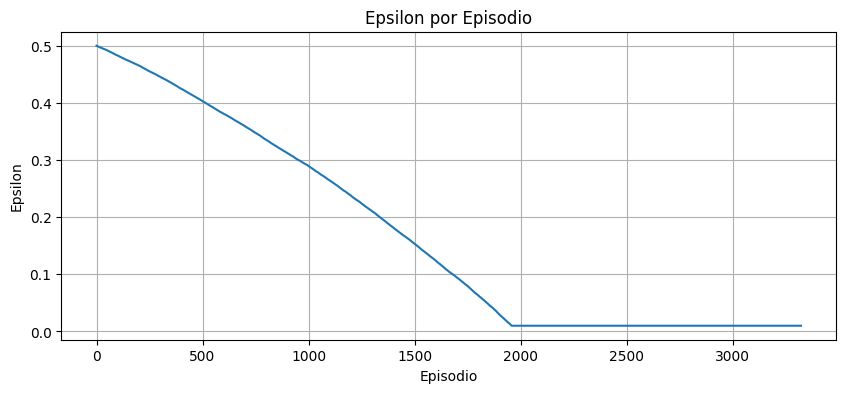

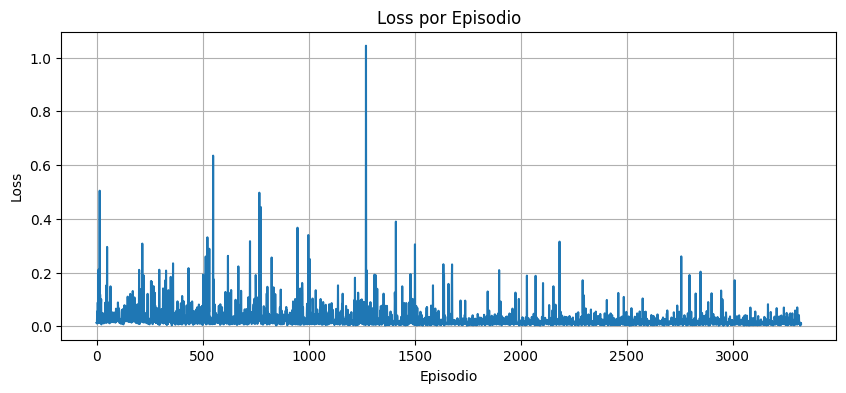

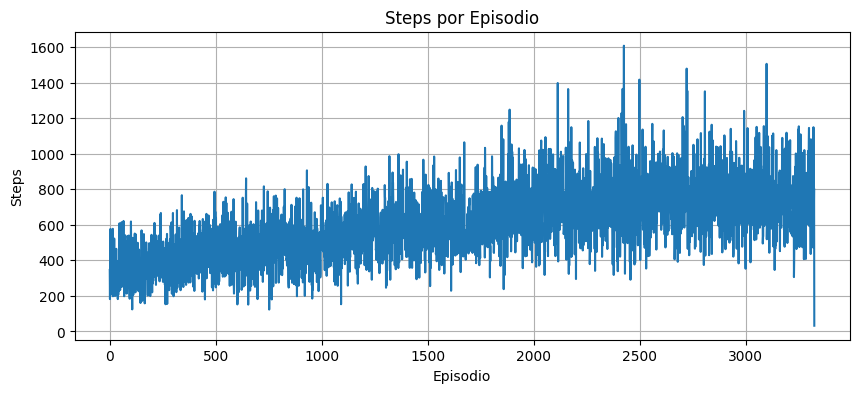

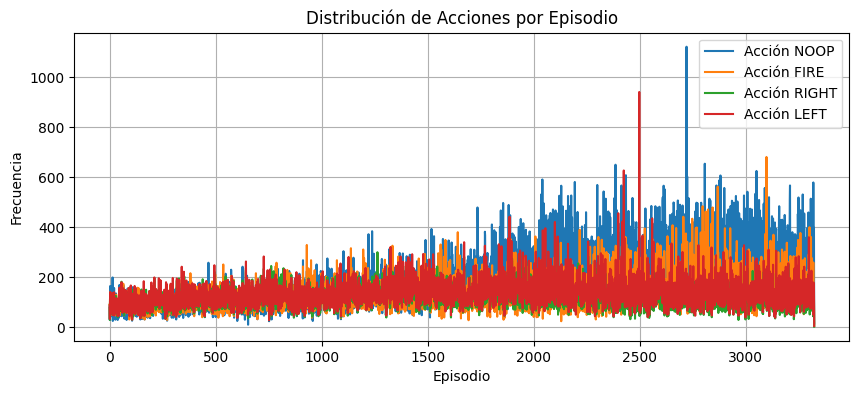

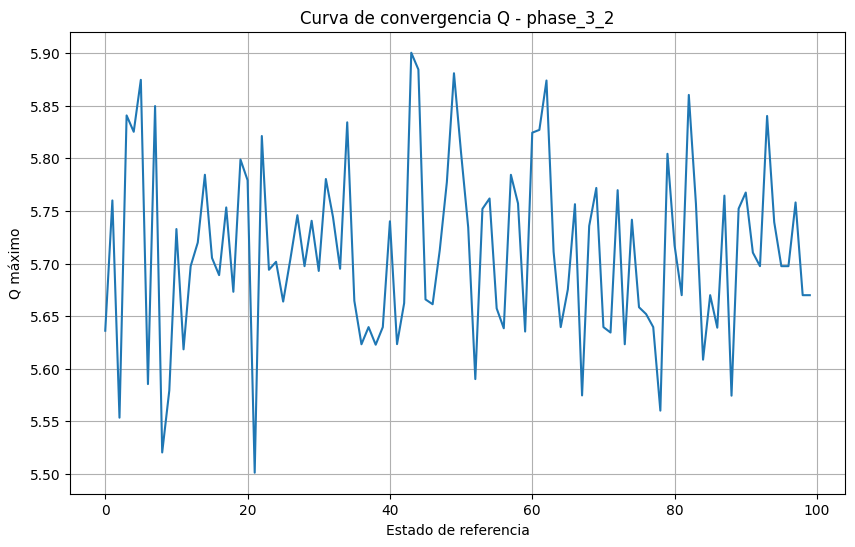

In [ ]:
METRICS_PATH = getMetricFilePath(True, PHASE_3_2_ID)
evaluate_training_phase_results(pathname=METRICS_PATH, phase_id=PHASE_3_2_ID)

CONCLUSION FASE 3_2

In [ ]:
video_path = execute_agent_play(dqn_agent, PHASE_3_2_ID)
Video(video_path, embed=True, width=600)

Recompensa total del episodio 0: 23.0
Recompensa total promedio: 23.0


## 4. Entrenamiento largo

Luego de consolidar una política estable, el agente está listo para enfrentar su fase más extensa: **un entrenamiento de 6.000.000 pasos**. Esta etapa tiene como objetivo principal **refinar los últimos detalles de su comportamiento**, buscando alcanzar un rendimiento óptimo y robusto.

Durante esta fase, la exploración es mínima:

- `EPSILON_INI = 0.05`: el agente comienza confiando casi por completo en su política aprendida.
- `EPSILON_MIN = 0.01`: se conserva un margen muy pequeño de exploración para evitar caer en políticas rígidas o locales.
- `EPSILON_ANNEAL_STEPS = 1.000.000`: el descenso es lento y progresivo, asegurando una transición estable hacia la explotación total.

En este punto, el agente ya sabe jugar razonablemente bien. El objetivo no es descubrir nuevas estrategias, sino **mejorar la consistencia, evitar errores esporádicos** y adaptarse a variaciones sutiles del entorno.

En la gráfica de pérdida (loss), esperamos observar:

- Valores bajos de pérdida sostenida, con menor varianza.
- Posibles picos aislados, que reflejan casos complejos o poco frecuentes.
- Una mayor proporción de episodios con `loss` cercano a cero.

Esta etapa representa el momento en que el agente deja de aprender con grandes saltos y empieza a **pulir detalles**, como quien afina los últimos toques antes de una presentación.

Al final de esta fase, esperamos ver un comportamiento mucho más **confiado, efectivo y repetible**, listo para ser evaluado sin exploración y con resultados competitivos.

In [ ]:
LOAD_NET_PATH = getGenericDataFilePath(True, PHASE_3_2_ID)
print(f"net a cargar con PHASE_ID: {PHASE_3_2_ID}")
PHASE_ID, TOTAL_STEPS, EPISODES, EPSILON_INI, EPSILON_MIN, EPSILON_ANNEAL_STEPS = get_phase_attributes(PHASE_4_1)
print(f"PHASE_ID: {PHASE_ID}, TOTAL_STEPS: {TOTAL_STEPS}, EPISODES: {EPISODES}, EPSILON_INI: {EPSILON_INI}, EPSILON_MIN: {EPSILON_MIN}, EPSILON_ANNEAL_STEPS: {EPSILON_ANNEAL_STEPS}, LOAD_NET_PATH: {LOAD_NET_PATH}")

In [ ]:
dqn_agent = execute_dqn_training_phase(PHASE_ID, reference_states, loadPath=LOAD_NET_PATH, total_steps = TOTAL_STEPS, episodes = EPISODES, epsilon_i = EPSILON_INI, epsilon_f = EPSILON_MIN, epsilon_anneal_steps = EPSILON_ANNEAL_STEPS)

net a cargar con PHASE_ID: initial_run
PHASE_ID: phase_4_1, TOTAL_STEPS: 2000000, EPISODES: 10000, EPSILON_INI: 0.05, EPSILON_MIN: 0.01, EPSILON_ANNEAL_STEPS: 1000000, LOAD_NET_PATH: net_history/dqn/GenericDQNAgent-phase_3.dat
Parametros del agente:
loadPath: net_history/dqn/GenericDQNAgent-phase_3.dat
buffer_size: 50000
batch_size: 32
learning_rate: 1e-05
gamma: 0.995
epsilon_i: 0.05
epsilon_f: 0.01
epsilon_anneal_steps: 1000000
episode_block: 100
run_name: phase_4_1


/usr/local/lib/python3.11/dist-packages/gymnasium/wrappers/rendering.py:283: UserWarning: WARN: Overwriting existing videos at /content/obligatorio-taller-ia/videos/dqn/phase_4_1 folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(
Entrenando:   0%|          | 0/10000 [00:00<?, ?episode/s]



Iniciando entrenamiento phase_4_1, con los siguientes hiperparametros:

gamma: 0.995, epsilon_i: 0.05, epsilon_f: 0.01, epsilon_anneal_steps: 1000000, max_steps: 2000000




/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
Entrenando:   2%|▏         | 221/10000 [11:35<8:41:39,  3.20s/episode, reward=16.4, epsilon=0.044, steps=150152]


=== Recompensa actual: 16.38, Epsilon: 0.043993920000000006, Total steps: 150152 ===


Entrenando:   4%|▍         | 427/10000 [23:33<10:16:28,  3.86s/episode, reward=17.4, epsilon=0.038, steps=3e+5]


=== Recompensa actual: 17.37, Epsilon: 0.03799604, Total steps: 300099 ===


Entrenando:   6%|▋         | 628/10000 [35:26<7:41:45,  2.96s/episode, reward=18.5, epsilon=0.032, steps=450329]


=== Recompensa actual: 18.48, Epsilon: 0.03198684, Total steps: 450329 ===


Entrenando:   8%|▊         | 830/10000 [46:57<8:50:08,  3.47s/episode, reward=17.9, epsilon=0.026, steps=6e+5]


=== Recompensa actual: 17.95, Epsilon: 0.025983320000000004, Total steps: 600417 ===


Entrenando:  10%|█         | 1022/10000 [58:34<8:49:44,  3.54s/episode, reward=18.4, epsilon=0.02, steps=750282]


=== Recompensa actual: 18.38, Epsilon: 0.01998872, Total steps: 750282 ===


Entrenando:  12%|█▏        | 1224/10000 [1:10:05<8:42:40,  3.57s/episode, reward=17.8, epsilon=0.014, steps=9e+5] 


=== Recompensa actual: 17.83, Epsilon: 0.013980720000000002, Total steps: 900482 ===


Entrenando:  14%|█▍        | 1418/10000 [1:21:36<8:14:32,  3.46s/episode, reward=18.7, epsilon=0.01, steps=1050488]


=== Recompensa actual: 18.67, Epsilon: 0.01, Total steps: 1050488 ===


Entrenando:  16%|█▌        | 1603/10000 [1:33:18<10:31:10,  4.51s/episode, reward=19.4, epsilon=0.01, steps=1.2e+6]


=== Recompensa actual: 19.41, Epsilon: 0.01, Total steps: 1200835 ===


Entrenando:  18%|█▊        | 1789/10000 [1:44:49<8:24:34,  3.69s/episode, reward=19.4, epsilon=0.01, steps=1350627]


=== Recompensa actual: 19.41, Epsilon: 0.01, Total steps: 1350627 ===


Entrenando:  20%|█▉        | 1981/10000 [1:56:12<8:25:49,  3.78s/episode, reward=18.6, epsilon=0.01, steps=1.5e+6]


=== Recompensa actual: 18.56, Epsilon: 0.01, Total steps: 1500120 ===


Entrenando:  22%|██▏       | 2164/10000 [2:07:55<7:20:53,  3.38s/episode, reward=20.1, epsilon=0.01, steps=1650496]


=== Recompensa actual: 20.09, Epsilon: 0.01, Total steps: 1650496 ===


Entrenando:  23%|██▎       | 2341/10000 [2:19:30<7:16:04,  3.42s/episode, reward=19.7, epsilon=0.01, steps=1.8e+6]


=== Recompensa actual: 19.71, Epsilon: 0.01, Total steps: 1800675 ===


Entrenando:  25%|██▌       | 2523/10000 [2:31:12<7:09:39,  3.45s/episode, reward=19.4, epsilon=0.01, steps=1950009]


=== Recompensa actual: 19.44, Epsilon: 0.01, Total steps: 1950009 ===


Entrenando:  26%|██▌       | 2584/10000 [2:35:07<7:25:11,  3.60s/episode, reward=19.4, epsilon=0.01, steps=2e+6]


Entrenamiento detenido: se alcanzaron 2000001 pasos.


In [ ]:
LOAD_NET_PATH = getGenericDataFilePath(True, PHASE_4_1_ID)
print(f"net a cargar con PHASE_ID: {PHASE_4_1_ID}")
PHASE_ID, TOTAL_STEPS, EPISODES, EPSILON_INI, EPSILON_MIN, EPSILON_ANNEAL_STEPS = get_phase_attributes(PHASE_4_2)
print(f"PHASE_ID: {PHASE_ID}, TOTAL_STEPS: {TOTAL_STEPS}, EPISODES: {EPISODES}, EPSILON_INI: {EPSILON_INI}, EPSILON_MIN: {EPSILON_MIN}, EPSILON_ANNEAL_STEPS: {EPSILON_ANNEAL_STEPS}, LOAD_NET_PATH: {LOAD_NET_PATH}")

net a cargar con PHASE_ID: phase_4_2
PHASE_ID: phase_4_2, TOTAL_STEPS: 2000000, EPISODES: 10000, EPSILON_INI: 0.01, EPSILON_MIN: 0.01, EPSILON_ANNEAL_STEPS: 2000000, LOAD_NET_PATH: net_history/dqn/GenericDQNAgent-phase_4_1.dat


In [ ]:
dqn_agent = execute_dqn_training_phase(PHASE_ID, reference_states, loadPath=LOAD_NET_PATH, total_steps = TOTAL_STEPS, episodes = EPISODES, epsilon_i = EPSILON_INI, epsilon_f = EPSILON_MIN, epsilon_anneal_steps = EPSILON_ANNEAL_STEPS)

net a cargar con PHASE_ID: phase_4_1
PHASE_ID: phase_4_2, TOTAL_STEPS: 2000000, EPISODES: 10000, EPSILON_INI: 0.01, EPSILON_MIN: 0.01, EPSILON_ANNEAL_STEPS: 2000000, LOAD_NET_PATH: net_history/dqn/GenericDQNAgent-phase_4_1.dat
Parametros del agente:
loadPath: net_history/dqn/GenericDQNAgent-phase_4_1.dat
buffer_size: 50000
batch_size: 32
learning_rate: 1e-05
gamma: 0.995
epsilon_i: 0.01
epsilon_f: 0.01
epsilon_anneal_steps: 2000000
episode_block: 100
run_name: phase_4_2


Entrenando:   0%|          | 0/10000 [00:00<?, ?episode/s]



Iniciando entrenamiento phase_4_2, con los siguientes hiperparametros:

gamma: 0.995, epsilon_i: 0.01, epsilon_f: 0.01, epsilon_anneal_steps: 2000000, max_steps: 2000000




/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
Entrenando:   2%|▏         | 205/10000 [13:28<13:13:17,  4.86s/episode, reward=17.8, epsilon=0.01, steps=150470]


=== Recompensa actual: 17.75, Epsilon: 0.01, Total steps: 150470 ===


Entrenando:   4%|▍         | 392/10000 [27:00<11:40:45,  4.38s/episode, reward=20, epsilon=0.01, steps=3e+5]


=== Recompensa actual: 19.99, Epsilon: 0.01, Total steps: 300328 ===


Entrenando:   6%|▌         | 585/10000 [40:27<10:54:37,  4.17s/episode, reward=18.6, epsilon=0.01, steps=450693]


=== Recompensa actual: 18.59, Epsilon: 0.01, Total steps: 450693 ===


Entrenando:   8%|▊         | 768/10000 [53:47<12:32:17,  4.89s/episode, reward=19.5, epsilon=0.01, steps=6e+5]


=== Recompensa actual: 19.49, Epsilon: 0.01, Total steps: 600252 ===


Entrenando:   9%|▉         | 948/10000 [1:07:35<10:13:50,  4.07s/episode, reward=19.8, epsilon=0.01, steps=750545]


=== Recompensa actual: 19.78, Epsilon: 0.01, Total steps: 750545 ===


Entrenando:  11%|█▏        | 1133/10000 [1:21:10<10:04:38,  4.09s/episode, reward=20.1, epsilon=0.01, steps=9e+5]


=== Recompensa actual: 20.08, Epsilon: 0.01, Total steps: 900450 ===


Entrenando:  13%|█▎        | 1313/10000 [1:34:48<8:45:38,  3.63s/episode, reward=19.8, epsilon=0.01, steps=1050563]


=== Recompensa actual: 19.84, Epsilon: 0.01, Total steps: 1050563 ===


Entrenando:  15%|█▌        | 1501/10000 [1:48:12<10:04:56,  4.27s/episode, reward=19.1, epsilon=0.01, steps=1.2e+6]


=== Recompensa actual: 19.1, Epsilon: 0.01, Total steps: 1200817 ===


Entrenando:  17%|█▋        | 1695/10000 [2:01:38<9:19:26,  4.04s/episode, reward=18.3, epsilon=0.01, steps=1350257] 


=== Recompensa actual: 18.32, Epsilon: 0.01, Total steps: 1350257 ===


Entrenando:  19%|█▉        | 1883/10000 [2:14:59<10:03:44,  4.46s/episode, reward=19.4, epsilon=0.01, steps=1.5e+6]


=== Recompensa actual: 19.35, Epsilon: 0.01, Total steps: 1500696 ===


Entrenando:  21%|██        | 2065/10000 [2:28:19<12:28:33,  5.66s/episode, reward=20, epsilon=0.01, steps=1651049]


=== Recompensa actual: 19.96, Epsilon: 0.01, Total steps: 1651049 ===


Entrenando:  22%|██▎       | 2250/10000 [2:41:39<11:03:07,  5.13s/episode, reward=19.8, epsilon=0.01, steps=1.8e+6]


=== Recompensa actual: 19.78, Epsilon: 0.01, Total steps: 1800280 ===


Entrenando:  24%|██▍       | 2433/10000 [2:55:05<9:11:16,  4.37s/episode, reward=19.2, epsilon=0.01, steps=1950531]


=== Recompensa actual: 19.17, Epsilon: 0.01, Total steps: 1950531 ===


Entrenando:  25%|██▍       | 2490/10000 [2:59:32<9:01:31,  4.33s/episode, reward=20.1, epsilon=0.01, steps=2e+6]


Entrenamiento detenido: se alcanzaron 2000001 pasos.


In [ ]:
from load_and_evaluate import  load_dqn_agent
VIDEO_FOLDER = f"./videos/dqn_training_{PHASE_4_2}"
env = create_env(video_folder=VIDEO_FOLDER)
LOAD_NET_PATH = getGenericDataFilePath(True, PHASE_4_2_ID)
dqn_agent = load_dqn_agent(env,
    loadPath=LOAD_NET_PATH,
    buffer_size=BUFFER_SIZE,
    batch_size=BATCH_SIZE,
    learning_rate=LEARNING_RATE,
    gamma=GAMMA,
    epsilon_i=EPSILON_INI,
    epsilon_f=EPSILON_MIN,
    epsilon_anneal_steps= EPSILON_ANNEAL_STEPS,
    episode_block=EPISODE_BLOCK,
    run_name=PHASE_4_2_ID
)

Parametros del agente:
loadPath: net_history/dqn/GenericDQNAgent-phase_4_2.dat
buffer_size: 30000
batch_size: 32
learning_rate: 1e-05
gamma: 0.995
epsilon_i: 0.01
epsilon_f: 0.01
epsilon_anneal_steps: 2000000
episode_block: 100
run_name: phase_4_2


/usr/local/lib/python3.11/dist-packages/gymnasium/wrappers/rendering.py:283: UserWarning: WARN: Overwriting existing videos at /content/obligatorio-taller-ia/videos/dqn_training_phase_4_2 folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


In [ ]:
VALIDATION_VIDEO_FOLDER = f'./videos/dqn_validation/{PHASE_4_2_ID}'
# creste env
env = create_env(video_folder=VALIDATION_VIDEO_FOLDER)
dqn_agent.play(env, episodes=1)

env.close()

# Ruta al archivo de vídeo en tu sistema de ficheros
video_path = f"{VALIDATION_VIDEO_FOLDER}/breakout-episode-0.mp4"

# Muestra el vídeo
Video(video_path, embed=True, width=600)

/usr/local/lib/python3.11/dist-packages/gymnasium/wrappers/rendering.py:283: UserWarning: WARN: Overwriting existing videos at /content/obligatorio-taller-ia/videos/dqn_validation/phase_4_2 folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Recompensa total del episodio 0: 28.0
Recompensa total promedio: 28.0


In [ ]:
LOAD_NET_PATH = getGenericDataFilePath(True, PHASE_4_2_ID)
print(f"net a cargar con PHASE_ID: {PHASE_4_2_ID}")
PHASE_ID, TOTAL_STEPS, EPISODES, EPSILON_INI, EPSILON_MIN, EPSILON_ANNEAL_STEPS = get_phase_attributes(PHASE_4_3)
print(f"PHASE_ID: {PHASE_ID}, TOTAL_STEPS: {TOTAL_STEPS}, EPISODES: {EPISODES}, EPSILON_INI: {EPSILON_INI}, EPSILON_MIN: {EPSILON_MIN}, EPSILON_ANNEAL_STEPS: {EPSILON_ANNEAL_STEPS}, LOAD_NET_PATH: {LOAD_NET_PATH}")

net a cargar con PHASE_ID: phase_4_2
PHASE_ID: phase_4_2, TOTAL_STEPS: 2000000, EPISODES: 10000, EPSILON_INI: 0.01, EPSILON_MIN: 0.01, EPSILON_ANNEAL_STEPS: 2000000, LOAD_NET_PATH: net_history/dqn/GenericDQNAgent-phase_4_2.dat


In [ ]:
dqn_agent = execute_dqn_training_phase(PHASE_ID, reference_states, loadPath=LOAD_NET_PATH, total_steps = TOTAL_STEPS, episodes = EPISODES, epsilon_i = EPSILON_INI, epsilon_f = EPSILON_MIN, epsilon_anneal_steps = EPSILON_ANNEAL_STEPS)

/usr/local/lib/python3.11/dist-packages/gymnasium/wrappers/rendering.py:283: UserWarning: WARN: Overwriting existing videos at /content/obligatorio-taller-ia/videos/dqn/phase_4_2 folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Parametros del agente:
loadPath: net_history/dqn/GenericDQNAgent-phase_4_2.dat
buffer_size: 50000
batch_size: 32
learning_rate: 1e-05
gamma: 0.995
epsilon_i: 0.01
epsilon_f: 0.01
epsilon_anneal_steps: 2000000
episode_block: 100
run_name: phase_4_2


Entrenando:   0%|          | 0/10000 [00:00<?, ?episode/s]



Iniciando entrenamiento phase_4_2, con los siguientes hiperparametros:

gamma: 0.995, epsilon_i: 0.01, epsilon_f: 0.01, epsilon_anneal_steps: 2000000, max_steps: 2000000




/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
Entrenando:   2%|▏         | 193/10000 [13:06<11:35:10,  4.25s/episode, reward=18.9, epsilon=0.01, steps=150763]


=== Recompensa actual: 18.94, Epsilon: 0.01, Total steps: 150763 ===


Entrenando:   4%|▍         | 380/10000 [25:55<11:32:12,  4.32s/episode, reward=19.7, epsilon=0.01, steps=3e+5]


=== Recompensa actual: 19.69, Epsilon: 0.01, Total steps: 300107 ===


Entrenando:   6%|▌         | 560/10000 [39:07<12:10:45,  4.64s/episode, reward=20.7, epsilon=0.01, steps=450235]


=== Recompensa actual: 20.7, Epsilon: 0.01, Total steps: 450235 ===


Entrenando:   7%|▋         | 736/10000 [52:06<11:36:32,  4.51s/episode, reward=20.5, epsilon=0.01, steps=600728]


=== Recompensa actual: 20.5, Epsilon: 0.01, Total steps: 600728 ===


Entrenando:   9%|▉         | 917/10000 [1:04:57<11:36:10,  4.60s/episode, reward=20.1, epsilon=0.01, steps=750070]


=== Recompensa actual: 20.13, Epsilon: 0.01, Total steps: 750070 ===


Entrenando:  11%|█         | 1100/10000 [1:17:57<10:22:18,  4.20s/episode, reward=20.2, epsilon=0.01, steps=9e+5]


=== Recompensa actual: 20.2, Epsilon: 0.01, Total steps: 900048 ===


Entrenando:  13%|█▎        | 1282/10000 [1:31:23<9:56:00,  4.10s/episode, reward=20.1, epsilon=0.01, steps=1050076] 


=== Recompensa actual: 20.11, Epsilon: 0.01, Total steps: 1050076 ===


Entrenando:  15%|█▍        | 1470/10000 [1:44:31<9:33:24,  4.03s/episode, reward=20, epsilon=0.01, steps=1.2e+6]


=== Recompensa actual: 19.97, Epsilon: 0.01, Total steps: 1200619 ===


Entrenando:  17%|█▋        | 1652/10000 [1:57:29<8:59:32,  3.88s/episode, reward=19.5, epsilon=0.01, steps=1350197]


=== Recompensa actual: 19.51, Epsilon: 0.01, Total steps: 1350197 ===


Entrenando:  18%|█▊        | 1820/10000 [2:10:24<10:50:26,  4.77s/episode, reward=22.6, epsilon=0.01, steps=1.5e+6]


=== Recompensa actual: 22.62, Epsilon: 0.01, Total steps: 1500010 ===


Entrenando:  20%|█▉        | 1993/10000 [2:23:27<9:56:59,  4.47s/episode, reward=21.4, epsilon=0.01, steps=1650433]


=== Recompensa actual: 21.45, Epsilon: 0.01, Total steps: 1650433 ===


Entrenando:  22%|██▏       | 2159/10000 [2:36:17<8:20:34,  3.83s/episode, reward=21.8, epsilon=0.01, steps=1.8e+6]


=== Recompensa actual: 21.77, Epsilon: 0.01, Total steps: 1800035 ===


Entrenando:  23%|██▎       | 2333/10000 [2:49:11<8:32:26,  4.01s/episode, reward=21, epsilon=0.01, steps=1950626]


=== Recompensa actual: 21.0, Epsilon: 0.01, Total steps: 1950626 ===


Entrenando:  24%|██▍       | 2395/10000 [2:53:21<9:10:29,  4.34s/episode, reward=19.5, epsilon=0.01, steps=2e+6]


Entrenamiento detenido: se alcanzaron 2000001 pasos.


Datos cargados de metrics/dqn/metrics_phase_4_2.npz: [[405 269 149 184]
 [490  89 158 180]
 [155  98 131 142]
 ...
 [214  89 153 256]
 [328 308 151 186]
 [144  83  42  47]]


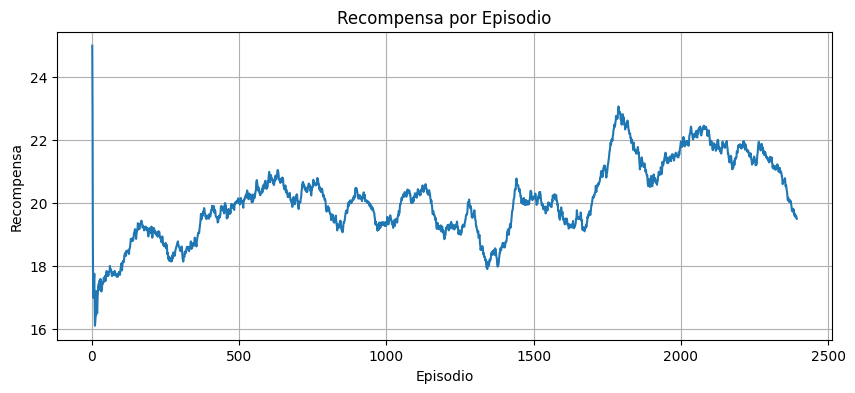

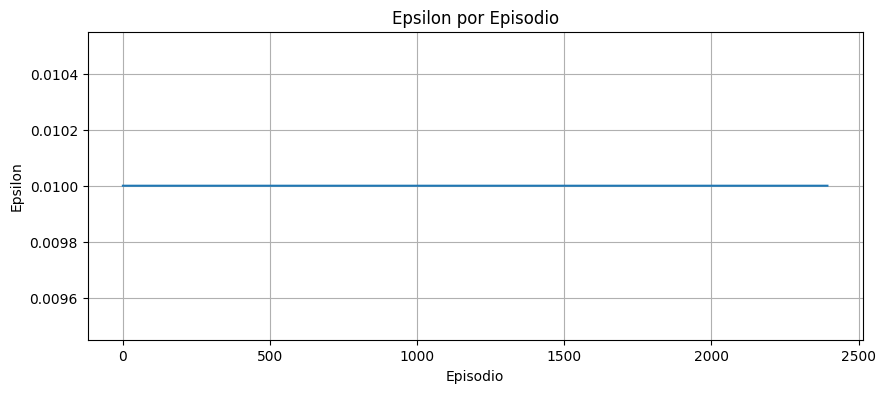

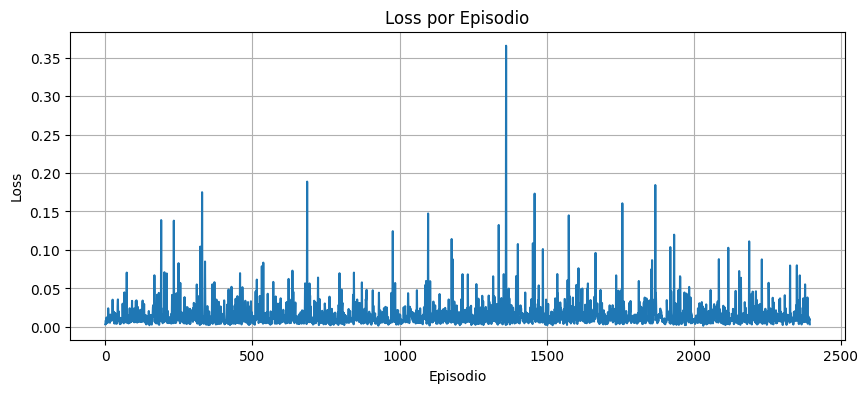

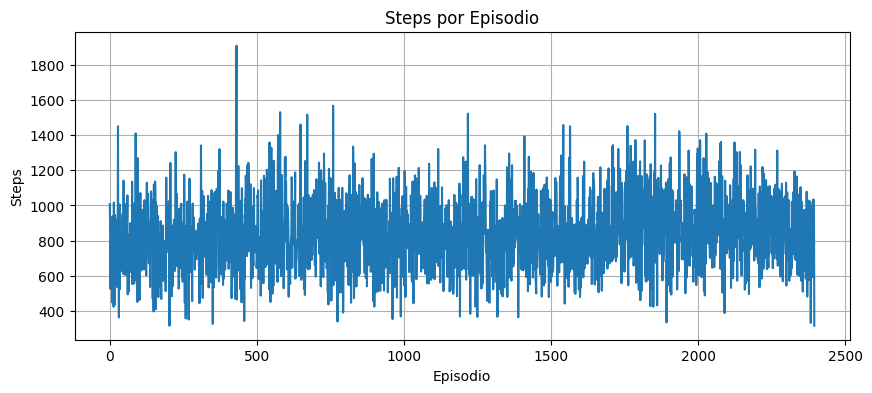

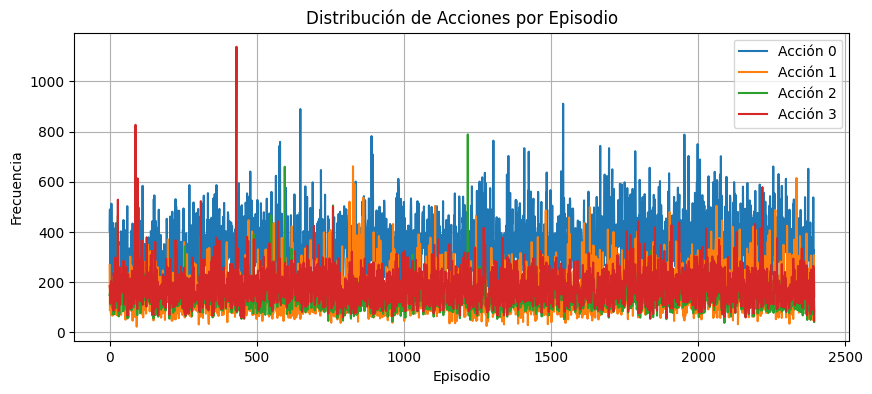

In [ ]:
METRICS_PATH  = getMetricFilePath(True, PHASE_4_3_ID)
graph_metrics(pathname=METRICS_PATH)

FASE 4_3 CONCLUSION OPCIONAL

### Validation Phase 4

In [ ]:
dqn_agent = dqn_agent if 'dqn_agent' in locals() else None
video_path = execute_agent_play(dqn_agent, PHASE_4_3_ID)


./videos/dqn/validation/phase_4_3/breakout-episode-0.mp4
None


In [ ]:
Video(video_path, embed=True, width=600)

AQUI VA UNA CONCLUSION ARRECHA Y SUS GRAFICAS SI APLICA

In [23]:
phase_ids = [PHASE_INITIAL_ID, PHASE_2_ID, PHASE_3_ID, PHASE_4_1_ID, PHASE_4_2_ID, PHASE_4_3_ID]
metrics_path = getMetricFilePathList(True, phase_ids)
print(metrics_path)

['initial_run', 'phase_2', 'phase_3', 'phase_3_2', 'phase_4_1', 'phase_4_2', 'phase_4_3']
['metrics/dqn/metrics_initial_run.npz', 'metrics/dqn/metrics_phase_2.npz', 'metrics/dqn/metrics_phase_3.npz', 'metrics/dqn/metrics_phase_3_2.npz', 'metrics/dqn/metrics_phase_4_1.npz', 'metrics/dqn/metrics_phase_4_2.npz', 'metrics/dqn/metrics_phase_4_3.npz']


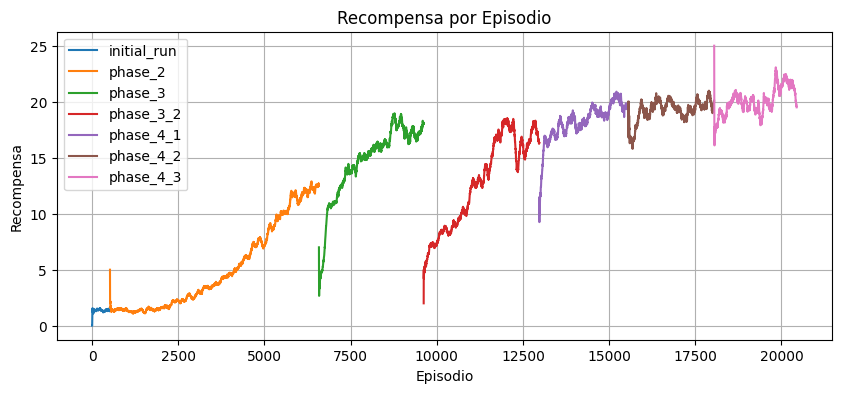

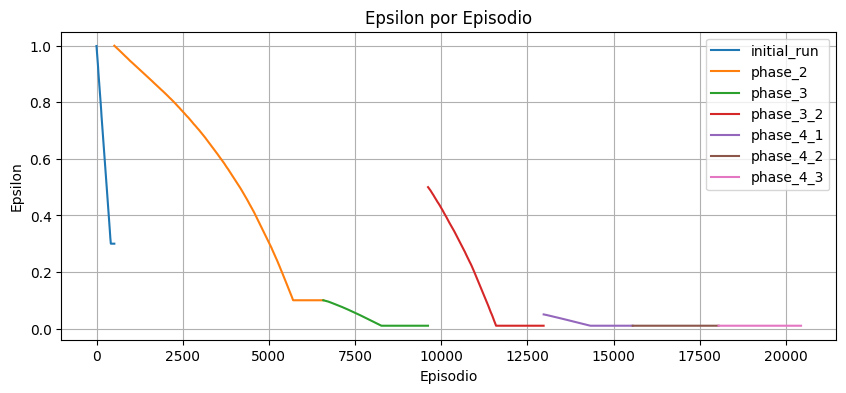

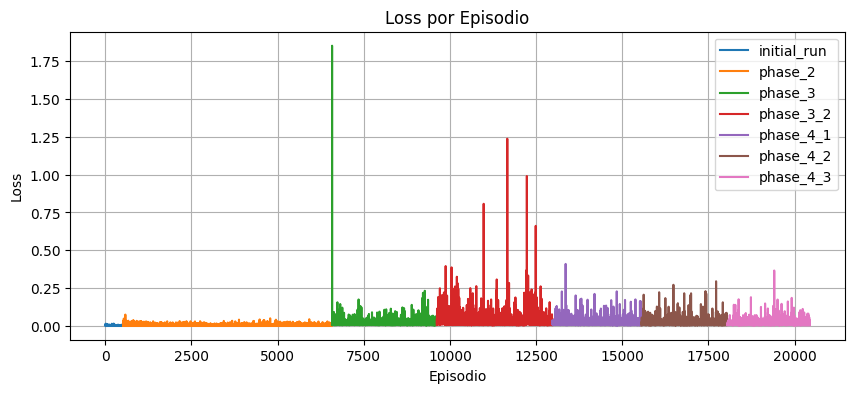

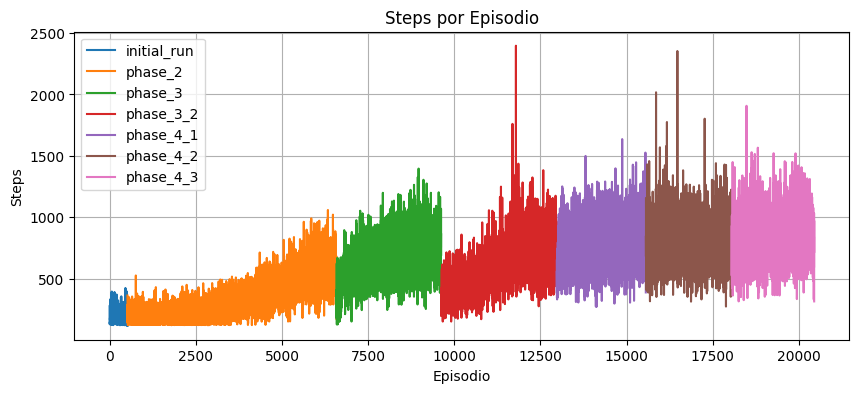

In [24]:
graph_metrics_accumulated(metrics_path, phase_ids)

CONCLUSION FINAL FASE DE ENTRENAMIENTO Y MOSTRAR EL VIDEO COMO MEJOR RECOMPENSA OBTENIDA

# Double Deep Q Learning

Double DQN mejora la versión clásica de DQN corrigiendo el sesgo de sobreestimación de los valores
𝑄
Q. Para ello, desacopla la selección de la acción de su evaluación: en cada paso, la red online elige la acción que maximiza
𝑄
Q, pero la red objetivo distinta estima el valor de esa acción. Esta separación reduce el sesgo hacia valores demasiado optimistas y aporta mayor estabilidad al entrenamiento. El resto de la estructura —replay buffer, política ε-greedy, etc— se mantiene igual que en DQN, aprovechando así un diseño casi idéntico al original pero con resultados más fiables .

Fuente: [arXiv:1509.06461](https://arxiv.org/abs/1509.06461)

> Vamos a utilizar el mismo modelo de red neuronal creado para el problema anterior y la misma implementación de memoria, dejamos un esqueleto de un agente de Double Deep Q learning para completar en el archivo **double_dqn_agent.py**

# Entrenamiento Progresivo de un Agente DDQN en Breakout

En esta sección del obligatorio implementamos un agente basado en Double Deep Q-Network (DQN) para resolver el entorno **Breakout** de Atari.

El objetivo es demostrar progresivamente cómo el agente mejora su rendimiento a través de fases de entrenamiento, visualización de métricas y evaluación.


## Preparación del entorno y del agente

Comenzamos creando el entorno y nuestro agente DDQN, basado en una red convolucional. Definimos los hiperparámetros iniciales que guiarán su comportamiento durante el entrenamiento.

Este paso es como presentar a nuestro protagonista antes de su viaje.

### Hiperparámetros fijos durante todo el entrenamiento


In [ ]:
BATCH_SIZE = 32
BUFFER_SIZE = 50_000
EPISODE_BLOCK = 100
LEARNING_RATE = 1e-5
STEPS_PER_EPISODE = 20_000
GAMMA = 0.995

## 1. Primeros pasos de aprendizaje

En esta primera etapa del entrenamiento, el agente Double DQN inicia su interacción con el entorno, enfrentándose a situaciones desconocidas y acumulando experiencias variadas. Al igual que en el DQN, ejecutamos un bloque limitado a **100.000 pasos**, cuyo principal objetivo es permitir que el agente **explore de forma amplia** el espacio de estados y acciones.

Para lograr una exploración efectiva, utilizamos el mismo esquema de control epsilon que en el DQN:

- `EPSILON_INI = 1.0`: el agente inicia tomando acciones completamente aleatorias.
- `EPSILON_MIN = 0.3`: hacia el final del bloque, conserva todavía un 30% de probabilidad de explorar.

Este diseño sigue siendo clave porque el algoritmo Double DQN, al igual que el DQN, depende de la diversidad de experiencias almacenadas en el Replay Memory para estabilizar el aprendizaje futuro.

In [ ]:
PHASE_ID, TOTAL_STEPS, EPISODES, EPSILON_INI, EPSILON_MIN, EPSILON_ANNEAL_STEPS = get_phase_attributes(PHASE_INITIAL)
print(f"PHASE_ID: {PHASE_ID}, TOTAL_STEPS: {TOTAL_STEPS}, EPISODES: {EPISODES}, EPSILON_INI: {EPSILON_INI}, EPSILON_MIN: {EPSILON_MIN}, EPSILON_ANNEAL_STEPS: {EPSILON_ANNEAL_STEPS}")
ddqn_agent = execute_ddqn_training_phase(PHASE_ID, reference_states, total_steps = TOTAL_STEPS, episodes = EPISODES, epsilon_ini = EPSILON_INI, epsilon_min = EPSILON_MIN, epsilon_anneal_steps = EPSILON_ANNEAL_STEPS)

PHASE_ID: initial_run, TOTAL_STEPS: 100000, EPISODES: 10000, EPSILON_INI: 1, EPSILON_MIN: 0.3, EPSILON_ANNEAL_STEPS: 80000
Parametros del agente:
loadPath: None
gamma: 0.995
epsilon_i: 1
epsilon_f: 0.3
epsilon_anneal_steps: 80000
run_name: initial_run


Entrenando:   0%|          | 0/10000 [00:00<?, ?episode/s]



Iniciando entrenamiento initial_run, con los siguientes hiperparametros:

gamma: 0.995, epsilon_i: 1, epsilon_f: 0.3, epsilon_anneal_steps: 80000, max_steps: 100000




/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
Entrenando:   5%|▍         | 491/10000 [08:19<2:41:07,  1.02s/episode, reward=1.72, epsilon=0.3, steps=1e+5]


Entrenamiento detenido: se alcanzaron 100001 pasos.



/content/obligatorio-taller-ia/load_and_evaluate.py:98: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  state_tensor = torch.tensor(state, dtype=torch.float32).unsqueeze(0).to(device)


### Evaluar resultados del entrenamiento

Datos cargados de metrics/ddqn/metrics_initial_run.npz: [[60 42 63 41]
 [30 35 41 33]
 [51 58 54 42]
 ...
 [34 60 21 17]
 [38 38 48 12]
 [14 22 32 17]]


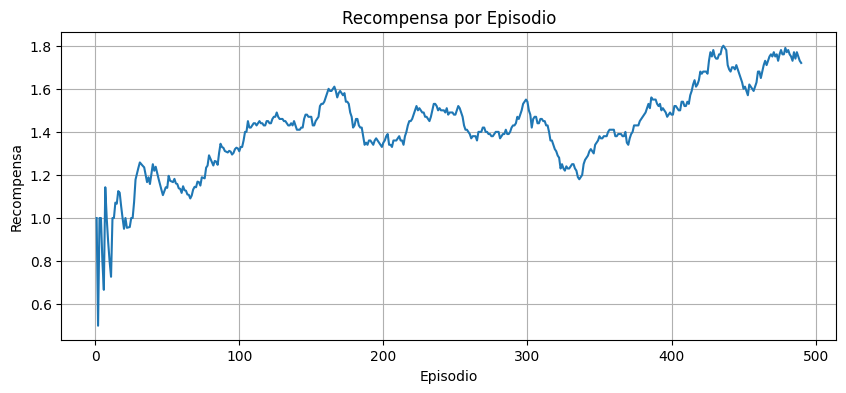

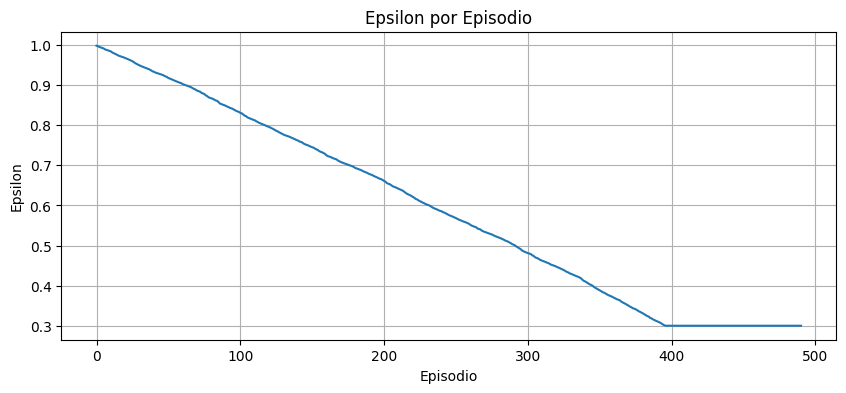

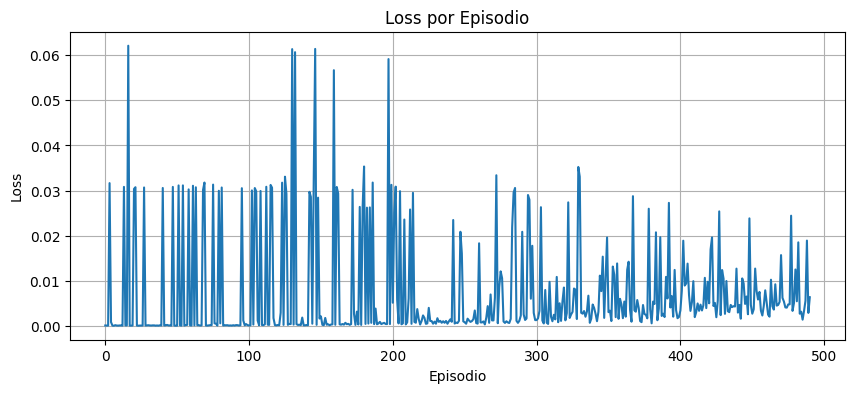

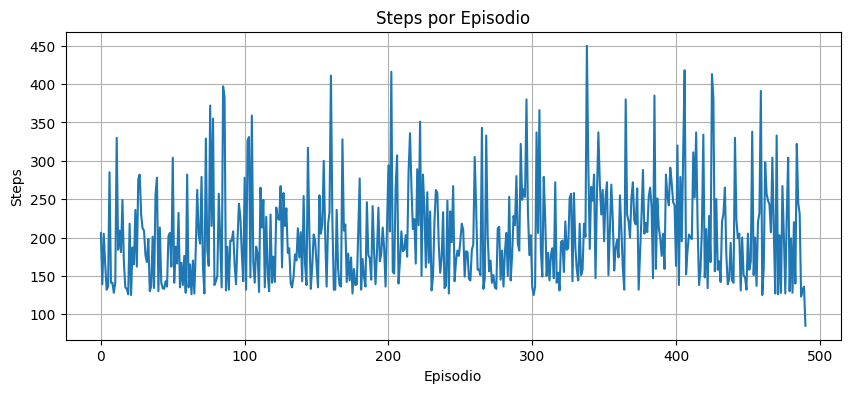

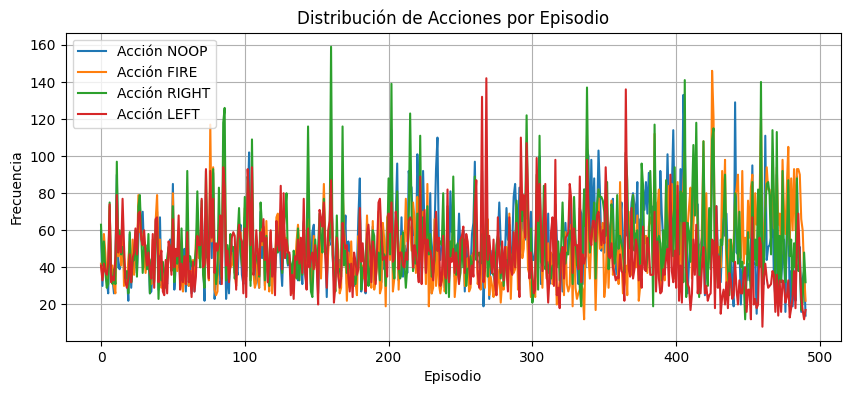

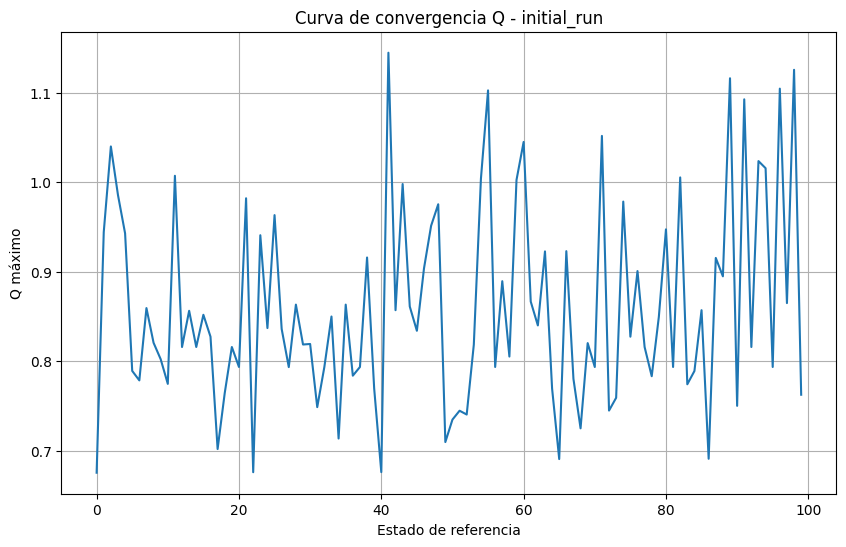

In [ ]:
METRICS_PATH = getMetricFilePath(False, PHASE_INITIAL["id"])
evaluate_training_phase_results(pathname=METRICS_PATH, phase_id=PHASE_INITIAL["id"], type=DOUBLE_DQN_TYPE)


### Evaluamos como juega el agente

In [ ]:
video_path = execute_agent_play(ddqn_agent, PHASE_INITIAL["id"], DOUBLE_DQN_TYPE)
Video(video_path, embed=True, width=600)

Ejecutando el agente ddqn en modo evaluación...
Recompensa total del episodio 0: 0.0
Recompensa total promedio: 0.0


## 2. Fase 2 de entrenamiento: Aprendizaje básico

Después de la primera etapa de exploración, el enfoque en esta fase no es tanto seguir descubriendo, sino empezar a pulir. El agente ya tiene una idea básica de cómo funciona el entorno, por lo que ahora buscamos que sus decisiones sean menos impulsivas y más fundamentadas.

A diferencia del entrenamiento con DQN, donde a veces se tienden a sobre-valorar ciertas acciones, en esta etapa implementamos Double DQN. Esto mejora la estabilidad del aprendizaje al separar la acción que se elige de la acción que se evalúa, lo que reduce errores comunes al calcular los valores Q.

Para este bloque usamos **2.000.000 pasos** y ajustamos epsilon para que el agente aún explore, pero cada vez con más intención de explotar lo que ya aprendió. No se trata de tomar riesgos porque sí, sino de afinar su comportamiento usando la experiencia que va acumulando.

En este punto, ya no esperamos saltos grandes en la recompensa de un momento a otro. Más bien, buscamos señales de consistencia: que el agente repita buenos comportamientos, que sobreviva más tiempo y que el loss empiece a estabilizarse. La mejora puede parecer más lenta, pero es justamente el signo de que está aprendiendo de verdad.

- `EPSILON_INI = 1`
- `EPSILON_MIN = 0.1`
- `EPSILON_ANNEAL_STEPS = 1_500_000`

In [ ]:
EXPLORATION_GAMMA = 0.97
LOAD_NET_PATH = getGenericDataFilePath(False, PHASE_INITIAL_ID])
print(f"LOAD_NET_PATH: {LOAD_NET_PATH}")

PHASE_ID, TOTAL_STEPS, EPISODES, EPSILON_INI, EPSILON_MIN, EPSILON_ANNEAL_STEPS = get_phase_attributes(PHASE_2)
print(f"PHASE_ID: {PHASE_ID}, TOTAL_STEPS: {TOTAL_STEPS}, EPISODES: {EPISODES}, EPSILON_INI: {EPSILON_INI}, EPSILON_MIN: {EPSILON_MIN}, EPSILON_ANNEAL_STEPS: {EPSILON_ANNEAL_STEPS}, LOAD_NET_PATH: {LOAD_NET_PATH}")
ddqn_agent = execute_ddqn_training_phase(PHASE_ID, reference_states, load_net_path=LOAD_NET_PATH, total_steps = TOTAL_STEPS, episodes = EPISODES, epsilon_ini = EPSILON_INI, epsilon_min = EPSILON_MIN, epsilon_anneal_steps = EPSILON_ANNEAL_STEPS, gamma=EXPLORATION_GAMMA)

Datos cargados de metrics/ddqn/metrics_phase_2.npz: [[ 44  52  47  38]
 [ 43  48  39  44]
 [ 33  37  30  35]
 ...
 [127 199 118 188]
 [123 214 133 155]
 [ 95 135  96 105]]


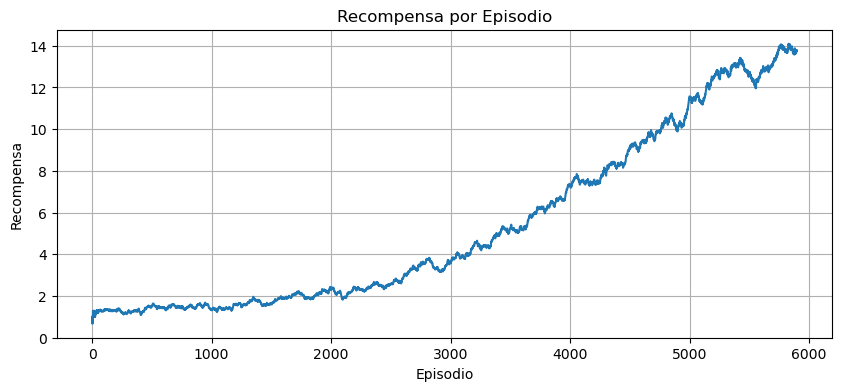

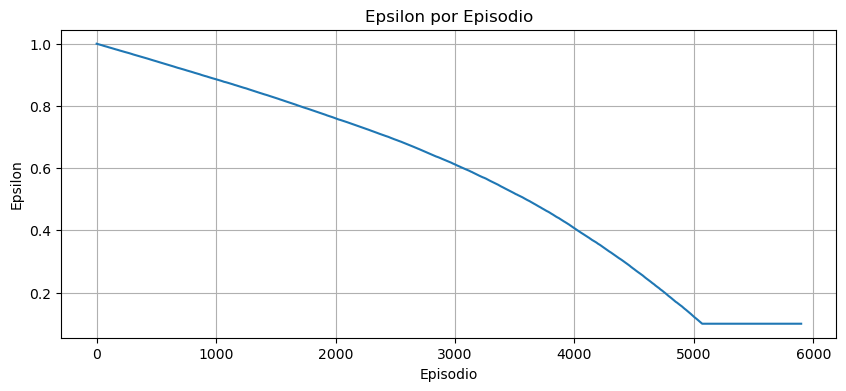

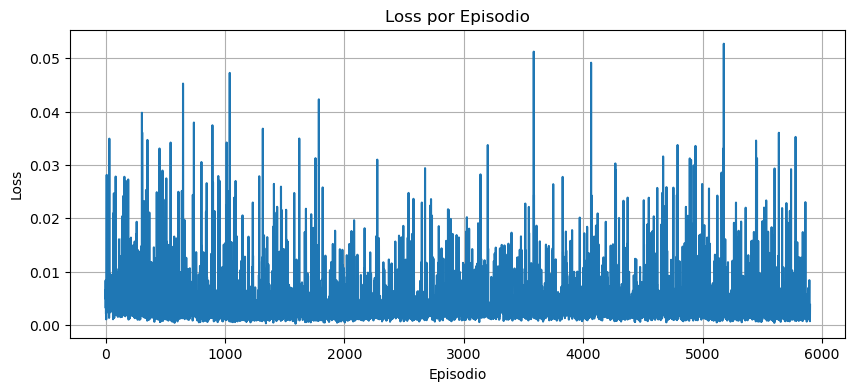

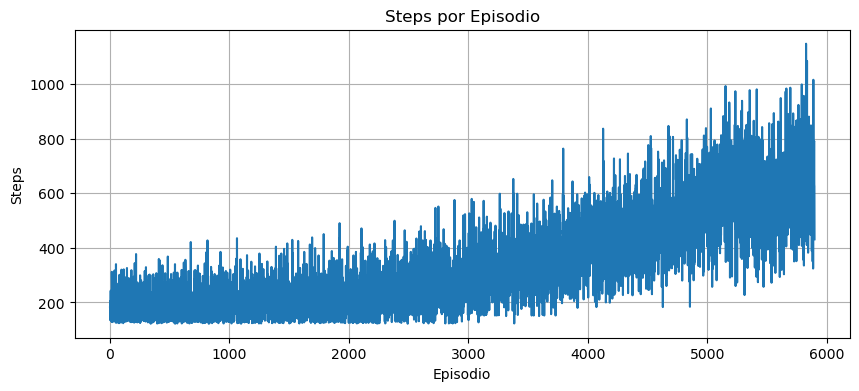

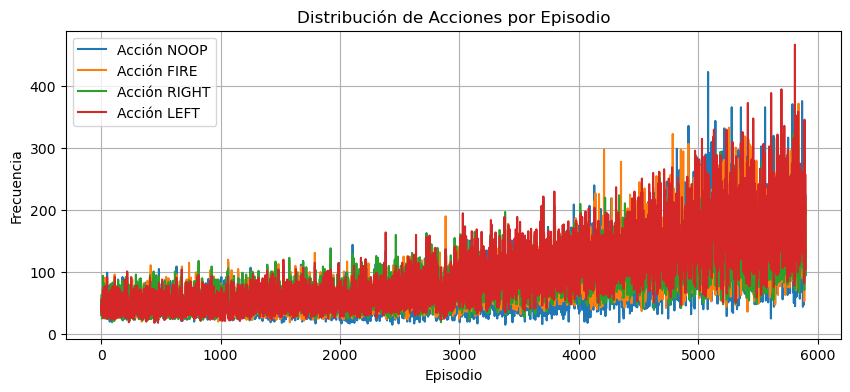

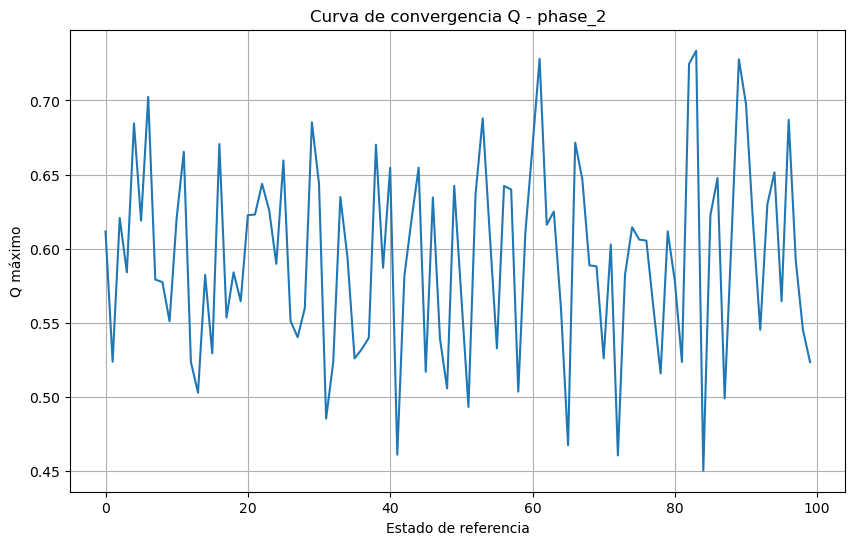

In [ ]:
METRICS_PATH = getMetricFilePath(False, PHASE_2["id"])
evaluate_training_phase_results(pathname=METRICS_PATH, phase_id=PHASE_2["id"], type=DOUBLE_DQN_TYPE)

In [ ]:
video_path = execute_agent_play(ddqn_agent, PHASE_2["id"], DOUBLE_DQN_TYPE, play=False)
Video(video_path, embed=True, width=600)

## 3. Fase 3: Consolidación y estabilidad de la política

- `EPSILON_INI = 0.1`: partimos de una exploración baja, porque el agente ya tiene una base aprendida.
- `EPSILON_MIN = 0.01`: dejamos una pequeña ventana de exploración por si aún puede descubrir mejores acciones.
- `EPSILON_ANNEAL_STEPS = 1.000.000`: el `epsilon` decae lentamente, permitiendo una transición gradual hacia la explotación.

In [ ]:
LOAD_NET_PATH = getGenericDataFilePath(False, PHASE_2["id"])
print(f"LOAD_NET_PATH: {LOAD_NET_PATH}")

PHASE_ID, TOTAL_STEPS, EPISODES, EPSILON_INI, EPSILON_MIN, EPSILON_ANNEAL_STEPS = get_phase_attributes(PHASE_3)
print(f"PHASE_ID: {PHASE_ID}, TOTAL_STEPS: {TOTAL_STEPS}, EPISODES: {EPISODES}, EPSILON_INI: {EPSILON_INI}, EPSILON_MIN: {EPSILON_MIN}, EPSILON_ANNEAL_STEPS: {EPSILON_ANNEAL_STEPS}, LOAD_NET_PATH: {LOAD_NET_PATH}")
ddqn_agent = execute_ddqn_training_phase(PHASE_ID, reference_states, load_net_path=LOAD_NET_PATH, total_steps = TOTAL_STEPS, episodes = EPISODES, epsilon_ini = EPSILON_INI, epsilon_min = EPSILON_MIN, epsilon_anneal_steps = EPSILON_ANNEAL_STEPS)

LOAD_NET_PATH: net_history/ddqn/GenericDDQNAgent-phase_2.dat
PHASE_ID: phase_3, TOTAL_STEPS: 2000000, EPISODES: 10000, EPSILON_INI: 0.1, EPSILON_MIN: 0.01, EPSILON_ANNEAL_STEPS: 1000000, LOAD_NET_PATH: net_history/ddqn/GenericDDQNAgent-phase_2.dat
Parametros del agente:
loadPath: net_history/ddqn/GenericDDQNAgent-phase_2.dat
gamma: 0.995
epsilon_i: 0.1
epsilon_f: 0.01
epsilon_anneal_steps: 1000000
run_name: phase_3


Entrenando:   0%|          | 0/10000 [00:00<?, ?episode/s]



Iniciando entrenamiento phase_3, con los siguientes hiperparametros:

gamma: 0.995, epsilon_i: 0.1, epsilon_f: 0.01, epsilon_anneal_steps: 1000000, max_steps: 2000000




/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
Entrenando:   3%|▎         | 267/10000 [13:06<7:46:43,  2.88s/episode, reward=12.3, epsilon=0.0865, steps=150306]


=== Recompensa actual: 12.28, Epsilon: 0.08647246, Total steps: 150306 ===


Entrenando:   5%|▌         | 508/10000 [26:14<8:14:44,  3.13s/episode, reward=13.8, epsilon=0.073, steps=3e+5]


=== Recompensa actual: 13.8, Epsilon: 0.07297615, Total steps: 300265 ===


Entrenando:   7%|▋         | 749/10000 [39:16<9:20:23,  3.63s/episode, reward=13.3, epsilon=0.0594, steps=450684]


=== Recompensa actual: 13.26, Epsilon: 0.05943844, Total steps: 450684 ===


Entrenando:  10%|▉         | 980/10000 [52:18<10:03:16,  4.01s/episode, reward=15.6, epsilon=0.0459, steps=600635]


=== Recompensa actual: 15.58, Epsilon: 0.04594284999999999, Total steps: 600635 ===


Entrenando:  12%|█▏        | 1189/10000 [1:05:20<9:30:03,  3.88s/episode, reward=16.8, epsilon=0.0325, steps=750347]


=== Recompensa actual: 16.76, Epsilon: 0.032468769999999994, Total steps: 750347 ===


Entrenando:  14%|█▍        | 1381/10000 [1:18:20<9:55:39,  4.15s/episode, reward=17.9, epsilon=0.019, steps=9e+5]


=== Recompensa actual: 17.92, Epsilon: 0.018984699999999993, Total steps: 900170 ===


Entrenando:  16%|█▌        | 1573/10000 [1:31:29<10:10:30,  4.35s/episode, reward=18.4, epsilon=0.01, steps=1050569]


=== Recompensa actual: 18.38, Epsilon: 0.01, Total steps: 1050569 ===


Entrenando:  18%|█▊        | 1762/10000 [1:44:26<9:18:13,  4.07s/episode, reward=18.6, epsilon=0.01, steps=1.2e+6]


=== Recompensa actual: 18.64, Epsilon: 0.01, Total steps: 1200378 ===


Entrenando:  19%|█▉        | 1943/10000 [1:57:23<10:03:07,  4.49s/episode, reward=20.7, epsilon=0.01, steps=1350658]


=== Recompensa actual: 20.66, Epsilon: 0.01, Total steps: 1350658 ===


Entrenando:  21%|██        | 2120/10000 [2:10:24<9:32:38,  4.36s/episode, reward=20.4, epsilon=0.01, steps=1.5e+6]


=== Recompensa actual: 20.36, Epsilon: 0.01, Total steps: 1500159 ===


Entrenando:  23%|██▎       | 2296/10000 [2:23:19<9:04:57,  4.24s/episode, reward=20, epsilon=0.01, steps=1650688]


=== Recompensa actual: 20.0, Epsilon: 0.01, Total steps: 1650688 ===


Entrenando:  25%|██▍       | 2463/10000 [2:36:07<11:36:16,  5.54s/episode, reward=22.8, epsilon=0.01, steps=1.8e+6]


=== Recompensa actual: 22.77, Epsilon: 0.01, Total steps: 1800387 ===


Entrenando:  26%|██▌       | 2624/10000 [2:49:03<10:23:19,  5.07s/episode, reward=23.3, epsilon=0.01, steps=1950694]


=== Recompensa actual: 23.33, Epsilon: 0.01, Total steps: 1950694 ===


Entrenando:  27%|██▋       | 2680/10000 [2:53:17<7:53:18,  3.88s/episode, reward=22, epsilon=0.01, steps=2e+6]


Entrenamiento detenido: se alcanzaron 2000001 pasos.



/content/obligatorio-taller-ia/load_and_evaluate.py:97: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  state_tensor = torch.tensor(state, dtype=torch.float32).unsqueeze(0).to(device)


Datos cargados de metrics/ddqn/metrics_phase_3.npz: [[ 28 144 140 164]
 [198 149 192 223]
 [101  96 129 128]
 ...
 [368 230 227 234]
 [110 377 181 182]
 [236 176 173 212]]


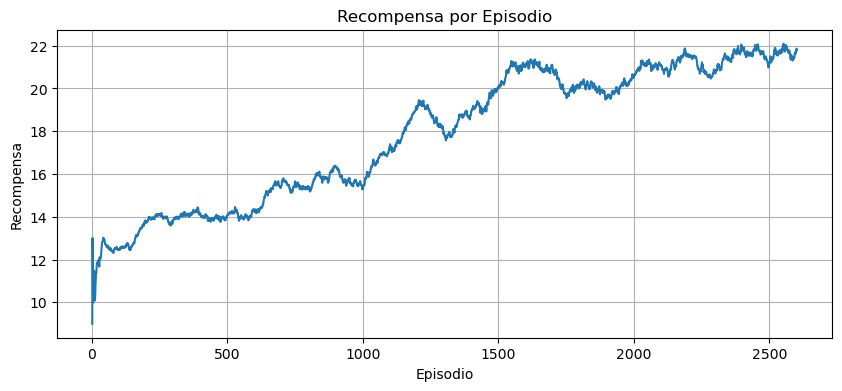

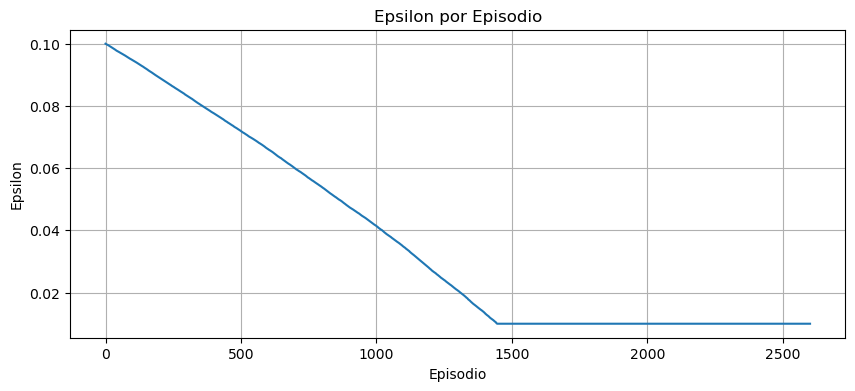

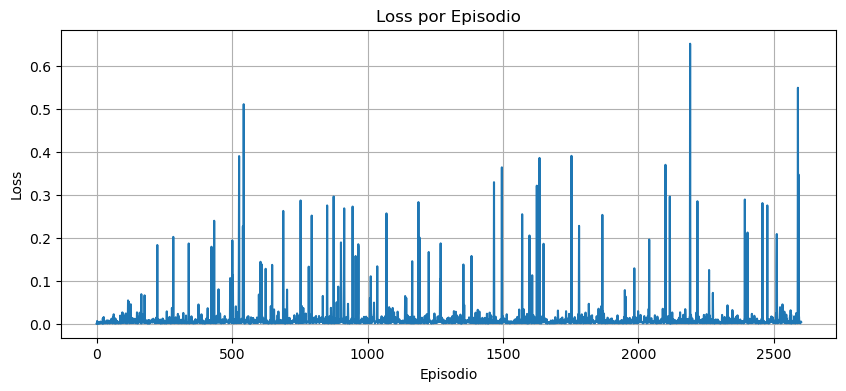

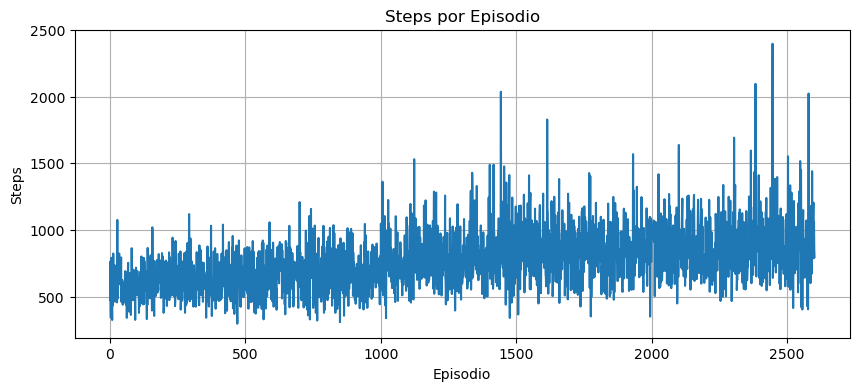

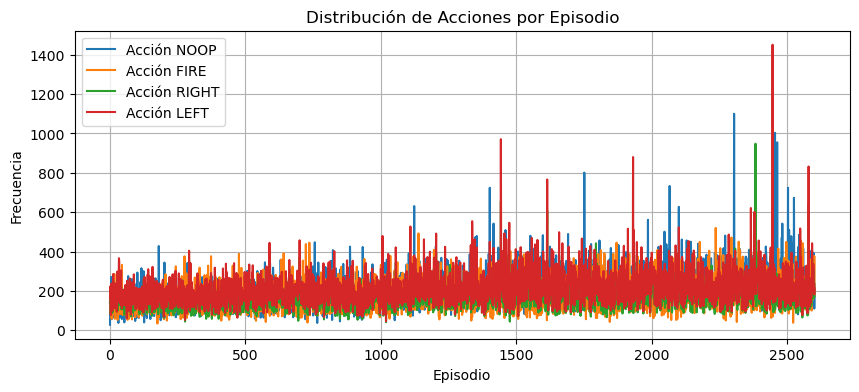

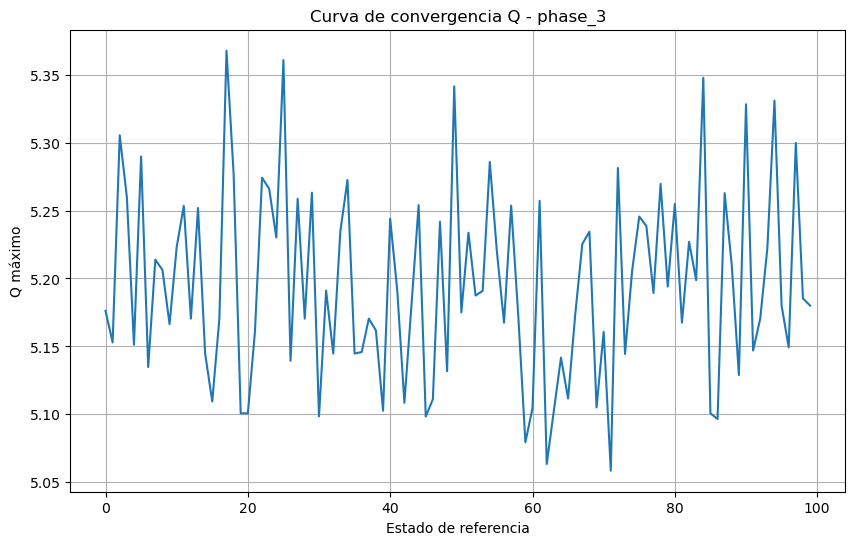

In [ ]:
METRICS_PATH = getMetricFilePath(False, PHASE_3["id"])
evaluate_training_phase_results(pathname=METRICS_PATH, phase_id=PHASE_3["id"], type=DOUBLE_DQN_TYPE)

In [ ]:
video_path = execute_agent_play(ddqn_agent, PHASE_ID, DOUBLE_DQN_TYPE, play=False)
Video(video_path, embed=True, width=600)

In [48]:
LOAD_NET_PATH = getGenericDataFilePath(False, PHASE_3_ID)
PHASE_ID, TOTAL_STEPS, EPISODES, EPSILON_INI, EPSILON_MIN, EPSILON_ANNEAL_STEPS = get_phase_attributes(PHASE_3_2)
print(f"PHASE_ID: {PHASE_ID}, TOTAL_STEPS: {TOTAL_STEPS}, EPISODES: {EPISODES}, EPSILON_INI: {EPSILON_INI}, EPSILON_MIN: {EPSILON_MIN}, EPSILON_ANNEAL_STEPS: {EPSILON_ANNEAL_STEPS}, LOAD_NET_PATH: {LOAD_NET_PATH}")

NameError: name 'PHASE_3_ID' is not defined

In [ ]:
ddqn_agent_phase_3_2 = execute_ddqn_training_phase(PHASE_ID, reference_states, load_net_path=LOAD_NET_PATH, total_steps = TOTAL_STEPS, episodes = EPISODES, epsilon_ini = EPSILON_INI, epsilon_min = EPSILON_MIN, epsilon_anneal_steps = EPSILON_ANNEAL_STEPS)

Parametros del agente:
loadPath: net_history/ddqn/GenericDDQNAgent-phase_3.dat
gamma: 0.995
epsilon_i: 0.5
epsilon_f: 0.01
epsilon_anneal_steps: 1000000
run_name: phase_3_2


/usr/local/lib/python3.11/dist-packages/gymnasium/wrappers/rendering.py:296: UserWarning: WARN: Overwriting existing videos at /content/obligatorio-taller-ia/videos/ddqn/phase_3_2 folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(
Entrenando:   0%|          | 0/10000 [00:00<?, ?episode/s]



Iniciando entrenamiento phase_3_2, con los siguientes hiperparametros:

gamma: 0.995, epsilon_i: 0.5, epsilon_f: 0.01, epsilon_anneal_steps: 1000000, max_steps: 2000000




/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
Entrenando:   4%|▎         | 359/10000 [12:36<5:54:15,  2.20s/episode, reward=8.32, epsilon=0.426, steps=150270]


=== Recompensa actual: 8.32, Epsilon: 0.4263677, Total steps: 150270 ===


Entrenando:   7%|▋         | 667/10000 [25:21<7:32:12,  2.91s/episode, reward=10, epsilon=0.353, steps=300538]


=== Recompensa actual: 10.03, Epsilon: 0.35273637999999996, Total steps: 300538 ===


Entrenando:   9%|▉         | 938/10000 [38:06<7:10:13,  2.85s/episode, reward=12, epsilon=0.279, steps=450539]


=== Recompensa actual: 12.04, Epsilon: 0.27923589, Total steps: 450539 ===


Entrenando:  12%|█▏        | 1180/10000 [50:54<8:18:33,  3.39s/episode, reward=14.1, epsilon=0.206, steps=6e+5]


=== Recompensa actual: 14.07, Epsilon: 0.20585202000000002, Total steps: 600302 ===


Entrenando:  14%|█▍        | 1400/10000 [1:03:37<8:22:09,  3.50s/episode, reward=15.5, epsilon=0.132, steps=750384]


=== Recompensa actual: 15.53, Epsilon: 0.13231183999999996, Total steps: 750384 ===


Entrenando:  16%|█▌        | 1595/10000 [1:16:29<11:07:42,  4.77s/episode, reward=18.7, epsilon=0.0586, steps=900888]


=== Recompensa actual: 18.74, Epsilon: 0.058564879999999986, Total steps: 900888 ===


Entrenando:  18%|█▊        | 1769/10000 [1:29:12<8:10:23,  3.57s/episode, reward=21.8, epsilon=0.01, steps=1050408]


=== Recompensa actual: 21.76, Epsilon: 0.01, Total steps: 1050408 ===


Entrenando:  19%|█▉        | 1932/10000 [1:42:01<10:13:55,  4.57s/episode, reward=22.3, epsilon=0.01, steps=1.2e+6]


=== Recompensa actual: 22.29, Epsilon: 0.01, Total steps: 1200617 ===


Entrenando:  21%|██        | 2089/10000 [1:54:53<10:53:57,  4.96s/episode, reward=23.5, epsilon=0.01, steps=1350891]


=== Recompensa actual: 23.53, Epsilon: 0.01, Total steps: 1350891 ===


Entrenando:  23%|██▎       | 2253/10000 [2:07:33<9:15:01,  4.30s/episode, reward=22.2, epsilon=0.01, steps=1.5e+6] 


=== Recompensa actual: 22.17, Epsilon: 0.01, Total steps: 1500436 ===


Entrenando:  24%|██▍       | 2411/10000 [2:20:18<11:48:35,  5.60s/episode, reward=23.9, epsilon=0.01, steps=1650790]


=== Recompensa actual: 23.93, Epsilon: 0.01, Total steps: 1650790 ===


Entrenando:  26%|██▌       | 2566/10000 [2:33:05<8:39:04,  4.19s/episode, reward=23.4, epsilon=0.01, steps=1.8e+6]


=== Recompensa actual: 23.41, Epsilon: 0.01, Total steps: 1800079 ===


Entrenando:  27%|██▋       | 2723/10000 [2:45:48<9:21:02,  4.63s/episode, reward=23.5, epsilon=0.01, steps=1950055]


=== Recompensa actual: 23.46, Epsilon: 0.01, Total steps: 1950055 ===


Entrenando:  28%|██▊       | 2774/10000 [2:50:01<7:22:54,  3.68s/episode, reward=23.9, epsilon=0.01, steps=2e+6]


Entrenamiento detenido: se alcanzaron 2000001 pasos.



/content/obligatorio-taller-ia/load_and_evaluate.py:98: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  state_tensor = torch.tensor(state, dtype=torch.float32).unsqueeze(0).to(device)


Datos cargados de metrics/ddqn/metrics_phase_3_2.npz: [[112  74 113 116]
 [ 70  86 114 118]
 [ 74  48  67  65]
 ...
 [334 251 192 229]
 [273 268 140 194]
 [166  74  66 126]]


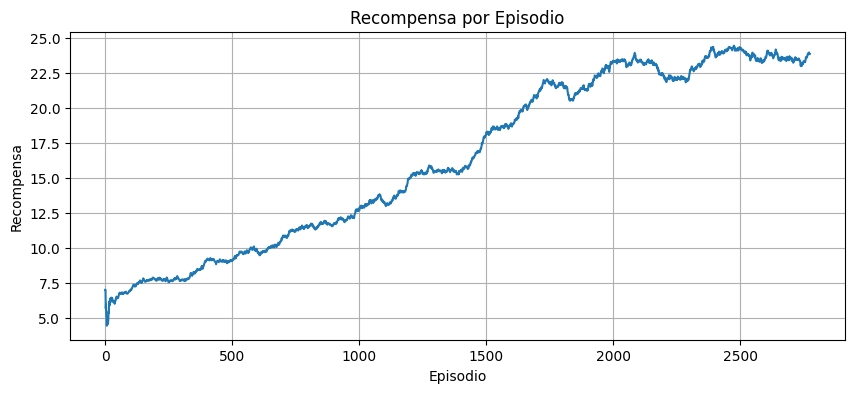

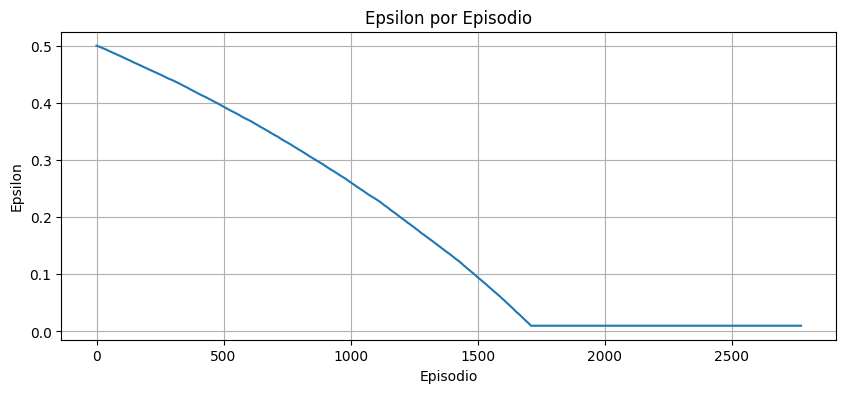

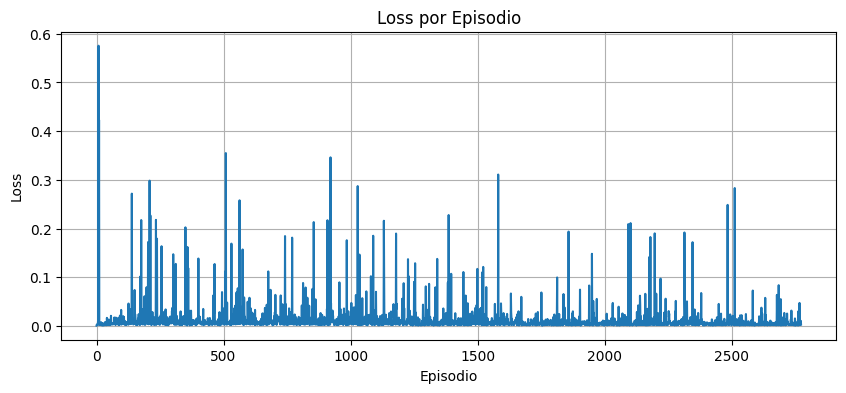

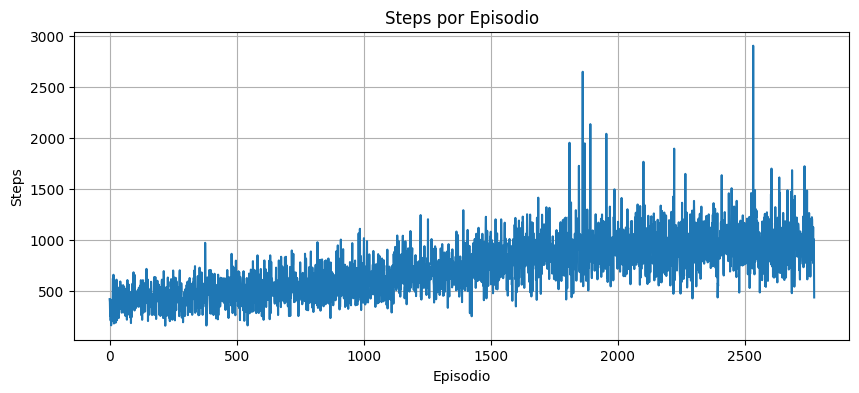

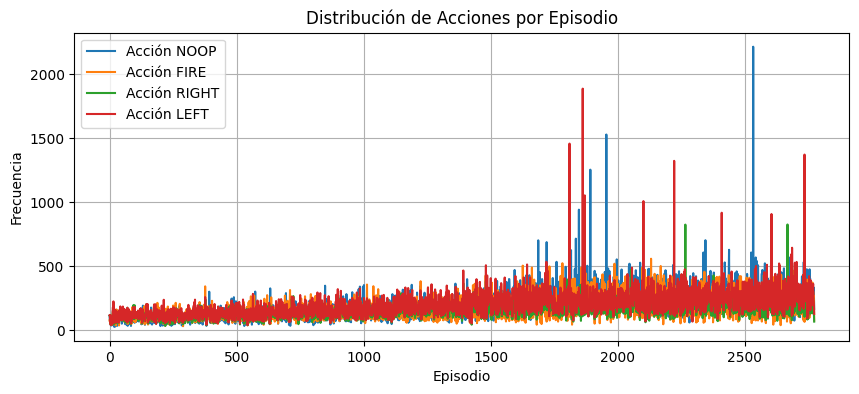

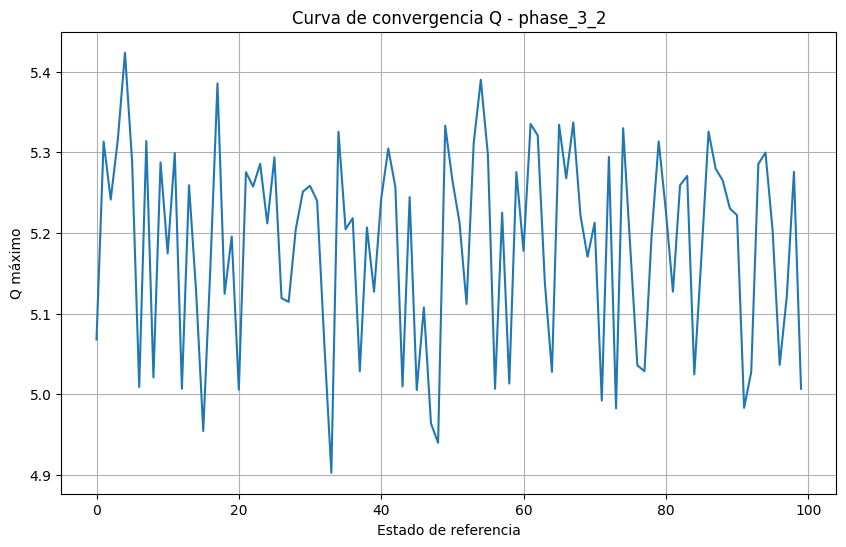

In [ ]:
metrics_path = getMetricFilePath(False, PHASE_3_2_ID)
evaluate_training_phase_results(metrics_path, PHASE_3_2_ID, type=DOUBLE_DQN_TYPE)

In [ ]:
from dqn_agent import DQN_CNN_Model
from double_dqn_agent import DoubleDQNAgent
from load_and_evaluate import create_env, process_state
from constants import DEVICE, BUFFER_SIZE, BATCH_SIZE, EPISODE_BLOCK, LEARNING_RATE, GAMMA



VALIDATION_VIDEO_FOLDER = f'./videos/ddqn/validation/{PHASE_3_2_ID}'
env = create_env(video_folder=VALIDATION_VIDEO_FOLDER)
modelo_a = DQN_CNN_Model(env.observation_space.shape, env.action_space.n).to(DEVICE)
modelo_a.load_state_dict(torch.load('net_history/ddqn/GenericDDQNAgent-phase_3_2.dat'))
modelo_b = DQN_CNN_Model(env.observation_space.shape, env.action_space.n).to(DEVICE)
ddqn_agent = DoubleDQNAgent(env, modelo_a, modelo_b, process_state, BUFFER_SIZE, BATCH_SIZE, learning_rate=LEARNING_RATE, gamma=GAMMA, epsilon_i=0.5 , epsilon_f=0.01, epsilon_anneal_steps=1_000_000, episode_block = EPISODE_BLOCK, device=DEVICE, run_name=PHASE_3_2_ID)

## 4. Entrenamiento largo

Se van a ejecutar **7.000.000** de pasos dividos en 1 fase de **1.000.000.** de pasos y 3 fases una de **2.000.000** de pasos

Mantenemos un valor inicial muy bajo para promover una política estable, pero sin eliminar por completo la posibilidad de explorar si se presenta algo poco frecuente:

- `EPSILON_INI = 0.05`: el agente comienza confiando casi por completo en su política aprendida.
- `EPSILON_MIN = 0.01`: se conserva un margen muy pequeño de exploración para evitar caer en políticas rígidas o locales.
- `EPSILON_ANNEAL_STEPS = 1.000.000`: el descenso es lento y progresivo, asegurando una transición estable hacia la explotación total.


In [ ]:
PHASE_ID, TOTAL_STEPS, EPISODES, EPSILON_INI, EPSILON_MIN, EPSILON_ANNEAL_STEPS = get_phase_attributes(PHASE_4_1)
LOAD_NET_PATH = getGenericDataFilePath(False, PHASE_3_2_ID)
print(f"PHASE_ID: {PHASE_ID}, TOTAL_STEPS: {TOTAL_STEPS}, EPISODES: {EPISODES}, EPSILON_INI: {EPSILON_INI}, EPSILON_MIN: {EPSILON_MIN}, EPSILON_ANNEAL_STEPS: {EPSILON_ANNEAL_STEPS}, LOAD_NET_PATH: {LOAD_NET_PATH}")
VIDEO_FOLDER = f"./videos/dqn_training_{PHASE_ID}"


PHASE_ID: phase_4_1, TOTAL_STEPS: 2000000, EPISODES: 10000, EPSILON_INI: 0.05, EPSILON_MIN: 0.01, EPSILON_ANNEAL_STEPS: 1000000, LOAD_NET_PATH: net_history/ddqn/GenericDDQNAgent-phase_3_2.dat


In [ ]:
ddqn_agent_phase_4_1 = execute_ddqn_training_phase(PHASE_ID, reference_states, load_net_path=LOAD_NET_PATH, total_steps = TOTAL_STEPS, episodes = EPISODES, epsilon_ini = EPSILON_INI, epsilon_min = EPSILON_MIN, epsilon_anneal_steps = EPSILON_ANNEAL_STEPS)

/usr/local/lib/python3.11/dist-packages/gymnasium/wrappers/rendering.py:296: UserWarning: WARN: Overwriting existing videos at /content/obligatorio-taller-ia/videos/ddqn/phase_4_1 folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Parametros del agente:
loadPath: net_history/ddqn/GenericDDQNAgent-phase_3_2.dat
gamma: 0.995
epsilon_i: 0.05
epsilon_f: 0.01
epsilon_anneal_steps: 1000000
run_name: phase_4_1


Entrenando:   0%|          | 0/10000 [00:00<?, ?episode/s]



Iniciando entrenamiento phase_4_1, con los siguientes hiperparametros:

gamma: 0.995, epsilon_i: 0.05, epsilon_f: 0.01, epsilon_anneal_steps: 1000000, max_steps: 2000000




Entrenando:   2%|▏         | 179/10000 [12:57<13:28:03,  4.94s/episode, reward=20.6, epsilon=0.044, steps=150163]


=== Recompensa actual: 20.63, Epsilon: 0.04399348, Total steps: 150163 ===


Entrenando:   3%|▎         | 347/10000 [25:59<12:53:30,  4.81s/episode, reward=22.1, epsilon=0.038, steps=300764]


=== Recompensa actual: 22.07, Epsilon: 0.03796944000000001, Total steps: 300764 ===


Entrenando:   5%|▌         | 513/10000 [38:59<11:20:59,  4.31s/episode, reward=22.8, epsilon=0.032, steps=450196]


=== Recompensa actual: 22.82, Epsilon: 0.031992160000000006, Total steps: 450196 ===


Entrenando:   7%|▋         | 681/10000 [51:56<11:36:19,  4.48s/episode, reward=22.4, epsilon=0.026, steps=6e+5]


=== Recompensa actual: 22.41, Epsilon: 0.0259966, Total steps: 600085 ===


Entrenando:   8%|▊         | 846/10000 [1:05:07<10:23:52,  4.09s/episode, reward=21.9, epsilon=0.02, steps=750001]


=== Recompensa actual: 21.95, Epsilon: 0.01999996, Total steps: 750001 ===


Entrenando:  10%|█         | 1004/10000 [1:18:25<16:37:04,  6.65s/episode, reward=22.7, epsilon=0.0139, steps=901543]


=== Recompensa actual: 22.71, Epsilon: 0.013938280000000004, Total steps: 901543 ===


Entrenando:  12%|█▏        | 1155/10000 [1:31:23<17:09:42,  6.98s/episode, reward=24.5, epsilon=0.01, steps=1050536]


=== Recompensa actual: 24.49, Epsilon: 0.01, Total steps: 1050536 ===


Entrenando:  13%|█▎        | 1311/10000 [1:44:26<11:54:40,  4.94s/episode, reward=23.5, epsilon=0.01, steps=1.2e+6]


=== Recompensa actual: 23.47, Epsilon: 0.01, Total steps: 1200908 ===


Entrenando:  15%|█▍        | 1460/10000 [1:57:27<13:19:33,  5.62s/episode, reward=24.6, epsilon=0.01, steps=1350181]


=== Recompensa actual: 24.62, Epsilon: 0.01, Total steps: 1350181 ===


Entrenando:  16%|█▌        | 1610/10000 [2:10:26<13:38:38,  5.85s/episode, reward=25.2, epsilon=0.01, steps=1.5e+6]


=== Recompensa actual: 25.23, Epsilon: 0.01, Total steps: 1500901 ===


Entrenando:  18%|█▊        | 1759/10000 [2:23:22<13:29:38,  5.89s/episode, reward=25.5, epsilon=0.01, steps=1650545]


=== Recompensa actual: 25.49, Epsilon: 0.01, Total steps: 1650545 ===


Entrenando:  19%|█▉        | 1914/10000 [2:36:23<9:53:27,  4.40s/episode, reward=24.7, epsilon=0.01, steps=1.8e+6] 


=== Recompensa actual: 24.72, Epsilon: 0.01, Total steps: 1800588 ===


Entrenando:  21%|██        | 2071/10000 [2:49:26<9:37:23,  4.37s/episode, reward=23.9, epsilon=0.01, steps=1950557] 


=== Recompensa actual: 23.91, Epsilon: 0.01, Total steps: 1950557 ===


Entrenando:  21%|██        | 2119/10000 [2:53:42<10:46:04,  4.92s/episode, reward=24.3, epsilon=0.01, steps=2e+6]


Entrenamiento detenido: se alcanzaron 2000001 pasos.


Datos cargados de metrics/ddqn/metrics_phase_4_1.npz: [[159 210 110 163]
 [164 248 107 128]
 [221 195 123 183]
 ...
 [303 247 253 279]
 [168 277 408 400]
 [206 127 276 388]]


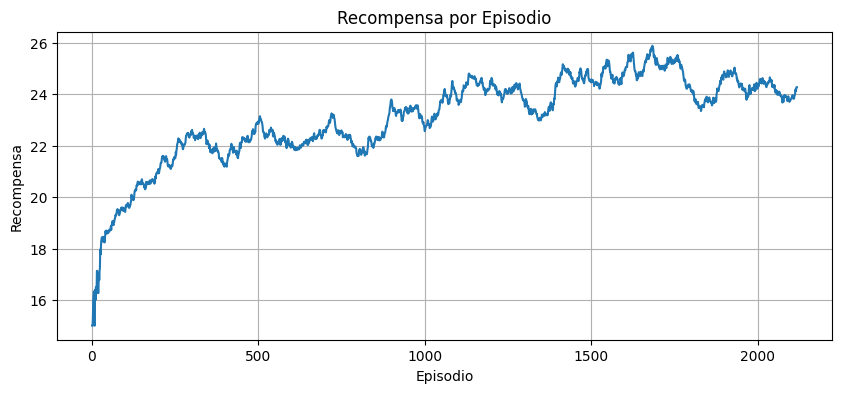

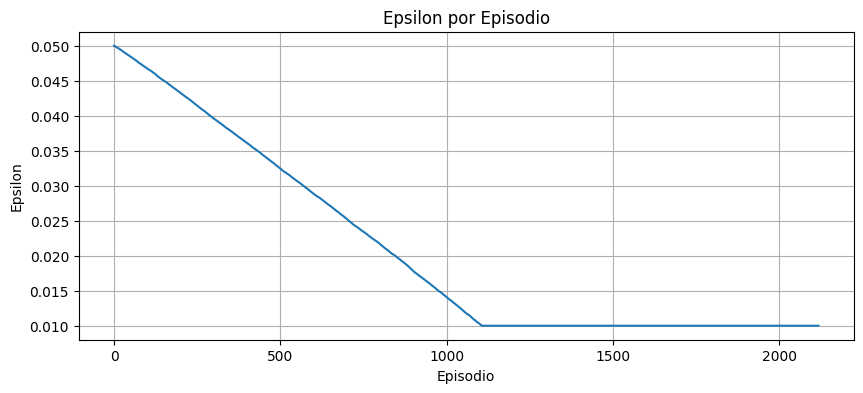

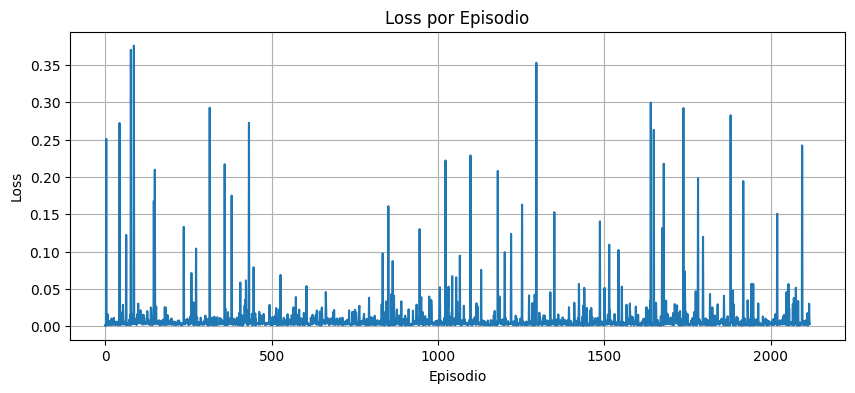

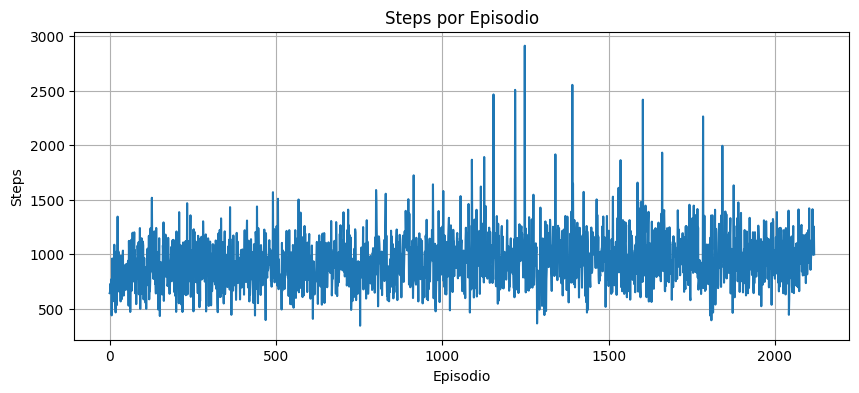

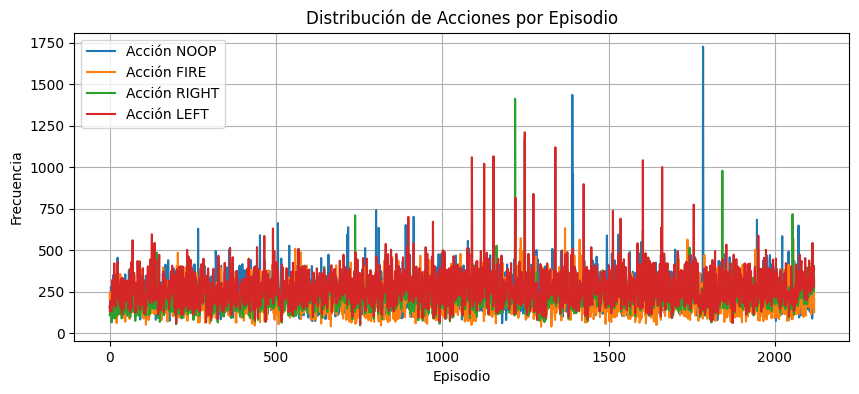

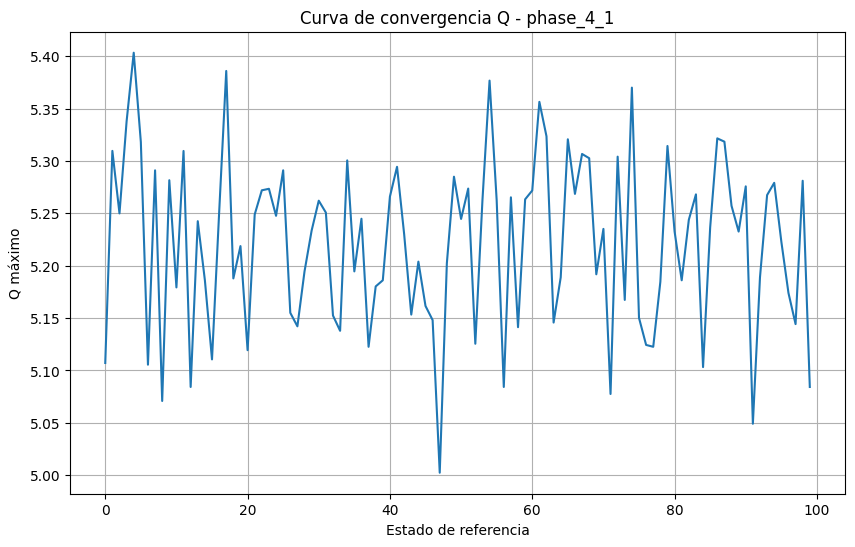

In [ ]:
metrics_path = getMetricFilePath(False, PHASE_4_1_ID)
evaluate_training_phase_results(metrics_path, PHASE_4_1_ID, type=DOUBLE_DQN_TYPE)

In [ ]:
video_path = execute_agent_play(ddqn_agent_phase_4_1, PHASE_4_1_ID, DOUBLE_DQN_TYPE)
Video(video_path, embed=True, width=600)

Ejecutando el agente ddqn en modo evaluación...
Recompensa total del episodio 0: 40.0
Recompensa total promedio: 40.0


In [ ]:
LOAD_NET_PATH = getGenericDataFilePath(False, PHASE_4_1_ID)
PHASE_ID, TOTAL_STEPS, EPISODES, EPSILON_INI, EPSILON_MIN, EPSILON_ANNEAL_STEPS = get_phase_attributes(PHASE_4_2)
print(f"PHASE_ID: {PHASE_ID}, TOTAL_STEPS: {TOTAL_STEPS}, EPISODES: {EPISODES}, EPSILON_INI: {EPSILON_INI}, EPSILON_MIN: {EPSILON_MIN}, EPSILON_ANNEAL_STEPS: {EPSILON_ANNEAL_STEPS}, LOAD_NET_PATH: {LOAD_NET_PATH}")

PHASE_ID: phase_4_2, TOTAL_STEPS: 2000000, EPISODES: 10000, EPSILON_INI: 0.01, EPSILON_MIN: 0.01, EPSILON_ANNEAL_STEPS: 2000000, LOAD_NET_PATH: net_history/ddqn/GenericDDQNAgent-phase_4_1.dat


In [ ]:
ddqn_agent_phase_4_2 = execute_ddqn_training_phase(PHASE_ID, reference_states, load_net_path=LOAD_NET_PATH, total_steps = TOTAL_STEPS, episodes = EPISODES, epsilon_ini = EPSILON_INI, epsilon_min = EPSILON_MIN, epsilon_anneal_steps = EPSILON_ANNEAL_STEPS)

Parametros del agente:
loadPath: net_history/ddqn/GenericDDQNAgent-phase_4_1.dat
gamma: 0.995
epsilon_i: 0.01
epsilon_f: 0.01
epsilon_anneal_steps: 2000000
run_name: phase_4_2


Entrenando:   0%|          | 0/10000 [00:00<?, ?episode/s]



Iniciando entrenamiento phase_4_2, con los siguientes hiperparametros:

gamma: 0.995, epsilon_i: 0.01, epsilon_f: 0.01, epsilon_anneal_steps: 2000000, max_steps: 2000000




/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
Entrenando:   2%|▏         | 157/10000 [13:43<12:30:37,  4.58s/episode, reward=23.8, epsilon=0.01, steps=150659]


=== Recompensa actual: 23.8, Epsilon: 0.01, Total steps: 150659 ===


Entrenando:   3%|▎         | 313/10000 [27:08<14:17:59,  5.31s/episode, reward=24.8, epsilon=0.01, steps=300658]


=== Recompensa actual: 24.84, Epsilon: 0.01, Total steps: 300658 ===


Entrenando:   5%|▍         | 462/10000 [40:45<14:59:37,  5.66s/episode, reward=25.4, epsilon=0.01, steps=450715]


=== Recompensa actual: 25.41, Epsilon: 0.01, Total steps: 450715 ===


Entrenando:   6%|▌         | 609/10000 [54:24<13:11:35,  5.06s/episode, reward=25.6, epsilon=0.01, steps=6e+5]


=== Recompensa actual: 25.55, Epsilon: 0.01, Total steps: 600155 ===


Entrenando:   8%|▊         | 756/10000 [1:08:01<15:00:33,  5.85s/episode, reward=25.9, epsilon=0.01, steps=750983]


=== Recompensa actual: 25.87, Epsilon: 0.01, Total steps: 750983 ===


Entrenando:   9%|▉         | 905/10000 [1:21:23<15:05:19,  5.97s/episode, reward=24.8, epsilon=0.01, steps=9e+5]


=== Recompensa actual: 24.81, Epsilon: 0.01, Total steps: 900118 ===


Entrenando:  11%|█         | 1051/10000 [1:35:05<14:06:55,  5.68s/episode, reward=26.4, epsilon=0.01, steps=1050513]


=== Recompensa actual: 26.43, Epsilon: 0.01, Total steps: 1050513 ===


Entrenando:  12%|█▏        | 1202/10000 [1:48:43<16:01:10,  6.55s/episode, reward=24.6, epsilon=0.01, steps=1.2e+6]


=== Recompensa actual: 24.63, Epsilon: 0.01, Total steps: 1200936 ===


Entrenando:  14%|█▎        | 1354/10000 [2:02:14<11:44:21,  4.89s/episode, reward=24.6, epsilon=0.01, steps=1350298]


=== Recompensa actual: 24.56, Epsilon: 0.01, Total steps: 1350298 ===


Entrenando:  15%|█▌        | 1502/10000 [2:15:30<12:55:49,  5.48s/episode, reward=25.6, epsilon=0.01, steps=1.5e+6]


=== Recompensa actual: 25.65, Epsilon: 0.01, Total steps: 1500105 ===


Entrenando:  17%|█▋        | 1653/10000 [2:29:21<13:01:20,  5.62s/episode, reward=24.5, epsilon=0.01, steps=1650211]


=== Recompensa actual: 24.52, Epsilon: 0.01, Total steps: 1650211 ===


Entrenando:  18%|█▊        | 1797/10000 [2:42:55<12:17:44,  5.40s/episode, reward=26.8, epsilon=0.01, steps=1.8e+6]


=== Recompensa actual: 26.76, Epsilon: 0.01, Total steps: 1800352 ===


Entrenando:  20%|█▉        | 1950/10000 [2:56:29<12:54:46,  5.77s/episode, reward=24.5, epsilon=0.01, steps=1950503]


=== Recompensa actual: 24.52, Epsilon: 0.01, Total steps: 1950503 ===


Entrenando:  20%|██        | 2000/10000 [3:00:56<12:03:45,  5.43s/episode, reward=24.4, epsilon=0.01, steps=2e+6]


Entrenamiento detenido: se alcanzaron 2000001 pasos.



/content/obligatorio-taller-ia/load_and_evaluate.py:98: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  state_tensor = torch.tensor(state, dtype=torch.float32).unsqueeze(0).to(device)


Datos cargados de metrics/ddqn/metrics_phase_4_2.npz: [[110 520 184 234]
 [ 44 461 180 214]
 [158 312 202 258]
 ...
 [227 114 209 222]
 [122 170 239 292]
 [104 181 287 316]]


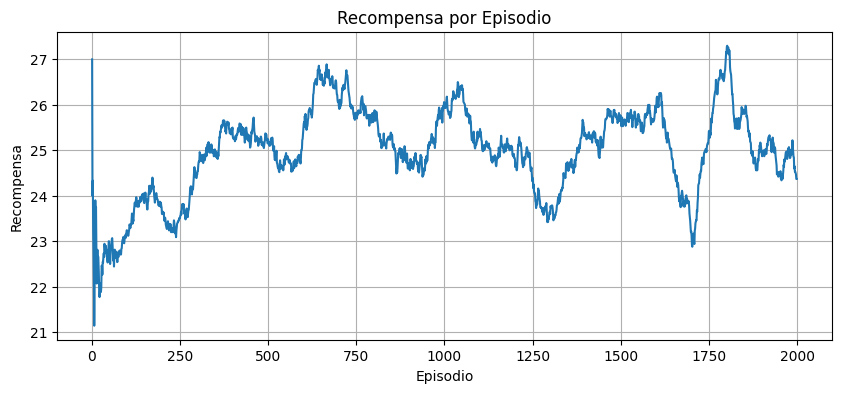

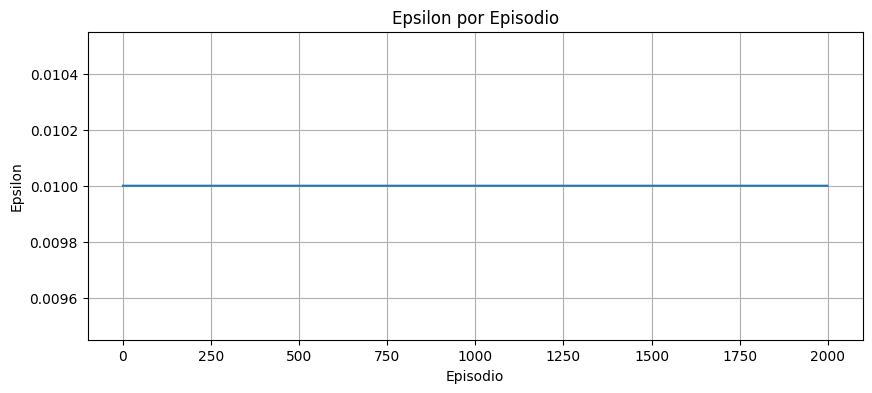

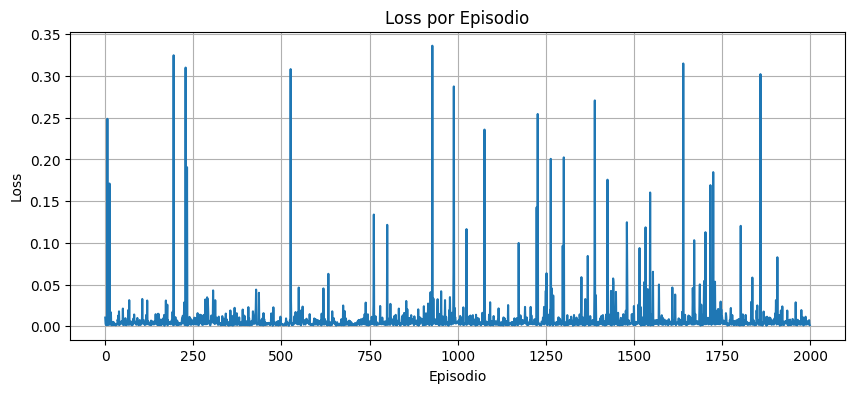

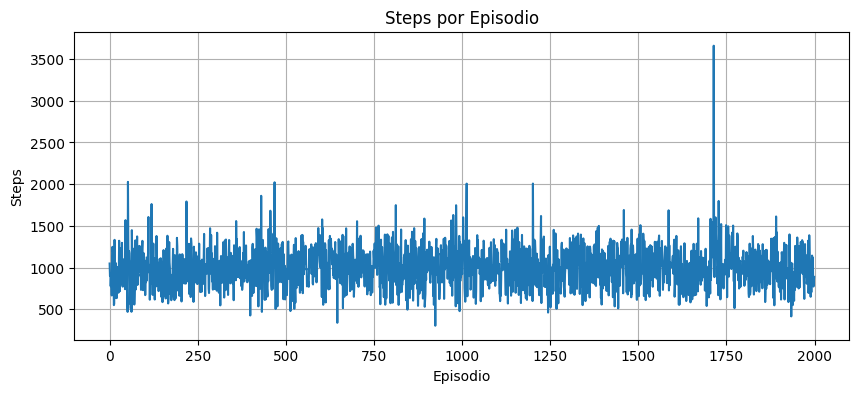

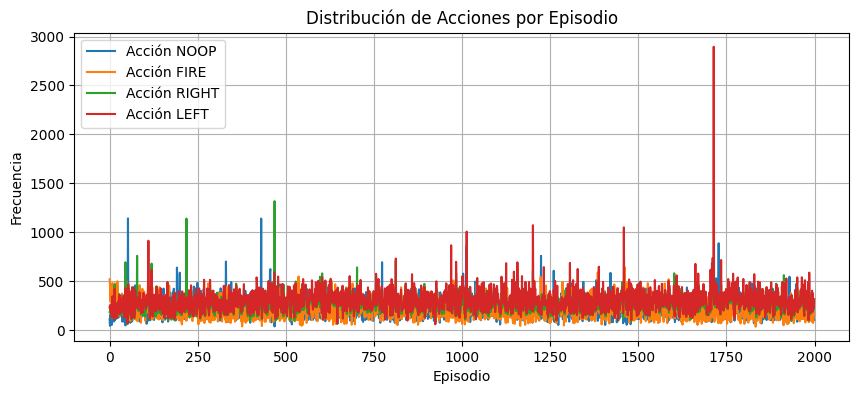

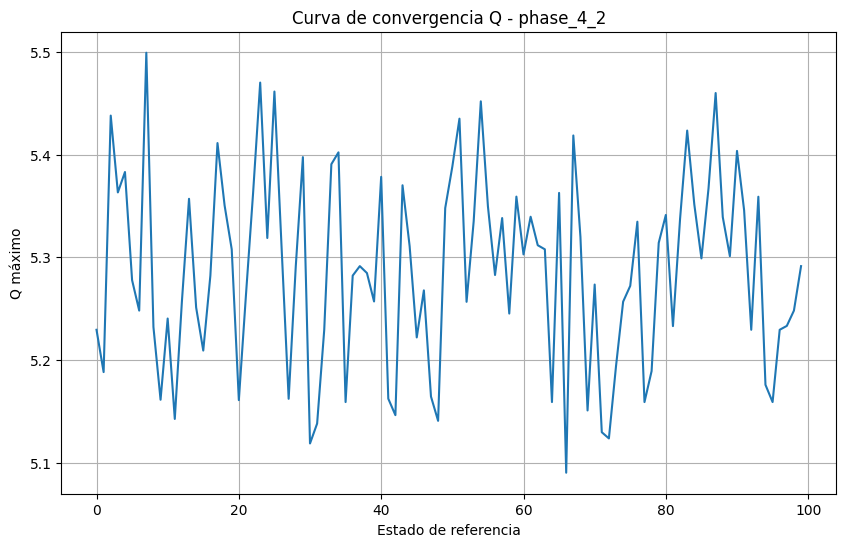

In [ ]:
metrics_path = getMetricFilePath(False, PHASE_4_2_ID)
evaluate_training_phase_results(metrics_path, PHASE_4_2_ID, type=DOUBLE_DQN_TYPE)

In [ ]:
video_path = execute_agent_play(ddqn_agent_phase_4_2, PHASE_4_2_ID, DOUBLE_DQN_TYPE)
Video(video_path, embed=True, width=600)

Ejecutando el agente ddqn en modo evaluación...
Recompensa total del episodio 0: 36.0
Recompensa total promedio: 36.0


In [25]:
LOAD_NET_PATH = getGenericDataFilePath(False, PHASE_4_2_ID)
PHASE_ID, TOTAL_STEPS, EPISODES, EPSILON_INI, EPSILON_MIN, EPSILON_ANNEAL_STEPS = get_phase_attributes(PHASE_4_3)
print(f"PHASE_ID: {PHASE_ID}, TOTAL_STEPS: {TOTAL_STEPS}, EPISODES: {EPISODES}, EPSILON_INI: {EPSILON_INI}, EPSILON_MIN: {EPSILON_MIN}, EPSILON_ANNEAL_STEPS: {EPSILON_ANNEAL_STEPS}, LOAD_NET_PATH: {LOAD_NET_PATH}")


PHASE_ID: phase_4_3, TOTAL_STEPS: 2000000, EPISODES: 10000, EPSILON_INI: 0.01, EPSILON_MIN: 0.01, EPSILON_ANNEAL_STEPS: 2000000, LOAD_NET_PATH: net_history/ddqn/GenericDDQNAgent-phase_4_2.dat


In [ ]:
ddqn_agent_phase_4_3 = execute_ddqn_training_phase(PHASE_ID, reference_states, load_net_path=LOAD_NET_PATH, total_steps = TOTAL_STEPS, episodes = EPISODES, epsilon_ini = EPSILON_INI, epsilon_min = EPSILON_MIN, epsilon_anneal_steps = EPSILON_ANNEAL_STEPS)

Parametros del agente:
loadPath: net_history/ddqn/GenericDDQNAgent-phase_4_2.dat
gamma: 0.995
epsilon_i: 0.01
epsilon_f: 0.01
epsilon_anneal_steps: 2000000
run_name: phase_4_3


Entrenando:   0%|          | 0/10000 [00:00<?, ?episode/s]



Iniciando entrenamiento phase_4_3, con los siguientes hiperparametros:

gamma: 0.995, epsilon_i: 0.01, epsilon_f: 0.01, epsilon_anneal_steps: 2000000, max_steps: 2000000




/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
Entrenando:   0%|          | 1/10000 [00:10<27:51:11, 10.03s/episode, reward=nan, epsilon=0.01, steps=1326]

In [ ]:
metrics_path = getMetricFilePath(False, PHASE_4_3_ID)
evaluate_training_phase_results(metrics_path, PHASE_4_3_ID)

In [ ]:
video_path = execute_agent_play(ddqn_agent, PHASE_4_3_ID, DOUBLE_DQN_TYPE)
Video(video_path, embed=True, width=600)

# Conclusion DDQN

In [20]:
phase_ids = [PHASE_INITIAL_ID, PHASE_2_ID, PHASE_3_ID, PHASE_3_2_ID, PHASE_4_1_ID, PHASE_4_2_ID]
metrics_path = getMetricFilePathList(False, phase_ids)
print(metrics_path)

['initial_run', 'phase_2', 'phase_3', 'phase_3_2', 'phase_4_1', 'phase_4_2']
['metrics/ddqn/metrics_initial_run.npz', 'metrics/ddqn/metrics_phase_2.npz', 'metrics/ddqn/metrics_phase_3.npz', 'metrics/ddqn/metrics_phase_3_2.npz', 'metrics/ddqn/metrics_phase_4_1.npz', 'metrics/ddqn/metrics_phase_4_2.npz']


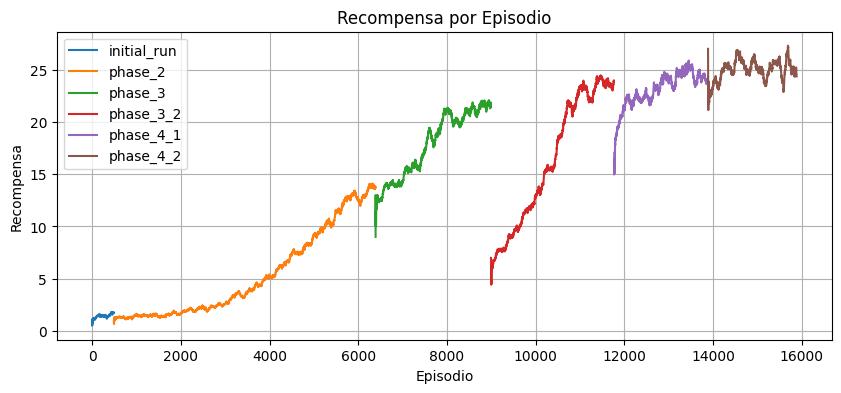

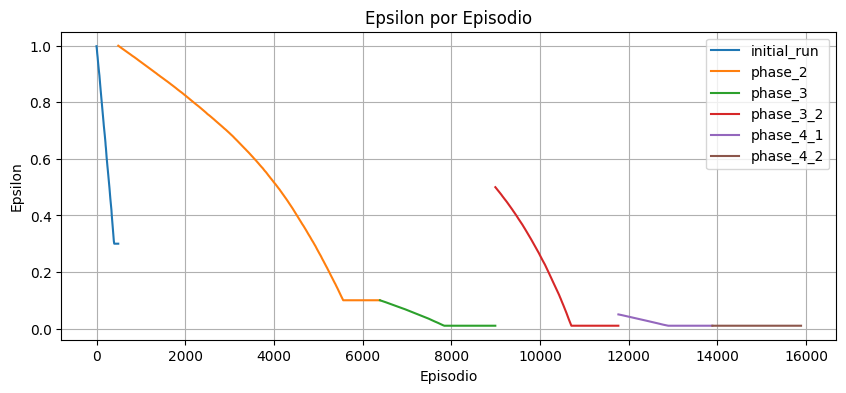

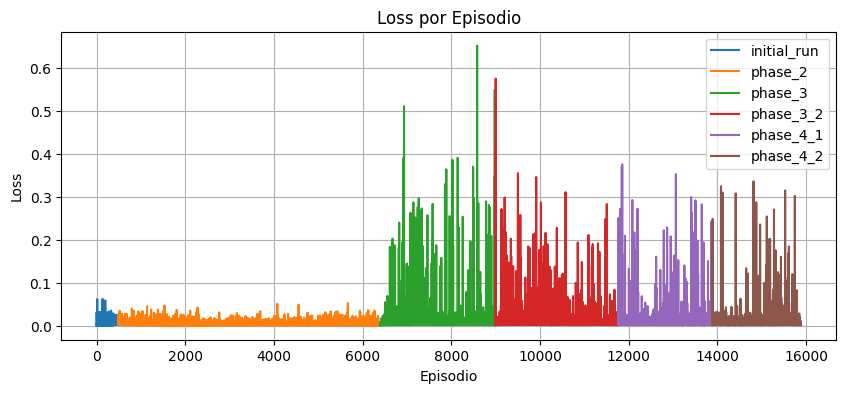

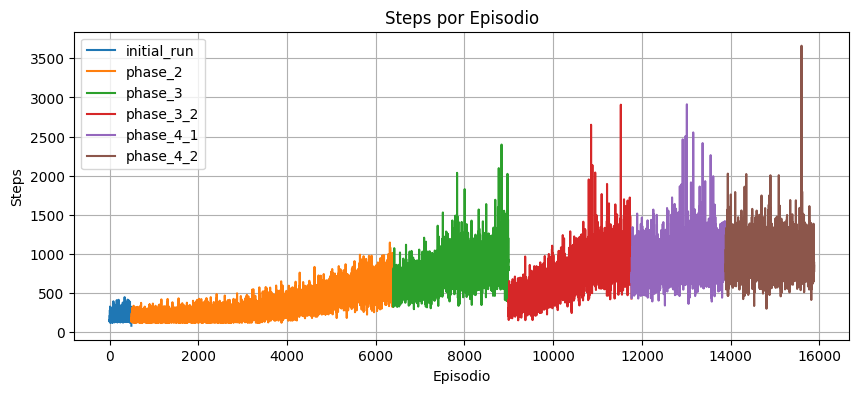

In [21]:
graph_metrics_accumulated(metrics_path, phase_ids)

# Experimentación
Aquí con libertad total, pueden probar diferentes arquitecturas de red, diferentes hiperparámetros, diferentes técnicas de exploración, etc.
...

In [ ]:
def getReplayMemoryPhaseId(phase_id):
    return f"rm_{phase_id}"

In [ ]:
'''
PHASE_ID = "phase_3"
PREV_PHASE_ID = getReplayMemoryPhaseId(PHASE_3_ID)
LOAD_NET_PATH = getGenericDataFilePath(True, PREV_PHASE_ID)
print(f"net a cargar con PHASE_ID: {PREV_PHASE_ID}")
PHASE_ID, TOTAL_STEPS, EPISODES, EPSILON_INI, EPSILON_MIN, EPSILON_ANNEAL_STEPS = get_phase_attributes(PHASE_4_1)
print(f"PHASE_ID: {PHASE_ID}, TOTAL_STEPS: {TOTAL_STEPS}, EPISODES: {EPISODES}, EPSILON_INI: {EPSILON_INI}, EPSILON_MIN: {EPSILON_MIN}, EPSILON_ANNEAL_STEPS: {EPSILON_ANNEAL_STEPS}, LOAD_NET_PATH: {LOAD_NET_PATH}")
dqn_agent = execute_dqn_training_phase(PHASE_ID, reference_states, loadPath=LOAD_NET_PATH, total_steps = TOTAL_STEPS, episodes = EPISODES, epsilon_i = EPSILON_INI, epsilon_f = EPSILON_MIN, epsilon_anneal_steps = EPSILON_ANNEAL_STEPS, use_prioritized_replay=True)
'''

'\nPHASE_ID = "phase_3"\nPREV_PHASE_ID = PHASE_3["id"]\nLOAD_NET_PATH = getGenericDataFilePath(True, PREV_PHASE_ID)\nprint(f"net a cargar con PHASE_ID: {PHASE_ID}")\nPHASE_ID, TOTAL_STEPS, EPISODES, EPSILON_INI, EPSILON_MIN, EPSILON_ANNEAL_STEPS = get_phase_attributes(PHASE_4_1)\nprint(f"PHASE_ID: {PHASE_ID}, TOTAL_STEPS: {TOTAL_STEPS}, EPISODES: {EPISODES}, EPSILON_INI: {EPSILON_INI}, EPSILON_MIN: {EPSILON_MIN}, EPSILON_ANNEAL_STEPS: {EPSILON_ANNEAL_STEPS}, LOAD_NET_PATH: {LOAD_NET_PATH}")\ndqn_agent = execute_dqn_training_phase(PHASE_ID, reference_states, loadPath=LOAD_NET_PATH, total_steps = TOTAL_STEPS, episodes = EPISODES, epsilon_i = EPSILON_INI, epsilon_f = EPSILON_MIN, epsilon_anneal_steps = EPSILON_ANNEAL_STEPS, use_prioritized_replay=True)\n'

In [ ]:
PHASE_ID, TOTAL_STEPS, EPISODES, EPSILON_INI, EPSILON_MIN, EPSILON_ANNEAL_STEPS = get_phase_attributes(PHASE_INITIAL)
PHASE_ID = getReplayMemoryPhaseId(PHASE_INITIAL_ID)
print(f"PHASE_ID: {PHASE_ID}, TOTAL_STEPS: {TOTAL_STEPS}, EPISODES: {EPISODES}, EPSILON_INI: {EPSILON_INI}, EPSILON_MIN: {EPSILON_MIN}, EPSILON_ANNEAL_STEPS: {EPSILON_ANNEAL_STEPS}")

PHASE_ID: initial_run, TOTAL_STEPS: 100000, EPISODES: 10000, EPSILON_INI: 1, EPSILON_MIN: 0.3, EPSILON_ANNEAL_STEPS: 80000


In [ ]:
dqn_agent = execute_dqn_training_phase(PHASE_ID, reference_states, total_steps = TOTAL_STEPS, episodes = EPISODES, epsilon_i = EPSILON_INI, epsilon_f = EPSILON_MIN, epsilon_anneal_steps = EPSILON_ANNEAL_STEPS, use_prioritized_replay=True)

Parametros del agente:
loadPath: None
buffer_size: 50000
batch_size: 32
learning_rate: 1e-05
gamma: 0.995
epsilon_i: 1
epsilon_f: 0.3
epsilon_anneal_steps: 80000
episode_block: 100
run_name: initial_run
Use prioritized memory: True


c:\Users\Octav\anaconda3\envs\obl_taller_ia\Lib\site-packages\gymnasium\wrappers\rendering.py:283: UserWarning: WARN: Overwriting existing videos at c:\Users\Octav\postgrado\taller ia\OBL solo octa\obligatorio-taller-ia\videos\dqn\initial_run folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(
Entrenando:   0%|          | 0/10000 [00:00<?, ?episode/s]



Iniciando entrenamiento initial_run, con los siguientes hiperparametros:

gamma: 0.995, epsilon_i: 1, epsilon_f: 0.3, epsilon_anneal_steps: 80000, max_steps: 100000




c:\Users\Octav\anaconda3\envs\obl_taller_ia\Lib\site-packages\numpy\_core\fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Octav\anaconda3\envs\obl_taller_ia\Lib\site-packages\numpy\_core\_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
Entrenando:   5%|▌         | 518/10000 [14:49<4:31:24,  1.72s/episode, reward=1.33, epsilon=0.3, steps=1e+5]   


Entrenamiento detenido: se alcanzaron 100001 pasos.



c:\Users\Octav\postgrado\taller ia\OBL solo octa\obligatorio-taller-ia\load_and_evaluate.py:98: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  state_tensor = torch.tensor(state, dtype=torch.float32).unsqueeze(0).to(device)


In [ ]:
PHASE_ID = getReplayMemoryPhaseId(PHASE_INITIAL_ID)
video_path = execute_agent_play(dqn_agent, PHASE_ID)
Video(video_path, embed=True, width=600)

c:\Users\Octav\anaconda3\envs\obl_taller_ia\Lib\site-packages\gymnasium\wrappers\rendering.py:283: UserWarning: WARN: Overwriting existing videos at c:\Users\Octav\postgrado\taller ia\OBL solo octa\obligatorio-taller-ia\videos\dqn\validation\initial_run folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Recompensa total del episodio 0: 0.0
Recompensa total promedio: 0.0


Datos cargados de metrics/dqn/metrics_initial_run.npz: [[47 30 31 35]
 [36 34 28 33]
 [38 49 45 42]
 ...
 [ 9 45 46 26]
 [50 31 33 19]
 [24 46 26 22]]


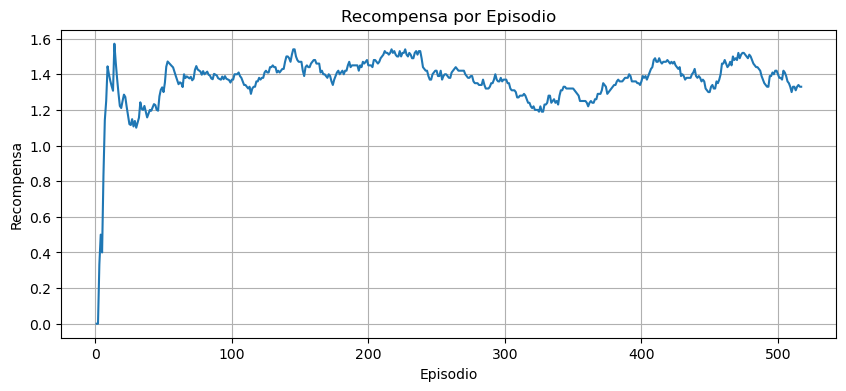

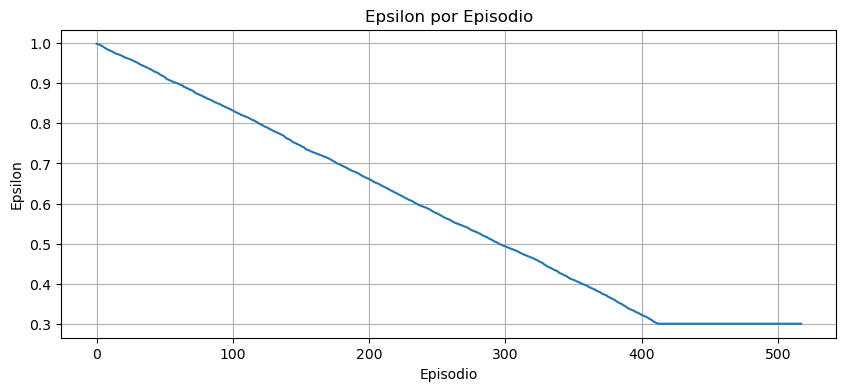

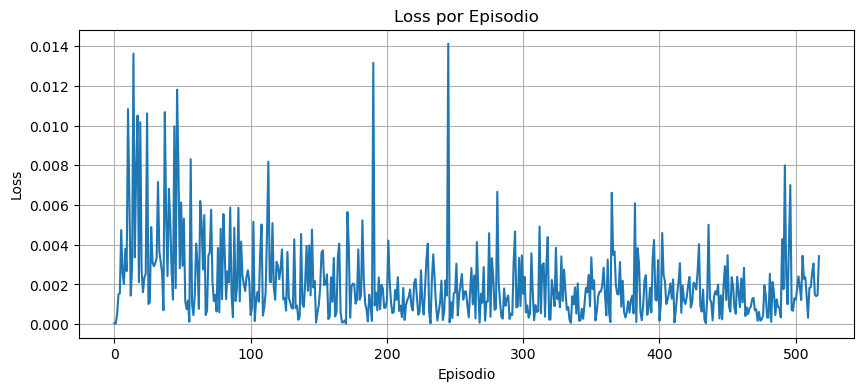

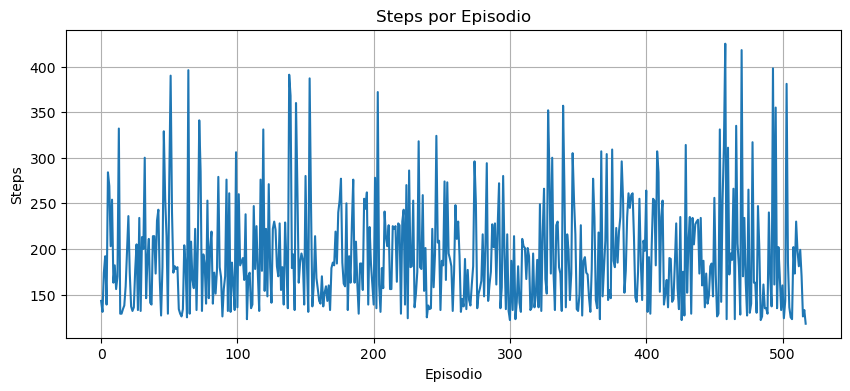

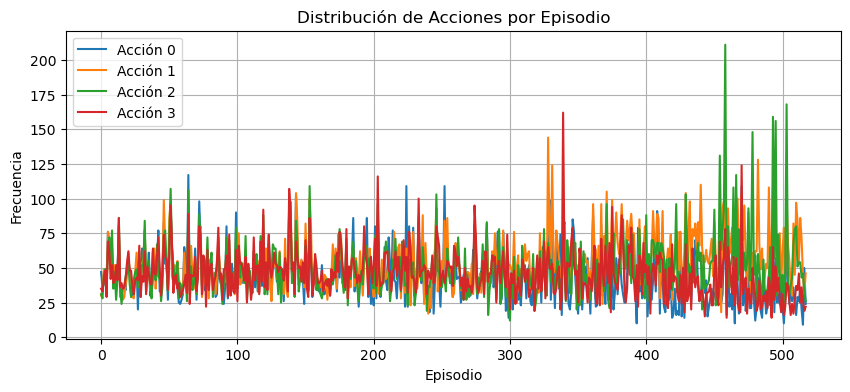

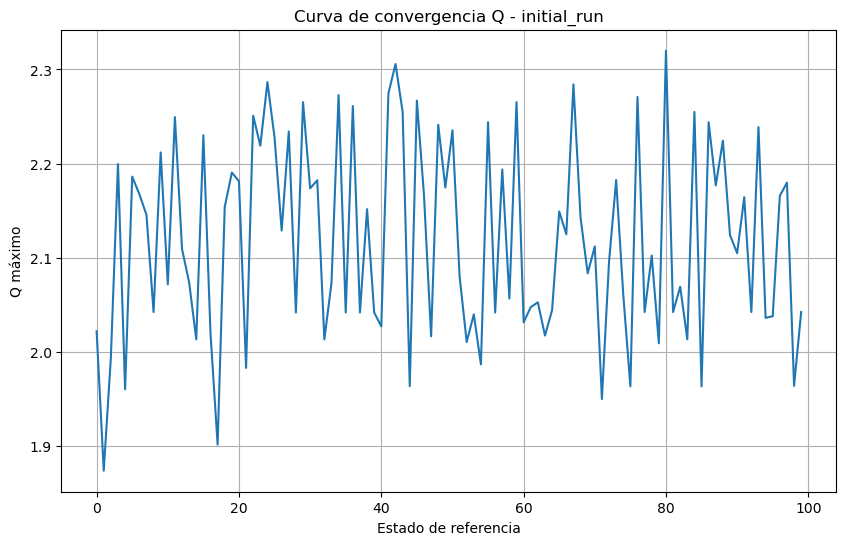

In [ ]:
METRICS_PATH = getMetricFilePath(True, PHASE_ID)
evaluate_training_phase_results(pathname=METRICS_PATH, phase_id=PHASE_ID)

In [ ]:
PHASE_ID, TOTAL_STEPS, EPISODES, EPSILON_INI, EPSILON_MIN, EPSILON_ANNEAL_STEPS = get_phase_attributes(PHASE_2)
print(f"PHASE_ID: {PHASE_ID}, TOTAL_STEPS: {TOTAL_STEPS}, EPISODES: {EPISODES}, EPSILON_INI: {EPSILON_INI}, EPSILON_MIN: {EPSILON_MIN}, EPSILON_ANNEAL_STEPS: {EPSILON_ANNEAL_STEPS}")

PHASE_ID: phase_2, TOTAL_STEPS: 2000000, EPISODES: 10000, EPSILON_INI: 1, EPSILON_MIN: 0.1, EPSILON_ANNEAL_STEPS: 1500000


In [ ]:
dqn_agent = execute_dqn_training_phase(PHASE_ID, reference_states, total_steps = TOTAL_STEPS, episodes = EPISODES, epsilon_i = EPSILON_INI, epsilon_f = EPSILON_MIN, epsilon_anneal_steps = EPSILON_ANNEAL_STEPS, use_prioritized_replay=True)

Parametros del agente:
loadPath: None
buffer_size: 50000
batch_size: 32
learning_rate: 1e-05
gamma: 0.995
epsilon_i: 1
epsilon_f: 0.1
epsilon_anneal_steps: 1500000
episode_block: 100
run_name: phase_2
Use prioritized memory: True


Entrenando:   0%|          | 0/10000 [00:00<?, ?episode/s]



Iniciando entrenamiento phase_2, con los siguientes hiperparametros:

gamma: 0.995, epsilon_i: 1, epsilon_f: 0.1, epsilon_anneal_steps: 1500000, max_steps: 2000000




/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
Entrenando:   8%|▊         | 803/10000 [14:00<2:23:57,  1.06episode/s, reward=1.05, epsilon=0.91, steps=150116]


=== Recompensa actual: 1.05, Epsilon: 0.9099304, Total steps: 150116 ===


Entrenando:  16%|█▌        | 1581/10000 [28:06<3:04:24,  1.31s/episode, reward=1.64, epsilon=0.82, steps=3e+5]


=== Recompensa actual: 1.64, Epsilon: 0.8199466, Total steps: 300089 ===


Entrenando:  23%|██▎       | 2332/10000 [42:02<2:27:54,  1.16s/episode, reward=2.12, epsilon=0.73, steps=450136]


=== Recompensa actual: 2.12, Epsilon: 0.7299184, Total steps: 450136 ===


Entrenando:  30%|███       | 3021/10000 [55:52<2:32:51,  1.31s/episode, reward=2.26, epsilon=0.64, steps=6e+5]


=== Recompensa actual: 2.26, Epsilon: 0.639937, Total steps: 600105 ===


Entrenando:  37%|███▋      | 3695/10000 [1:10:02<2:12:36,  1.26s/episode, reward=2.53, epsilon=0.55, steps=750084]


=== Recompensa actual: 2.53, Epsilon: 0.5499496, Total steps: 750084 ===


Entrenando:  43%|████▎     | 4307/10000 [1:24:37<2:31:56,  1.60s/episode, reward=2.79, epsilon=0.46, steps=9e+5]


=== Recompensa actual: 2.79, Epsilon: 0.4599622, Total steps: 900063 ===


Entrenando:  49%|████▉     | 4936/10000 [1:38:47<2:46:33,  1.97s/episode, reward=2.98, epsilon=0.37, steps=1050047]


=== Recompensa actual: 2.98, Epsilon: 0.36997179999999996, Total steps: 1050047 ===


Entrenando:  54%|█████▍    | 5444/10000 [1:52:51<1:47:30,  1.42s/episode, reward=4.74, epsilon=0.28, steps=1.2e+6]


=== Recompensa actual: 4.74, Epsilon: 0.27993579999999996, Total steps: 1200107 ===


Entrenando:  59%|█████▉    | 5903/10000 [2:07:16<1:50:47,  1.62s/episode, reward=5.39, epsilon=0.19, steps=1350240]


=== Recompensa actual: 5.39, Epsilon: 0.18985600000000002, Total steps: 1350240 ===


Entrenando:  63%|██████▎   | 6286/10000 [2:21:55<2:06:33,  2.04s/episode, reward=7.5, epsilon=0.1, steps=1.5e+6]


=== Recompensa actual: 7.5, Epsilon: 0.1, Total steps: 1500126 ===


Entrenando:  66%|██████▌   | 6621/10000 [2:36:22<2:27:28,  2.62s/episode, reward=8.78, epsilon=0.1, steps=1650376]


=== Recompensa actual: 8.78, Epsilon: 0.1, Total steps: 1650376 ===


Entrenando:  69%|██████▉   | 6927/10000 [2:51:02<3:01:20,  3.54s/episode, reward=9.93, epsilon=0.1, steps=1.8e+6]


=== Recompensa actual: 9.93, Epsilon: 0.1, Total steps: 1800595 ===


Entrenando:  72%|███████▏  | 7219/10000 [3:05:34<2:33:05,  3.30s/episode, reward=10.5, epsilon=0.1, steps=1950376]


=== Recompensa actual: 10.54, Epsilon: 0.1, Total steps: 1950376 ===


Entrenando:  73%|███████▎  | 7310/10000 [3:10:23<1:10:03,  1.56s/episode, reward=11.1, epsilon=0.1, steps=2e+6]


Entrenamiento detenido: se alcanzaron 2000001 pasos.



/content/obligatorio-taller-ia/load_and_evaluate.py:98: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  state_tensor = torch.tensor(state, dtype=torch.float32).unsqueeze(0).to(device)


In [ ]:
video_path = execute_agent_play(dqn_agent, PHASE_ID)
Video(video_path, embed=True, width=600)

/usr/local/lib/python3.11/dist-packages/gymnasium/wrappers/rendering.py:296: UserWarning: WARN: Overwriting existing videos at /content/obligatorio-taller-ia/videos/dqn/validation/phase_2 folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Recompensa total del episodio 0: 10.0
Recompensa total promedio: 10.0


Datos cargados de metrics/dqn/metrics_phase_2.npz: [[ 31  39  40  33]
 [ 44  56  56  50]
 [ 60  48  59  53]
 ...
 [ 89 162 250 304]
 [109 113 151 193]
 [ 74  38  68  88]]


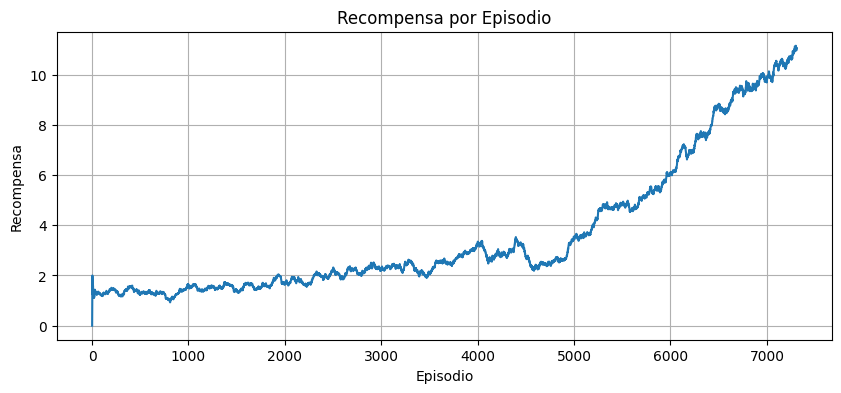

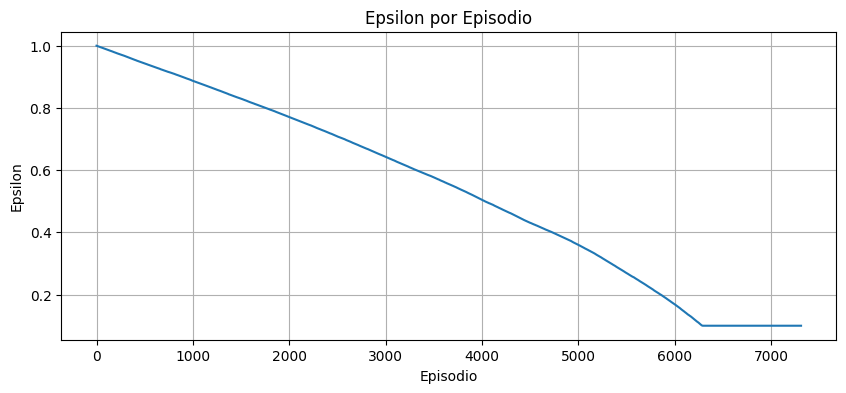

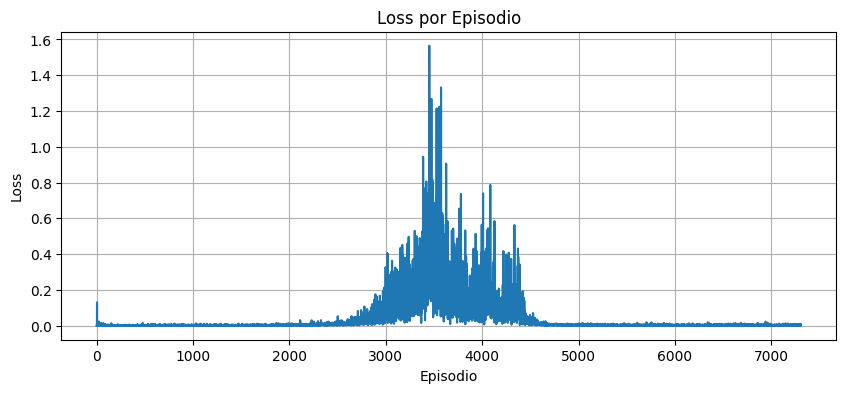

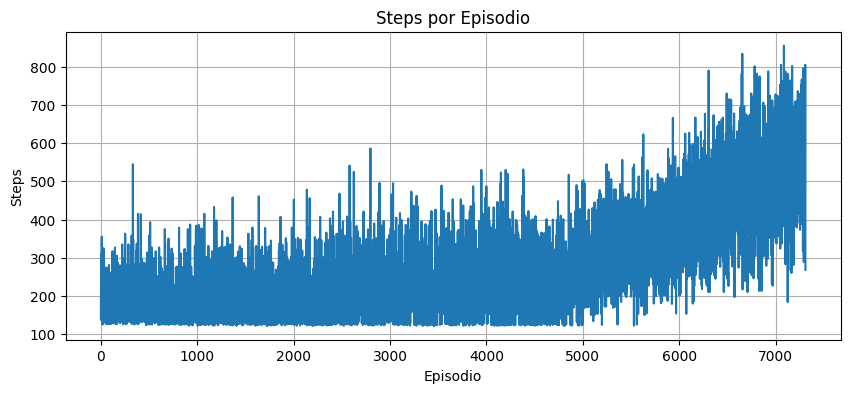

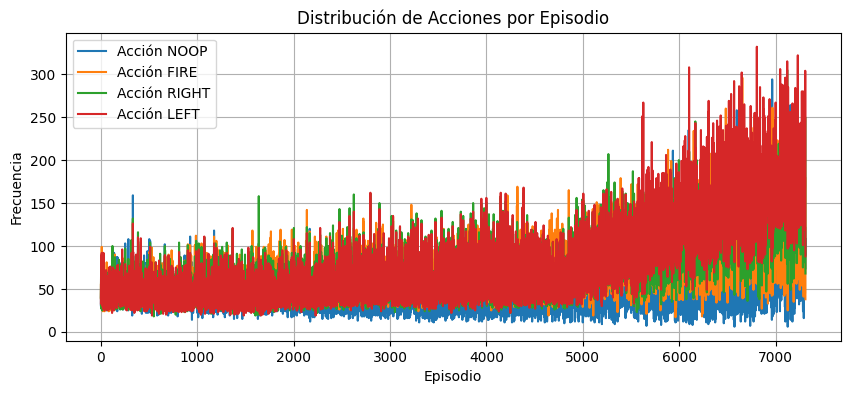

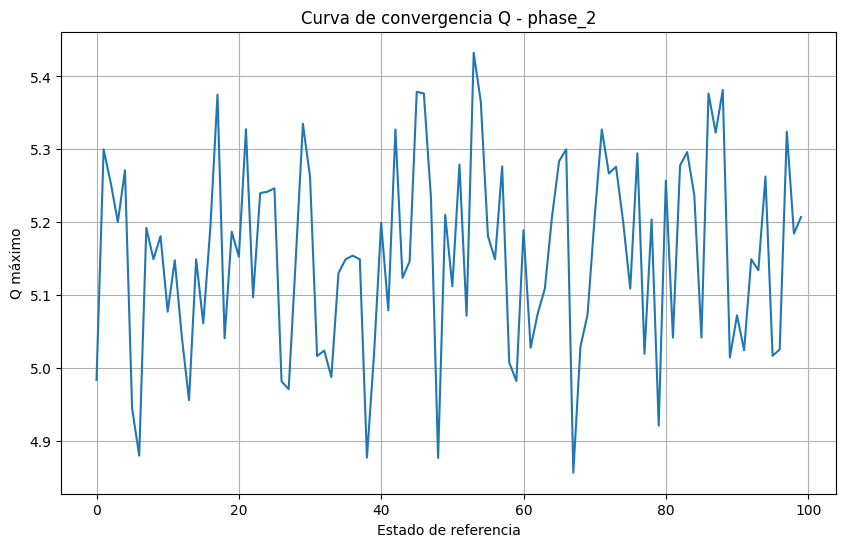

In [ ]:
METRICS_PATH = getMetricFilePath(True, PHASE_ID)
evaluate_training_phase_results(pathname=METRICS_PATH, phase_id=PHASE_ID)

In [ ]:
LOAD_NET_PATH = getGenericDataFilePath(True, PHASE_2_ID)
print(f"net a cargar con PHASE_ID: {PHASE_2_ID}")
PHASE_ID, TOTAL_STEPS, EPISODES, EPSILON_INI, EPSILON_MIN, EPSILON_ANNEAL_STEPS = get_phase_attributes(PHASE_3)
print(f"PHASE_ID: {PHASE_ID}, TOTAL_STEPS: {TOTAL_STEPS}, EPISODES: {EPISODES}, EPSILON_INI: {EPSILON_INI}, EPSILON_MIN: {EPSILON_MIN}, EPSILON_ANNEAL_STEPS: {EPSILON_ANNEAL_STEPS}, LOAD_NET_PATH: {LOAD_NET_PATH}")

net a cargar con PHASE_ID: phase_2
PHASE_ID: phase_3, TOTAL_STEPS: 2000000, EPISODES: 10000, EPSILON_INI: 0.1, EPSILON_MIN: 0.01, EPSILON_ANNEAL_STEPS: 1000000, LOAD_NET_PATH: net_history/dqn/GenericDQNAgent-phase_2.dat


In [ ]:
dqn_agent = execute_dqn_training_phase(
    PHASE_ID,
    reference_states,
    loadPath=LOAD_NET_PATH,
    total_steps = TOTAL_STEPS,
    episodes = EPISODES,
    epsilon_i = EPSILON_INI,
    epsilon_f = EPSILON_MIN,
    epsilon_anneal_steps = EPSILON_ANNEAL_STEPS,
    use_prioritized_replay=True
  )

Parametros del agente:
loadPath: net_history/dqn/GenericDQNAgent-phase_2.dat
buffer_size: 50000
batch_size: 32
learning_rate: 1e-05
gamma: 0.995
epsilon_i: 0.1
epsilon_f: 0.01
epsilon_anneal_steps: 1000000
episode_block: 100
run_name: phase_3
Use prioritized memory: True


Entrenando:   0%|          | 0/10000 [00:00<?, ?episode/s]



Iniciando entrenamiento phase_3, con los siguientes hiperparametros:

gamma: 0.995, epsilon_i: 0.1, epsilon_f: 0.01, epsilon_anneal_steps: 1000000, max_steps: 2000000




/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
Entrenando:   3%|▎         | 278/10000 [15:14<9:23:36,  3.48s/episode, reward=11.6, epsilon=0.0865, steps=150077]


=== Recompensa actual: 11.58, Epsilon: 0.08649307, Total steps: 150077 ===


Entrenando:   5%|▌         | 546/10000 [29:41<8:28:52,  3.23s/episode, reward=11.7, epsilon=0.073, steps=3e+5]


=== Recompensa actual: 11.71, Epsilon: 0.07295698, Total steps: 300478 ===


Entrenando:   8%|▊         | 798/10000 [44:33<8:45:54,  3.43s/episode, reward=12.2, epsilon=0.0595, steps=450507]


=== Recompensa actual: 12.22, Epsilon: 0.05945437, Total steps: 450507 ===


Entrenando:  11%|█         | 1056/10000 [59:24<9:41:56,  3.90s/episode, reward=13, epsilon=0.046, steps=600512]


=== Recompensa actual: 13.01, Epsilon: 0.045953919999999995, Total steps: 600512 ===


Entrenando:  13%|█▎        | 1295/10000 [1:14:19<7:51:29,  3.25s/episode, reward=14.4, epsilon=0.0325, steps=750260]


=== Recompensa actual: 14.44, Epsilon: 0.032476599999999994, Total steps: 750260 ===


Entrenando:  15%|█▌        | 1522/10000 [1:29:13<9:26:15,  4.01s/episode, reward=15, epsilon=0.019, steps=9e+5]


=== Recompensa actual: 15.04, Epsilon: 0.018970749999999995, Total steps: 900325 ===


Entrenando:  17%|█▋        | 1745/10000 [1:44:07<8:45:22,  3.82s/episode, reward=14.3, epsilon=0.01, steps=1050096]


=== Recompensa actual: 14.27, Epsilon: 0.01, Total steps: 1050096 ===


Entrenando:  20%|█▉        | 1961/10000 [1:59:07<11:17:13,  5.05s/episode, reward=16, epsilon=0.01, steps=1.2e+6]


=== Recompensa actual: 16.0, Epsilon: 0.01, Total steps: 1200517 ===


Entrenando:  22%|██▏       | 2166/10000 [2:13:20<7:25:36,  3.41s/episode, reward=17.2, epsilon=0.01, steps=1350099]


=== Recompensa actual: 17.19, Epsilon: 0.01, Total steps: 1350099 ===


Entrenando:  24%|██▍       | 2375/10000 [2:27:48<9:08:47,  4.32s/episode, reward=15.9, epsilon=0.01, steps=1.5e+6]


=== Recompensa actual: 15.86, Epsilon: 0.01, Total steps: 1500117 ===


Entrenando:  26%|██▌       | 2579/10000 [2:42:19<8:58:52,  4.36s/episode, reward=16.7, epsilon=0.01, steps=1650109]


=== Recompensa actual: 16.67, Epsilon: 0.01, Total steps: 1650109 ===


Entrenando:  28%|██▊       | 2781/10000 [2:57:30<9:12:48,  4.59s/episode, reward=17.1, epsilon=0.01, steps=1.8e+6]


=== Recompensa actual: 17.09, Epsilon: 0.01, Total steps: 1800557 ===


Entrenando:  30%|██▉       | 2987/10000 [3:12:07<10:00:19,  5.14s/episode, reward=16.9, epsilon=0.01, steps=1950128]


=== Recompensa actual: 16.89, Epsilon: 0.01, Total steps: 1950128 ===


Entrenando:  31%|███       | 3054/10000 [3:17:09<7:28:25,  3.87s/episode, reward=17.4, epsilon=0.01, steps=2e+6]


Entrenamiento detenido: se alcanzaron 2000001 pasos.



/content/obligatorio-taller-ia/load_and_evaluate.py:98: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  state_tensor = torch.tensor(state, dtype=torch.float32).unsqueeze(0).to(device)


In [ ]:
video_path = execute_agent_play(dqn_agent, PHASE_ID)
Video(video_path, embed=True, width=600)

Recompensa total del episodio 0: 19.0
Recompensa total promedio: 19.0


In [ ]:
METRICS_PATH = getMetricFilePath(True, PHASE_ID)
evaluate_training_phase_results(pathname=METRICS_PATH, phase_id=PHASE_ID)

In [ ]:
LOAD_NET_PATH = getGenericDataFilePath(True, PHASE_3_ID)
print(f"net a cargar con PHASE_ID: {PHASE_3_ID}")
PHASE_ID, TOTAL_STEPS, EPISODES, EPSILON_INI, EPSILON_MIN, EPSILON_ANNEAL_STEPS = get_phase_attributes(PHASE_4_1)
PHASE_ID = f"rm_{PHASE_ID}"
print(f"PHASE_ID: {PHASE_ID}, TOTAL_STEPS: {TOTAL_STEPS}, EPISODES: {EPISODES}, EPSILON_INI: {EPSILON_INI}, EPSILON_MIN: {EPSILON_MIN}, EPSILON_ANNEAL_STEPS: {EPSILON_ANNEAL_STEPS}, LOAD_NET_PATH: {LOAD_NET_PATH}")

net a cargar con PHASE_ID: phase_3
PHASE_ID: rm_phase_4_1, TOTAL_STEPS: 2000000, EPISODES: 10000, EPSILON_INI: 0.05, EPSILON_MIN: 0.01, EPSILON_ANNEAL_STEPS: 1000000, LOAD_NET_PATH: net_history/dqn/GenericDQNAgent-phase_3.dat


In [ ]:
dqn_agent = execute_dqn_training_phase(
    PHASE_ID,
    reference_states,
    loadPath=LOAD_NET_PATH,
    total_steps = TOTAL_STEPS,
    episodes = EPISODES,
    epsilon_i = EPSILON_INI,
    epsilon_f = EPSILON_MIN,
    epsilon_anneal_steps = EPSILON_ANNEAL_STEPS,
    use_prioritized_replay=True
  )

Parametros del agente:
loadPath: net_history/dqn/GenericDQNAgent-phase_3.dat
buffer_size: 50000
batch_size: 32
learning_rate: 1e-05
gamma: 0.995
epsilon_i: 0.05
epsilon_f: 0.01
epsilon_anneal_steps: 1000000
episode_block: 100
run_name: rm_phase_4_1
Use prioritized memory: True


Entrenando:   0%|          | 0/10000 [00:00<?, ?episode/s]



Iniciando entrenamiento rm_phase_4_1, con los siguientes hiperparametros:

gamma: 0.995, epsilon_i: 0.05, epsilon_f: 0.01, epsilon_anneal_steps: 1000000, max_steps: 2000000




/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
Entrenando:   2%|▏         | 222/10000 [14:28<9:28:59,  3.49s/episode, reward=15.3, epsilon=0.044, steps=150325]


=== Recompensa actual: 15.33, Epsilon: 0.043987000000000005, Total steps: 150325 ===


Entrenando:   4%|▍         | 429/10000 [28:35<12:43:37,  4.79s/episode, reward=17.1, epsilon=0.038, steps=3e+5]


=== Recompensa actual: 17.12, Epsilon: 0.037993280000000004, Total steps: 300168 ===


Entrenando:   6%|▋         | 634/10000 [42:48<8:55:31,  3.43s/episode, reward=17, epsilon=0.032, steps=450208]


=== Recompensa actual: 16.98, Epsilon: 0.03199168, Total steps: 450208 ===


Entrenando:   8%|▊         | 838/10000 [56:52<12:37:05,  4.96s/episode, reward=16.7, epsilon=0.026, steps=6e+5]


=== Recompensa actual: 16.69, Epsilon: 0.025980640000000003, Total steps: 600484 ===


Entrenando:  10%|█         | 1031/10000 [1:11:03<10:45:12,  4.32s/episode, reward=18.2, epsilon=0.02, steps=750723]


=== Recompensa actual: 18.25, Epsilon: 0.019971080000000002, Total steps: 750723 ===


Entrenando:  12%|█▏        | 1221/10000 [1:25:26<10:59:20,  4.51s/episode, reward=18.9, epsilon=0.014, steps=9e+5]


=== Recompensa actual: 18.92, Epsilon: 0.013994239999999998, Total steps: 900144 ===


Entrenando:  14%|█▍        | 1411/10000 [1:40:00<11:22:33,  4.77s/episode, reward=18.2, epsilon=0.01, steps=1050287]


=== Recompensa actual: 18.19, Epsilon: 0.01, Total steps: 1050287 ===


Entrenando:  16%|█▌        | 1597/10000 [1:54:18<11:07:00,  4.76s/episode, reward=18.8, epsilon=0.01, steps=1.2e+6]


=== Recompensa actual: 18.8, Epsilon: 0.01, Total steps: 1200721 ===


Entrenando:  18%|█▊        | 1782/10000 [2:08:25<8:59:11,  3.94s/episode, reward=19.1, epsilon=0.01, steps=1350315]


=== Recompensa actual: 19.14, Epsilon: 0.01, Total steps: 1350315 ===


Entrenando:  20%|█▉        | 1971/10000 [2:22:47<13:30:56,  6.06s/episode, reward=18.9, epsilon=0.01, steps=1.5e+6]


=== Recompensa actual: 18.89, Epsilon: 0.01, Total steps: 1500400 ===


Entrenando:  22%|██▏       | 2158/10000 [2:37:03<11:55:57,  5.48s/episode, reward=19.6, epsilon=0.01, steps=1650048]


=== Recompensa actual: 19.59, Epsilon: 0.01, Total steps: 1650048 ===


Entrenando:  23%|██▎       | 2346/10000 [2:51:14<9:25:43,  4.43s/episode, reward=18.3, epsilon=0.01, steps=1.8e+6]


=== Recompensa actual: 18.27, Epsilon: 0.01, Total steps: 1800254 ===


Entrenando:  25%|██▌       | 2533/10000 [3:05:28<9:48:23,  4.73s/episode, reward=19.2, epsilon=0.01, steps=1950193] 


=== Recompensa actual: 19.25, Epsilon: 0.01, Total steps: 1950193 ===


Entrenando:  26%|██▌       | 2600/10000 [3:10:11<9:01:17,  4.39s/episode, reward=18.8, epsilon=0.01, steps=2e+6]


Entrenamiento detenido: se alcanzaron 2000001 pasos.



/content/obligatorio-taller-ia/load_and_evaluate.py:98: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  state_tensor = torch.tensor(state, dtype=torch.float32).unsqueeze(0).to(device)


# Experimentación Parte 2

## Epsilon Decay Adaptativo: Una Solución al Estancamiento de Políticas en DQN

### Motivación del Problema
Durante nuestros entrenamientos extensos con agentes DQN en el entorno Breakout, observamos un patrón recurrente: las políticas se estancaban significativamente después de períodos de mejora inicial, específicamente durante las fases de entrenamiento donde se comienza a priorizar la explotación; identificamos que:

**1. Períodos prolongados sin mejora:** Los agentes experimentaban episodios consecutivos (20+ episodios) sin incrementos significativos en la recompensa promedio.

**2. Pérdida de oportunidades de mejora:** Una vez que el agente encontraba una estrategia sub-óptima pero funcional, tendía a explotarla exclusivamente, ignorando potenciales mejoras.

También, una razón significativa que nos llevo a evaluar lo mencionado es que durante la planeación y experimentación inicial, enfrentamos dificultades significativas para definir los valores óptimos de epsilon_min y epsilon_max, donde cada ajuste requería entrenamientos completos para evaluar su efectividad y los valores que funcionaban bien en etapas tempranas del entrenamiento no eran óptimos para etapas avanzadas.

Estos desafíos nos llevaron a cuestionar el enfoque estático y buscar una solución más dinámica y auto-adaptativa.

### Fundamento Teórico
El problema de exploración vs. explotación es fundamental en Reinforcement Learning. El esquema epsilon-greedy tradicional con decay lineal presenta limitaciones inherentes: 

**- Rigidez temporal:** El epsilon decrece independientemente del progreso del agente 
**- Falta de adaptabilidad:** No responde a períodos de estancamiento o mejora 
**- Exploración insuficiente en etapas avanzadas:** Una vez que epsilon alcanza su valor mínimo, el agente explora muy poco 
**- Dependencia excesiva de hiperparámetros manuales:** Requiere tuning extensivo para cada entorno y configuración

### Hipótesis de Investigación
Esperamos que el epsilon adaptativo resulte en:

- Mayor recompensa final comparado con el esquema lineal tradicional
- Menos episodios de estancamiento durante el entrenamiento
- Políticas más robustas que generalicen mejor a diferentes situaciones del juego
- Convergencia más rápida hacia estrategias óptimas
- Menor dependencia de hiperparámetros manuales para el tuning de exploración

Esta experimentación nos permitirá evaluar si la adaptabilidad en la exploración es clave para superar las limitaciones observadas en el agente DQN, y si un enfoque más dinámico puede resolver los desafíos de configuración que enfrentamos inicialmente.

## Fase 3:

La hipótesis se aplica en la Fase 3 del entrenamiento para evaluar el rendimiento del agente en una etapa donde se prioriza la explotación. Para ello, se cargan los pesos obtenidos en la Fase 2 y se reutilizan exactamente los mismos parámetros de entrenamiento.

In [ ]:
PHASE_NAME = PHASE_2["id"]
LOAD_NET_PATH = getGenericDataFilePath(True, f"{PHASE_NAME}")

PHASE_ID, TOTAL_STEPS, EPISODES, EPSILON_INI, EPSILON_MIN, EPSILON_ANNEAL_STEPS = get_phase_attributes(PHASE_3)
print(f"PHASE_ID: {PHASE_ID}, TOTAL_STEPS: {TOTAL_STEPS}, EPISODES: {EPISODES}, EPSILON_INI: {EPSILON_INI}, EPSILON_MIN: {EPSILON_MIN}, EPSILON_ANNEAL_STEPS: {EPSILON_ANNEAL_STEPS}, LOAD_NET_PATH: {LOAD_NET_PATH}")

PHASE_ID: phase_3, TOTAL_STEPS: 2000000, EPISODES: 10000, EPSILON_INI: 0.1, EPSILON_MIN: 0.01, EPSILON_ANNEAL_STEPS: 1000000, LOAD_NET_PATH: net_history/dqn/GenericDQNAgent-phase_2.dat


In [ ]:
dqn_agent = execute_dqn_training_phase(
  f"{PHASE_ID}_adaptative_e",
  reference_states,
  loadPath=LOAD_NET_PATH,
  total_steps = TOTAL_STEPS,
  episodes = EPISODES,
  epsilon_i = EPSILON_INI,
  epsilon_f = EPSILON_MIN,
  epsilon_anneal_steps = EPSILON_ANNEAL_STEPS,
  gamma=GAMMA,
  adaptive_epsilon=True
)

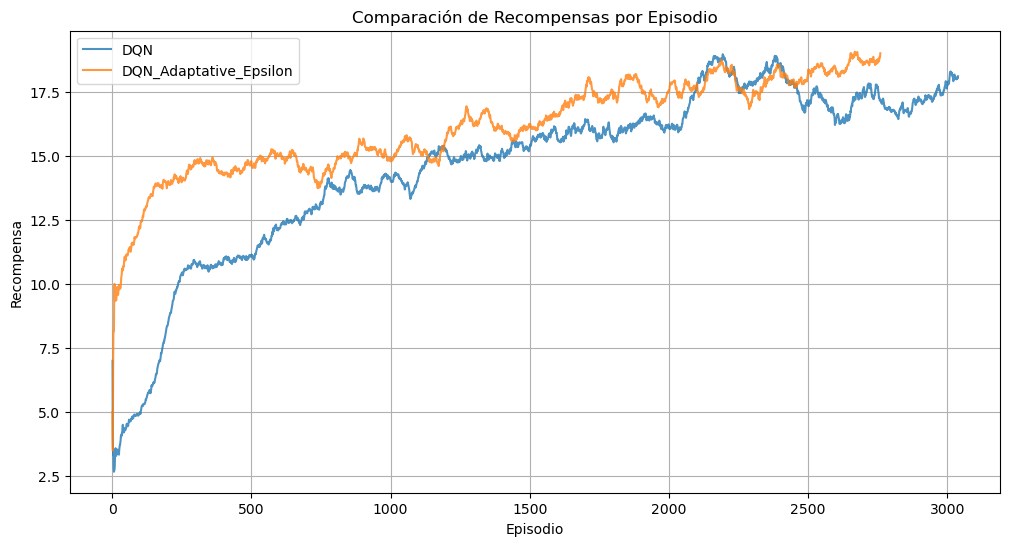

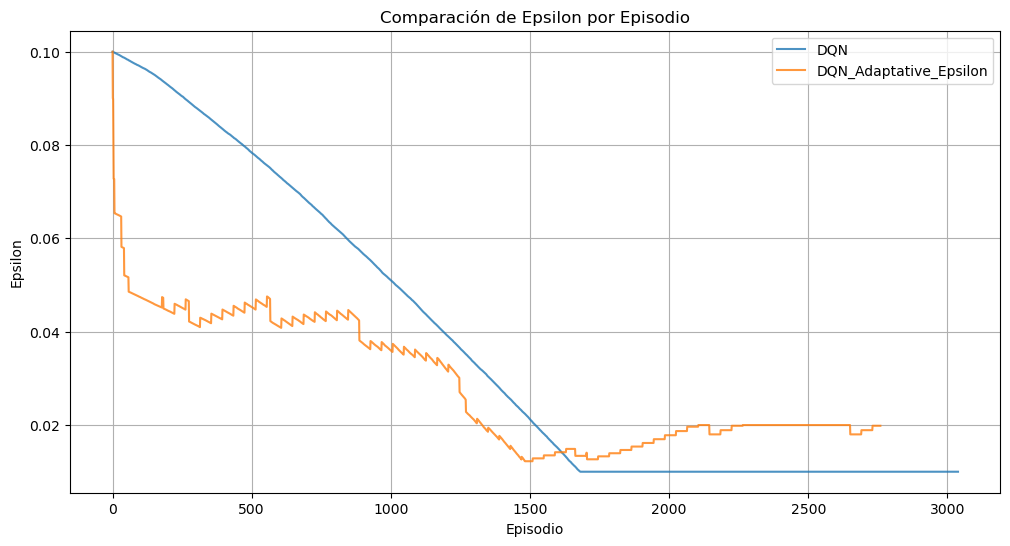

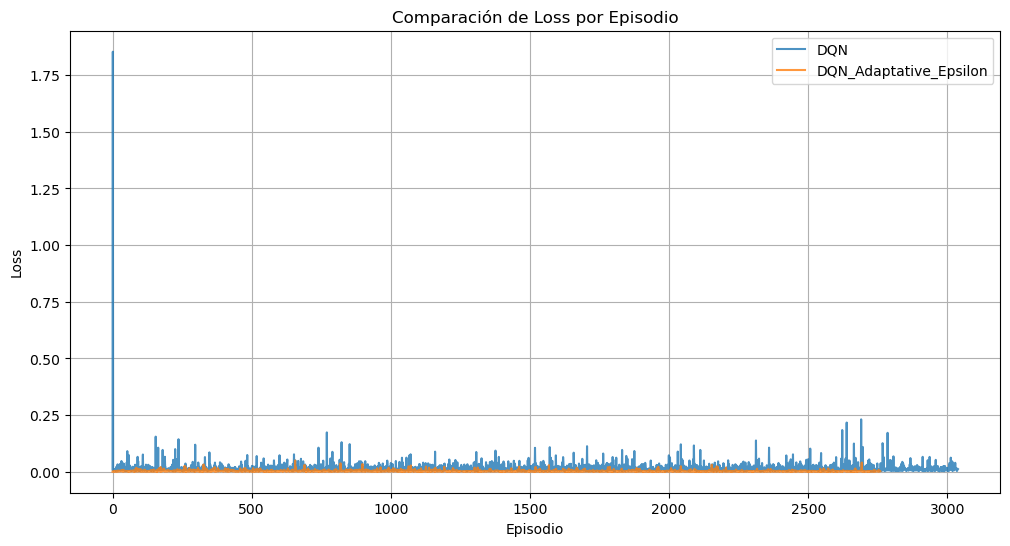


=== RESUMEN ESTADÍSTICO ===

DQN:
  Recompensa promedio: 14.59 ± 3.35
  Recompensa máxima: 18.97
  Recompensa mínima: 2.67
  Loss promedio: 0.0171 ± 0.0373
  Steps promedio: 658.1 ± 185.3
  Epsilon final: 0.0100
  Episodios totales: 3039
  Episodios con recompensas válidas: 3038
  Porcentaje de datos válidos: 100.0%

DQN_Adaptative_Epsilon:
  Recompensa promedio: 16.10 ± 1.88
  Recompensa máxima: 19.07
  Recompensa mínima: 3.50
  Loss promedio: 0.0033 ± 0.0037
  Steps promedio: 724.6 ± 195.3
  Epsilon final: 0.0198
  Episodios totales: 2760
  Episodios con recompensas válidas: 2759
  Porcentaje de datos válidos: 100.0%


In [60]:
metrics_paths = [getMetricFilePath(True, PHASE_3_ID), getMetricFilePath(True, f"{PHASE_3_ID}_adaptative_e")]
compare_metrics(metrics_paths, labels=["DQN", "DQN_Adaptative_Epsilon"], show_rewards=True, show_losses=True, show_steps=False, show_actions=False, show_epsilons=True)

### Conclusión de resultados, Fase 3

**1. Gráfica de Recompensas:**

El agente con epsilon adaptativo alcanzó una recompensa `promedio superior (16.10 vs. 14.59)` y una `mayor estabilidad (menor desviación estándar)`. Aunque la recompensa máxima fue similar (19.07 vs. 18.97), la curva adaptativa mostró un ascenso más rápido y sostenido desde el inicio, lo que indica mejor aprovechamiento de la exploración inicial.

**2. Gráfica de Epsilon:**

El esquema adaptativo ajustó dinámicamente la exploración según el progreso, evitando caer prematuramente en explotación excesiva. El DQN estático alcanzó epsilon mínimo rápidamente, mientras que el adaptativo mantuvo un equilibrio y reintrodujo exploración cuando fue necesario.

**3. Gráfica de Loss:**

El DQN adaptativo presentó `menor pérdida` promedio y `menor varianza`, lo que sugiere `actualizaciones más estables` y valores `Q menos erráticos`.

#### Conclusiones generales 

Los resultados `confirman la hipótesis planteada`: el epsilon adaptativo permitió una mejora en rendimiento, redujo el estancamiento, y promovió una exploración más inteligente sin comprometer la estabilidad. Si bien las diferencias no son drásticamente altas en términos de recompensa máxima, sí lo son en consistencia, estabilidad y eficiencia de aprendizaje. Esto sugiere que incorporar adaptabilidad en la explotación es una estrategia robusta y generalizable para superar limitaciones del DQN tradicional.

### FASE 3_2

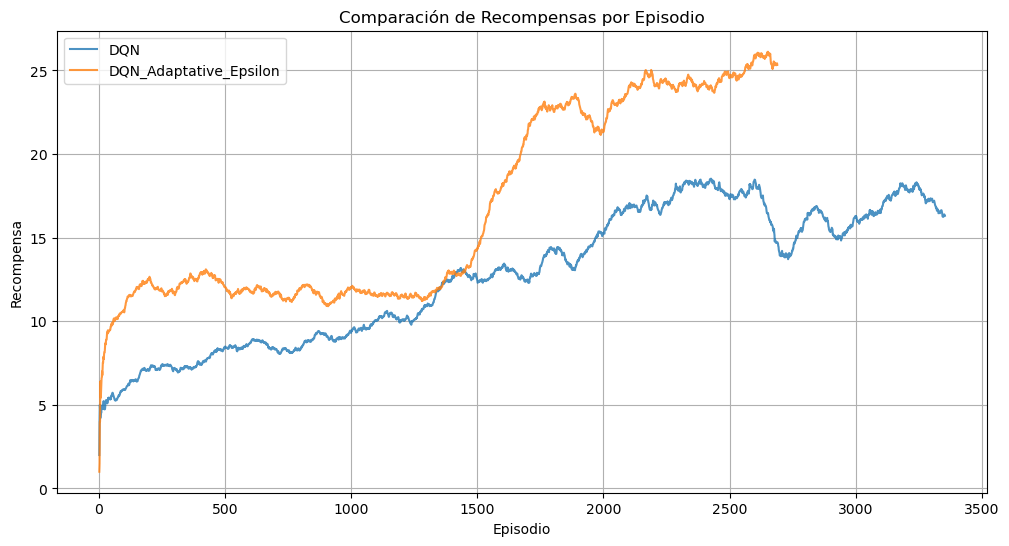

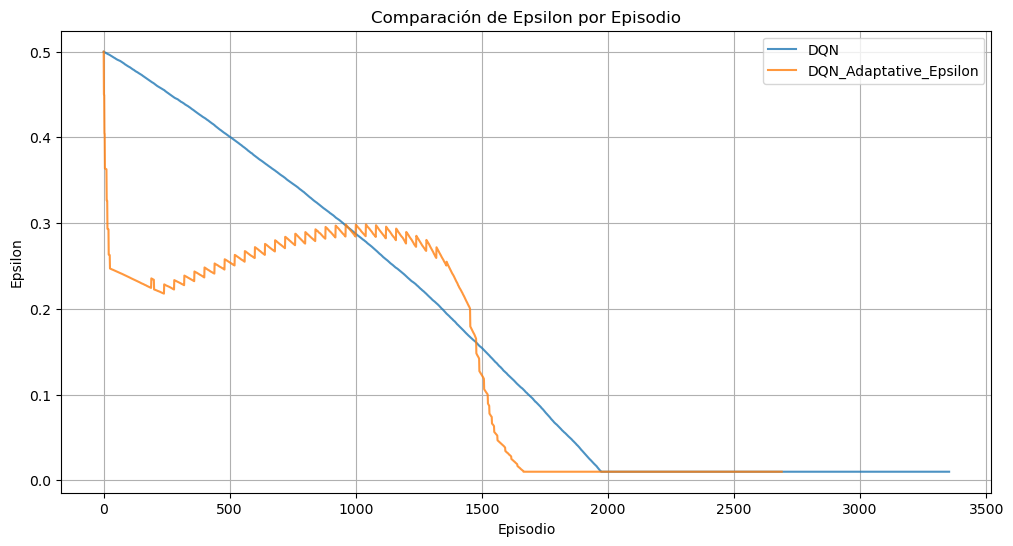

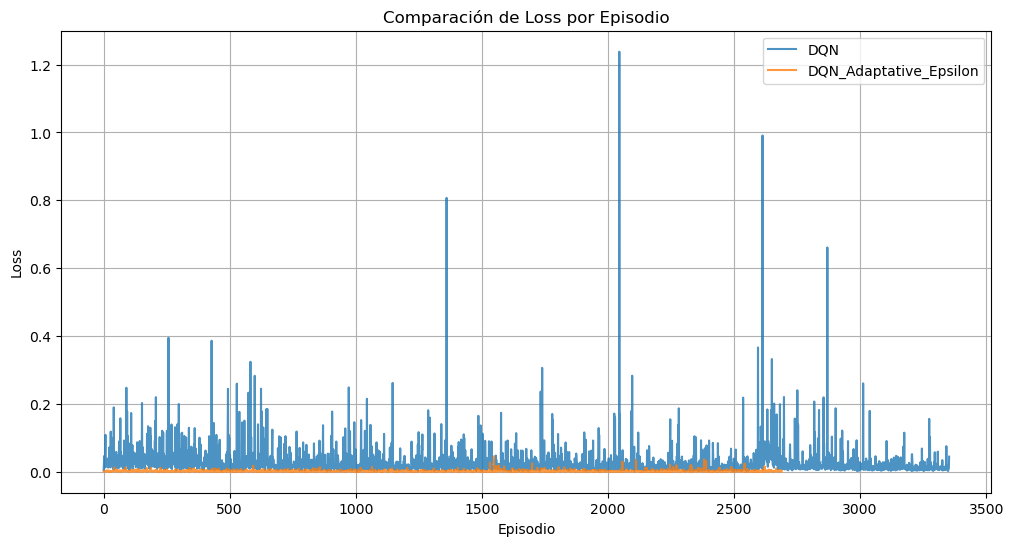


=== RESUMEN ESTADÍSTICO ===

DQN:
  Recompensa promedio: 12.75 ± 3.98
  Recompensa máxima: 18.53
  Recompensa mínima: 2.00
  Loss promedio: 0.0275 ± 0.0469
  Steps promedio: 596.3 ± 199.9
  Epsilon final: 0.0100
  Episodios totales: 3354
  Episodios con recompensas válidas: 3353
  Porcentaje de datos válidos: 100.0%

DQN_Adaptative_Epsilon:
  Recompensa promedio: 16.65 ± 5.79
  Recompensa máxima: 26.12
  Recompensa mínima: 1.00
  Loss promedio: 0.0025 ± 0.0027
  Steps promedio: 743.5 ± 288.7
  Epsilon final: 0.0100
  Episodios totales: 2690
  Episodios con recompensas válidas: 2689
  Porcentaje de datos válidos: 100.0%


In [12]:
metrics_paths = [getMetricFilePath(True, PHASE_3_2_ID), getMetricFilePath(True, f"{PHASE_3_2_ID}_adaptative_e")]
compare_metrics(metrics_paths, labels=["DQN", "DQN_Adaptative_Epsilon"], show_rewards=True, show_losses=True, show_steps=False, show_actions=False, show_epsilons=True)

# Experimentación Parte 3

## Mecanismo de Atención: Una Solución a la Falta de Anticipación Espacial en DDQN

### Motivación del Problema

Durante nuestras sesiones de evaluación y análisis del comportamiento del agente DDQN en el entorno Breakout, identificamos un patrón crítico de fallo recurrente: la incapacidad del agente para anticipar y responder eficazmente a situaciones que requieren planificación espacial a corto plazo.

Observamos consistentemente que el agente pierde vidas cuando la pelota se dirige hacia las esquinas de la pantalla. A pesar de que el agente detecta el movimiento y comienza a mover la paleta, frecuentemente llega tarde a la posición objetivo. 

Estas observaciones nos llevaron a cuestionar si el modelo podría beneficiarse de un mecanismo que seleccione y enfatice las características más relevantes para la toma de decisiones, especialmente aquellas relacionadas con la dinámica espacial y temporal del juego.

### Fundamento Teórico

Los mecanismos de atención han demostrado ser efectivos en tareas que requieren:

- Selección de características relevantes
- Integración de información temporal
- Mejora en la generalización
  
En el contexto de Breakout, las características más relevantes incluyen:

- Posición y velocidad de la pelota: Para anticipar trayectorias
- Posición de la paleta: Para calcular distancias y tiempos de llegada
- Patrones de bloques: Para identificar rutas óptimas
- Información de esquinas: Donde ocurren la mayoría de las pérdidas

### Hipótesis de Investigación

Esperamos que la integración del mecanismo de atención en DDQN resulte en:

- El agente debería posicionarse más eficazmente antes de que la pelota llegue a las esquinas
- Reducción en pérdidas por llegada tardía
- Mejor rendimiento en situaciones críticas, especialmente en esquinas y situaciones que requieren movimientos rápidos y precisos

Si nuestra hipótesis es correcta, el agente DDQN con atención debería mostrar:

- Mayor tasa de supervivencia en situaciones de esquina
- Movimientos más fluidos y anticipatorios de la paleta
- Mejor aprovechamiento de oportunidades de scoring
- Políticas más consistentes a lo largo de episodios extendidos
  
Esta experimentación nos permitirá evaluar si la capacidad de seleccionar y enfatizar características relevantes es clave para superar las limitaciones de anticipación espacial observadas en el agente DDQN estándar, y si un enfoque más sofisticado en el procesamiento de características puede resolver los desafíos de timing y posicionamiento que identificamos durante la evaluación.

### FASE 1

In [11]:
PHASE_ID, TOTAL_STEPS, EPISODES, EPSILON_INI, EPSILON_MIN, EPSILON_ANNEAL_STEPS = get_phase_attributes(PHASE_INITIAL)
print(f"PHASE_ID: {PHASE_ID}, TOTAL_STEPS: {TOTAL_STEPS}, EPISODES: {EPISODES}, EPSILON_INI: {EPSILON_INI}, EPSILON_MIN: {EPSILON_MIN}, EPSILON_ANNEAL_STEPS: {EPSILON_ANNEAL_STEPS}")
ddqn_agent = execute_ddqn_training_phase(f"{PHASE_ID}_simple_attention", reference_states, total_steps = TOTAL_STEPS, episodes = EPISODES, epsilon_ini = EPSILON_INI, epsilon_min = EPSILON_MIN, epsilon_anneal_steps = EPSILON_ANNEAL_STEPS, use_attention=True)

PHASE_ID: initial_run, TOTAL_STEPS: 100000, EPISODES: 10000, EPSILON_INI: 1, EPSILON_MIN: 0.3, EPSILON_ANNEAL_STEPS: 80000
Parametros del agente:
loadPath: None
gamma: 0.995
epsilon_i: 1
epsilon_f: 0.3
epsilon_anneal_steps: 80000
run_name: initial_run_simple_attention


A.L.E: Arcade Learning Environment (version 0.10.2+unknown)
[Powered by Stella]
Game console created:
  ROM file:  /opt/anaconda3/envs/obl_taller_ia/lib/python3.12/site-packages/ale_py/roms/breakout.bin
  Cart Name: Breakout - Breakaway IV (1978) (Atari)
  Cart MD5:  f34f08e5eb96e500e851a80be3277a56
  Display Format:  AUTO-DETECT ==> NTSC
  ROM Size:        2048
  Bankswitch Type: AUTO-DETECT ==> 2K

Running ROM file...
Random seed is 1427457861
/opt/anaconda3/envs/obl_taller_ia/lib/python3.12/site-packages/gymnasium/wrappers/rendering.py:283: UserWarning: WARN: Overwriting existing videos at /Users/reichelort/Desktop/Taller_AI/Obligatorio final/obligatorio-taller-ia/videos/ddqn/initial_run_simple_attention folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(
Entrenando:   0%|          | 0/10000 [00:00<?, ?episode/s]



Iniciando entrenamiento initial_run_simple_attention, con los siguientes hiperparametros:

gamma: 0.995, epsilon_i: 1, epsilon_f: 0.3, epsilon_anneal_steps: 80000, max_steps: 100000




/opt/anaconda3/envs/obl_taller_ia/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/envs/obl_taller_ia/lib/python3.12/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
Entrenando:   0%|          | 3/10000 [00:11<10:35:28,  3.81s/episode, reward=2, epsilon=0.995, steps=540]  


KeyboardInterrupt: 

In [ ]:
PHASE_ID, TOTAL_STEPS, EPISODES, EPSILON_INI, EPSILON_MIN, EPSILON_ANNEAL_STEPS = get_phase_attributes(PHASE_INITIAL)
print(f"PHASE_ID: {PHASE_ID}, TOTAL_STEPS: {TOTAL_STEPS}, EPISODES: {EPISODES}, EPSILON_INI: {EPSILON_INI}, EPSILON_MIN: {EPSILON_MIN}, EPSILON_ANNEAL_STEPS: {EPSILON_ANNEAL_STEPS}")
ddqn_agent = execute_ddqn_training_phase(f"{PHASE_ID}_simple_attention", reference_states, total_steps = TOTAL_STEPS, episodes = EPISODES, epsilon_ini = EPSILON_INI, epsilon_min = EPSILON_MIN, epsilon_anneal_steps = EPSILON_ANNEAL_STEPS, use_attention=True)

PHASE_ID: initial_run, TOTAL_STEPS: 100000, EPISODES: 10000, EPSILON_INI: 1, EPSILON_MIN: 0.3, EPSILON_ANNEAL_STEPS: 80000
Parametros del agente:
loadPath: None
gamma: 0.995
epsilon_i: 1
epsilon_f: 0.3
epsilon_anneal_steps: 80000
run_name: initial_run_simple_attention


A.L.E: Arcade Learning Environment (version 0.10.2+unknown)
[Powered by Stella]
Game console created:
  ROM file:  /opt/anaconda3/envs/obl_taller_ia/lib/python3.12/site-packages/ale_py/roms/breakout.bin
  Cart Name: Breakout - Breakaway IV (1978) (Atari)
  Cart MD5:  f34f08e5eb96e500e851a80be3277a56
  Display Format:  AUTO-DETECT ==> NTSC
  ROM Size:        2048
  Bankswitch Type: AUTO-DETECT ==> 2K

Running ROM file...
Random seed is -442892041


NameError: name 'DQN_CNN_Model_With_Attention' is not defined

In [ ]:
PHASE_ID, TOTAL_STEPS, EPISODES, EPSILON_INI, EPSILON_MIN, EPSILON_ANNEAL_STEPS = get_phase_attributes(PHASE_INITIAL)
print(f"PHASE_ID: {PHASE_ID}, TOTAL_STEPS: {TOTAL_STEPS}, EPISODES: {EPISODES}, EPSILON_INI: {EPSILON_INI}, EPSILON_MIN: {EPSILON_MIN}, EPSILON_ANNEAL_STEPS: {EPSILON_ANNEAL_STEPS}")
ddqn_agent = execute_ddqn_training_phase(f"{PHASE_ID}_simple_attention", reference_states, total_steps = TOTAL_STEPS, episodes = EPISODES, epsilon_ini = EPSILON_INI, epsilon_min = EPSILON_MIN, epsilon_anneal_steps = EPSILON_ANNEAL_STEPS, use_attention=True)

PHASE_ID: initial_run, TOTAL_STEPS: 100000, EPISODES: 10000, EPSILON_INI: 1, EPSILON_MIN: 0.3, EPSILON_ANNEAL_STEPS: 80000
Parametros del agente:
loadPath: None
gamma: 0.995
epsilon_i: 1
epsilon_f: 0.3
epsilon_anneal_steps: 80000
run_name: initial_run_simple_attention


A.L.E: Arcade Learning Environment (version 0.10.2+unknown)
[Powered by Stella]
Game console created:
  ROM file:  /opt/anaconda3/envs/obl_taller_ia/lib/python3.12/site-packages/ale_py/roms/breakout.bin
  Cart Name: Breakout - Breakaway IV (1978) (Atari)
  Cart MD5:  f34f08e5eb96e500e851a80be3277a56
  Display Format:  AUTO-DETECT ==> NTSC
  ROM Size:        2048
  Bankswitch Type: AUTO-DETECT ==> 2K

Running ROM file...
Random seed is -442892041


NameError: name 'DQN_CNN_Model_With_Attention' is not defined

In [ ]:
PHASE_ID, TOTAL_STEPS, EPISODES, EPSILON_INI, EPSILON_MIN, EPSILON_ANNEAL_STEPS = get_phase_attributes(PHASE_INITIAL)
print(f"PHASE_ID: {PHASE_ID}, TOTAL_STEPS: {TOTAL_STEPS}, EPISODES: {EPISODES}, EPSILON_INI: {EPSILON_INI}, EPSILON_MIN: {EPSILON_MIN}, EPSILON_ANNEAL_STEPS: {EPSILON_ANNEAL_STEPS}")
ddqn_agent = execute_ddqn_training_phase(f"{PHASE_ID}_simple_attention", reference_states, total_steps = TOTAL_STEPS, episodes = EPISODES, epsilon_ini = EPSILON_INI, epsilon_min = EPSILON_MIN, epsilon_anneal_steps = EPSILON_ANNEAL_STEPS, use_attention=True)

PHASE_ID: initial_run, TOTAL_STEPS: 100000, EPISODES: 10000, EPSILON_INI: 1, EPSILON_MIN: 0.3, EPSILON_ANNEAL_STEPS: 80000
Parametros del agente:
loadPath: None
gamma: 0.995
epsilon_i: 1
epsilon_f: 0.3
epsilon_anneal_steps: 80000
run_name: initial_run_simple_attention


A.L.E: Arcade Learning Environment (version 0.10.2+unknown)
[Powered by Stella]
Game console created:
  ROM file:  /opt/anaconda3/envs/obl_taller_ia/lib/python3.12/site-packages/ale_py/roms/breakout.bin
  Cart Name: Breakout - Breakaway IV (1978) (Atari)
  Cart MD5:  f34f08e5eb96e500e851a80be3277a56
  Display Format:  AUTO-DETECT ==> NTSC
  ROM Size:        2048
  Bankswitch Type: AUTO-DETECT ==> 2K

Running ROM file...
Random seed is -442892041


NameError: name 'DQN_CNN_Model_With_Attention' is not defined

In [ ]:
PHASE_ID, TOTAL_STEPS, EPISODES, EPSILON_INI, EPSILON_MIN, EPSILON_ANNEAL_STEPS = get_phase_attributes(PHASE_INITIAL)
print(f"PHASE_ID: {PHASE_ID}, TOTAL_STEPS: {TOTAL_STEPS}, EPISODES: {EPISODES}, EPSILON_INI: {EPSILON_INI}, EPSILON_MIN: {EPSILON_MIN}, EPSILON_ANNEAL_STEPS: {EPSILON_ANNEAL_STEPS}")
ddqn_agent = execute_ddqn_training_phase(f"{PHASE_ID}_simple_attention", reference_states, total_steps = TOTAL_STEPS, episodes = EPISODES, epsilon_ini = EPSILON_INI, epsilon_min = EPSILON_MIN, epsilon_anneal_steps = EPSILON_ANNEAL_STEPS, use_attention=True)

PHASE_ID: initial_run, TOTAL_STEPS: 100000, EPISODES: 10000, EPSILON_INI: 1, EPSILON_MIN: 0.3, EPSILON_ANNEAL_STEPS: 80000
Parametros del agente:
loadPath: None
gamma: 0.995
epsilon_i: 1
epsilon_f: 0.3
epsilon_anneal_steps: 80000
run_name: initial_run_simple_attention


A.L.E: Arcade Learning Environment (version 0.10.2+unknown)
[Powered by Stella]
Game console created:
  ROM file:  /opt/anaconda3/envs/obl_taller_ia/lib/python3.12/site-packages/ale_py/roms/breakout.bin
  Cart Name: Breakout - Breakaway IV (1978) (Atari)
  Cart MD5:  f34f08e5eb96e500e851a80be3277a56
  Display Format:  AUTO-DETECT ==> NTSC
  ROM Size:        2048
  Bankswitch Type: AUTO-DETECT ==> 2K

Running ROM file...
Random seed is -442892041


NameError: name 'DQN_CNN_Model_With_Attention' is not defined

In [ ]:
PHASE_ID, TOTAL_STEPS, EPISODES, EPSILON_INI, EPSILON_MIN, EPSILON_ANNEAL_STEPS = get_phase_attributes(PHASE_INITIAL)
print(f"PHASE_ID: {PHASE_ID}, TOTAL_STEPS: {TOTAL_STEPS}, EPISODES: {EPISODES}, EPSILON_INI: {EPSILON_INI}, EPSILON_MIN: {EPSILON_MIN}, EPSILON_ANNEAL_STEPS: {EPSILON_ANNEAL_STEPS}")
ddqn_agent = execute_ddqn_training_phase(f"{PHASE_ID}_simple_attention", reference_states, total_steps = TOTAL_STEPS, episodes = EPISODES, epsilon_ini = EPSILON_INI, epsilon_min = EPSILON_MIN, epsilon_anneal_steps = EPSILON_ANNEAL_STEPS, use_attention=True)

PHASE_ID: initial_run, TOTAL_STEPS: 100000, EPISODES: 10000, EPSILON_INI: 1, EPSILON_MIN: 0.3, EPSILON_ANNEAL_STEPS: 80000
Parametros del agente:
loadPath: None
gamma: 0.995
epsilon_i: 1
epsilon_f: 0.3
epsilon_anneal_steps: 80000
run_name: initial_run_simple_attention


A.L.E: Arcade Learning Environment (version 0.10.2+unknown)
[Powered by Stella]
Game console created:
  ROM file:  /opt/anaconda3/envs/obl_taller_ia/lib/python3.12/site-packages/ale_py/roms/breakout.bin
  Cart Name: Breakout - Breakaway IV (1978) (Atari)
  Cart MD5:  f34f08e5eb96e500e851a80be3277a56
  Display Format:  AUTO-DETECT ==> NTSC
  ROM Size:        2048
  Bankswitch Type: AUTO-DETECT ==> 2K

Running ROM file...
Random seed is -442892041


NameError: name 'DQN_CNN_Model_With_Attention' is not defined

In [ ]:
PHASE_ID, TOTAL_STEPS, EPISODES, EPSILON_INI, EPSILON_MIN, EPSILON_ANNEAL_STEPS = get_phase_attributes(PHASE_INITIAL)
print(f"PHASE_ID: {PHASE_ID}, TOTAL_STEPS: {TOTAL_STEPS}, EPISODES: {EPISODES}, EPSILON_INI: {EPSILON_INI}, EPSILON_MIN: {EPSILON_MIN}, EPSILON_ANNEAL_STEPS: {EPSILON_ANNEAL_STEPS}")
ddqn_agent = execute_ddqn_training_phase(f"{PHASE_ID}_simple_attention", reference_states, total_steps = TOTAL_STEPS, episodes = EPISODES, epsilon_ini = EPSILON_INI, epsilon_min = EPSILON_MIN, epsilon_anneal_steps = EPSILON_ANNEAL_STEPS, use_attention=True)

PHASE_ID: initial_run, TOTAL_STEPS: 100000, EPISODES: 10000, EPSILON_INI: 1, EPSILON_MIN: 0.3, EPSILON_ANNEAL_STEPS: 80000
Parametros del agente:
loadPath: None
gamma: 0.995
epsilon_i: 1
epsilon_f: 0.3
epsilon_anneal_steps: 80000
run_name: initial_run_simple_attention


A.L.E: Arcade Learning Environment (version 0.10.2+unknown)
[Powered by Stella]
Game console created:
  ROM file:  /opt/anaconda3/envs/obl_taller_ia/lib/python3.12/site-packages/ale_py/roms/breakout.bin
  Cart Name: Breakout - Breakaway IV (1978) (Atari)
  Cart MD5:  f34f08e5eb96e500e851a80be3277a56
  Display Format:  AUTO-DETECT ==> NTSC
  ROM Size:        2048
  Bankswitch Type: AUTO-DETECT ==> 2K

Running ROM file...
Random seed is -442892041


NameError: name 'DQN_CNN_Model_With_Attention' is not defined

### FASE 2

In [ ]:
EXPLORATION_GAMMA = 0.97
PHASE_NAME = f"{PHASE_INITIAL_ID}_simple_attention"
LOAD_NET_PATH = getGenericDataFilePath(False, PHASE_NAME)
print(f"LOAD_NET_PATH: {LOAD_NET_PATH}")

PHASE_ID, TOTAL_STEPS, EPISODES, EPSILON_INI, EPSILON_MIN, EPSILON_ANNEAL_STEPS = get_phase_attributes(PHASE_2)
print(f"PHASE_ID: {PHASE_ID}, TOTAL_STEPS: {TOTAL_STEPS}, EPISODES: {EPISODES}, EPSILON_INI: {EPSILON_INI}, EPSILON_MIN: {EPSILON_MIN}, EPSILON_ANNEAL_STEPS: {EPSILON_ANNEAL_STEPS}, LOAD_NET_PATH: {LOAD_NET_PATH}")
ddqn_agent = execute_ddqn_training_phase(f"{PHASE_ID}_simple_attention", reference_states, load_net_path=LOAD_NET_PATH, total_steps = TOTAL_STEPS, episodes = EPISODES, epsilon_ini = EPSILON_INI, epsilon_min = EPSILON_MIN, epsilon_anneal_steps = EPSILON_ANNEAL_STEPS, gamma=EXPLORATION_GAMMA, use_attention=True)

## FASE 3

In [ ]:
EXPLORATION_GAMMA = 0.97
PHASE_NAME = f"{PHASE_2_ID}_simple_attention"
LOAD_NET_PATH = getGenericDataFilePath(False, PHASE_NAME)
print(f"LOAD_NET_PATH: {LOAD_NET_PATH}")

PHASE_ID, TOTAL_STEPS, EPISODES, EPSILON_INI, EPSILON_MIN, EPSILON_ANNEAL_STEPS = get_phase_attributes(PHASE_2)
print(f"PHASE_ID: {PHASE_ID}, TOTAL_STEPS: {TOTAL_STEPS}, EPISODES: {EPISODES}, EPSILON_INI: {EPSILON_INI}, EPSILON_MIN: {EPSILON_MIN}, EPSILON_ANNEAL_STEPS: {EPSILON_ANNEAL_STEPS}, LOAD_NET_PATH: {LOAD_NET_PATH}")
ddqn_agent = execute_ddqn_training_phase(f"{PHASE_ID}_simple_attention", reference_states, load_net_path=LOAD_NET_PATH, total_steps = TOTAL_STEPS, episodes = EPISODES, epsilon_ini = EPSILON_INI, epsilon_min = EPSILON_MIN, epsilon_anneal_steps = EPSILON_ANNEAL_STEPS, gamma=EXPLORATION_GAMMA, use_attention=True)

# Comparaciones, Resultados, Comentarios...
De aquí en adelante son libres de presentar como gusten los resultados comparativos de las técnicas.
...